In [1]:
import time
import itertools
import pickle
from datetime import datetime, date, timedelta

# local
from data_wrangle import data_wrangle as dw
from model_class_note import model_validation

# data wrangle
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optimization part
from cvxopt import matrix
from cvxopt.solvers import qp
from sklearn.covariance import LedoitWolf
from pypfopt import risk_models, expected_returns, plotting, EfficientFrontier

# sclearn RandomForest - Returns, ML Metrics and tools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

# GARCH - Volatility
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Errors
from cvxpy import SolverError

In [2]:
# tickers = ['XOM', 'CVX', 'SHEL', 'AAPL']
# tickers = ['AMZN', 'TM', 'HD', 'MCD', 'NKE', 'SBUX', 'GOOGL', 'VZ', 'CMCSA', 'DIS', 'T', 'NFLX',
#           'WMT', 'PG', 'KO', 'PEP', 'COST', 'UL', 'XOM', 'CVX', 'SHEL', 'TTE', 'BP', 'EQNR',
#           'SPGI', 'WFC', 'JPM', 'BAC', 'HSBC', 'MS', 'UPS', 'RTX', 'HON', 'BA', 'LMT', 'GE',
#           'UNH', 'LLY', 'JNJ', 'AZN', 'MRK', 'PFE', 'BHP', 'LIN', 'RIO', 'APD', 'VALE', 'SHW',
#           'PLD', 'AMT', 'EQIX', 'PSA', 'CCI', 'O', 'MSFT', 'NVDA', 'TSM', 'ORCL', 'CSCO',
#           'NEE', 'SO', 'DUK', 'PCG', 'SRE', 'AEP', 'AAPL']
tickers = ['MCD', 'NKE', 'SBUX', 'DIS', 'T', 'NFLX',
          'PEP', 'COST', 'UL', 'TTE', 'BP', 'EQNR',
          'BAC', 'HSBC', 'MS', 'BA', 'LMT', 'GE',
          'AZN', 'MRK', 'PFE', 'APD', 'VALE', 'SHW',
          'PSA', 'CCI', 'O', 'AAPL', 'MSFT', 'NVDA',
          'PCG', 'SRE', 'AEP']
features = ["EURUSD=X", '^IRX', '^FVX', 'CL=F', 'GC=F', 'NG=F', 'RB=F']
start = '2005-01-01'
end = '2022-12-31'
risk_free_rate = 0.02

In [3]:
model_validation = model_validation(tickers, start, end, features)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  33 of 33 completed


In [4]:
model_validation.tech_features()

Done!


In [5]:
window = int(len(model_validation.tech) * 0.2)
test_size = len(model_validation.tech) - window

In [6]:
model_validation.train_test_split(window=window, val_size=test_size, test=False)

Initial training window is included
ohlc val 906, tech val 906
binary_val 905, returns_val 905


In [7]:
direction = model_validation.rolling_window(model_validation.tech_val, 
                                        model_validation.binary_val, 
                                        model_validation.window, 
                                        model_validation.val_size, 
                                        model_validation.returns_val,
                                        val_model='RF',
                                        RF_params=(25, 3, 3),
                                        features=model_validation.feat_val)

Test circle -725 trained in 1.51 seconds.
Test circle -724 trained in 1.48 seconds.
Test circle -723 trained in 1.49 seconds.
Test circle -722 trained in 1.5 seconds.
Test circle -721 trained in 1.49 seconds.
Test circle -720 trained in 1.48 seconds.
Test circle -719 trained in 1.47 seconds.
Test circle -718 trained in 1.49 seconds.
Test circle -717 trained in 1.51 seconds.
Test circle -716 trained in 1.52 seconds.
Test circle -715 trained in 1.54 seconds.
Test circle -714 trained in 1.49 seconds.
Test circle -713 trained in 1.49 seconds.
Test circle -712 trained in 1.51 seconds.
Test circle -711 trained in 1.54 seconds.
Test circle -710 trained in 1.51 seconds.
Test circle -709 trained in 1.51 seconds.
Test circle -708 trained in 1.49 seconds.
Test circle -707 trained in 1.48 seconds.
Test circle -706 trained in 1.5 seconds.
Test circle -705 trained in 1.49 seconds.
Test circle -704 trained in 1.49 seconds.
Test circle -703 trained in 1.55 seconds.
Test circle -702 trained in 1.53 sec

Test circle -529 trained in 1.98 seconds.
Test circle -528 trained in 1.86 seconds.
Test circle -527 trained in 1.57 seconds.
Test circle -526 trained in 1.72 seconds.
Test circle -525 trained in 1.69 seconds.
Test circle -524 trained in 1.83 seconds.
Test circle -523 trained in 1.65 seconds.
Test circle -522 trained in 1.69 seconds.
Test circle -521 trained in 1.63 seconds.
Test circle -520 trained in 1.6 seconds.
Test circle -519 trained in 1.56 seconds.
Test circle -518 trained in 1.56 seconds.
Test circle -517 trained in 1.57 seconds.
Test circle -516 trained in 1.62 seconds.
Test circle -515 trained in 1.61 seconds.
Test circle -514 trained in 1.56 seconds.
Test circle -513 trained in 1.6 seconds.
Test circle -512 trained in 1.6 seconds.
Test circle -511 trained in 1.6 seconds.
Test circle -510 trained in 1.58 seconds.
Test circle -509 trained in 1.58 seconds.
Test circle -508 trained in 1.53 seconds.
Test circle -507 trained in 1.73 seconds.
Test circle -506 trained in 1.66 secon

Test circle -333 trained in 1.68 seconds.
Test circle -332 trained in 1.6 seconds.
Test circle -331 trained in 1.61 seconds.
Test circle -330 trained in 1.65 seconds.
Test circle -329 trained in 1.8 seconds.
Test circle -328 trained in 1.75 seconds.
Test circle -327 trained in 1.63 seconds.
Test circle -326 trained in 1.64 seconds.
Test circle -325 trained in 1.62 seconds.
Test circle -324 trained in 1.56 seconds.
Test circle -323 trained in 1.56 seconds.
Test circle -322 trained in 1.67 seconds.
Test circle -321 trained in 1.6 seconds.
Test circle -320 trained in 1.59 seconds.
Test circle -319 trained in 1.6 seconds.
Test circle -318 trained in 1.61 seconds.
Test circle -317 trained in 1.62 seconds.
Test circle -316 trained in 1.87 seconds.
Test circle -315 trained in 1.79 seconds.
Test circle -314 trained in 1.75 seconds.
Test circle -313 trained in 1.62 seconds.
Test circle -312 trained in 1.55 seconds.
Test circle -311 trained in 1.56 seconds.
Test circle -310 trained in 1.62 secon

Test circle -137 trained in 1.61 seconds.
Test circle -136 trained in 1.61 seconds.
Test circle -135 trained in 1.69 seconds.
Test circle -134 trained in 1.78 seconds.
Test circle -133 trained in 1.68 seconds.
Test circle -132 trained in 1.6 seconds.
Test circle -131 trained in 1.64 seconds.
Test circle -130 trained in 1.77 seconds.
Test circle -129 trained in 1.61 seconds.
Test circle -128 trained in 1.6 seconds.
Test circle -127 trained in 1.6 seconds.
Test circle -126 trained in 1.6 seconds.
Test circle -125 trained in 1.6 seconds.
Test circle -124 trained in 1.61 seconds.
Test circle -123 trained in 1.62 seconds.
Test circle -122 trained in 1.64 seconds.
Test circle -121 trained in 1.66 seconds.
Test circle -120 trained in 1.66 seconds.
Test circle -119 trained in 1.61 seconds.
Test circle -118 trained in 1.61 seconds.
Test circle -117 trained in 1.77 seconds.
Test circle -116 trained in 2.15 seconds.
Test circle -115 trained in 1.78 seconds.
Test circle -114 trained in 1.72 second

In [8]:
RF_regressor_predictions = model_validation.expanding_window(model_validation.tech_val, 
                                        model_validation.binary_val, 
                                        model_validation.window, 
                                        model_validation.val_size, 
                                        model_validation.returns_val,
                                        val_model='RF',
                                        RF_params=(25, 3, 3),
                                        features=model_validation.feat_val)

Test circle -725 trained in 1.74 seconds.
Test circle -724 trained in 1.7 seconds.
Test circle -723 trained in 1.67 seconds.
Test circle -722 trained in 1.57 seconds.
Test circle -721 trained in 1.57 seconds.
Test circle -720 trained in 1.66 seconds.
Test circle -719 trained in 1.65 seconds.
Test circle -718 trained in 1.61 seconds.
Test circle -717 trained in 1.66 seconds.
Test circle -716 trained in 1.62 seconds.
Test circle -715 trained in 1.65 seconds.
Test circle -714 trained in 1.63 seconds.
Test circle -713 trained in 1.55 seconds.
Test circle -712 trained in 1.6 seconds.
Test circle -711 trained in 1.63 seconds.
Test circle -710 trained in 1.56 seconds.
Test circle -709 trained in 1.68 seconds.
Test circle -708 trained in 1.51 seconds.
Test circle -707 trained in 1.52 seconds.
Test circle -706 trained in 1.52 seconds.
Test circle -705 trained in 1.52 seconds.
Test circle -704 trained in 1.52 seconds.
Test circle -703 trained in 1.51 seconds.
Test circle -702 trained in 1.52 sec

Test circle -529 trained in 1.69 seconds.
Test circle -528 trained in 1.72 seconds.
Test circle -527 trained in 1.56 seconds.
Test circle -526 trained in 1.55 seconds.
Test circle -525 trained in 1.72 seconds.
Test circle -524 trained in 1.88 seconds.
Test circle -523 trained in 1.69 seconds.
Test circle -522 trained in 1.61 seconds.
Test circle -521 trained in 1.58 seconds.
Test circle -520 trained in 1.61 seconds.
Test circle -519 trained in 1.57 seconds.
Test circle -518 trained in 1.57 seconds.
Test circle -517 trained in 1.54 seconds.
Test circle -516 trained in 1.71 seconds.
Test circle -515 trained in 1.9 seconds.
Test circle -514 trained in 1.56 seconds.
Test circle -513 trained in 1.56 seconds.
Test circle -512 trained in 1.57 seconds.
Test circle -511 trained in 1.56 seconds.
Test circle -510 trained in 1.57 seconds.
Test circle -509 trained in 1.52 seconds.
Test circle -508 trained in 1.51 seconds.
Test circle -507 trained in 1.55 seconds.
Test circle -506 trained in 1.52 se

Test circle -333 trained in 1.5 seconds.
Test circle -332 trained in 1.51 seconds.
Test circle -331 trained in 1.5 seconds.
Test circle -330 trained in 1.51 seconds.
Test circle -329 trained in 1.58 seconds.
Test circle -328 trained in 1.55 seconds.
Test circle -327 trained in 1.53 seconds.
Test circle -326 trained in 1.58 seconds.
Test circle -325 trained in 1.61 seconds.
Test circle -324 trained in 1.6 seconds.
Test circle -323 trained in 1.63 seconds.
Test circle -322 trained in 1.59 seconds.
Test circle -321 trained in 1.67 seconds.
Test circle -320 trained in 1.63 seconds.
Test circle -319 trained in 1.61 seconds.
Test circle -318 trained in 1.58 seconds.
Test circle -317 trained in 1.62 seconds.
Test circle -316 trained in 1.53 seconds.
Test circle -315 trained in 1.58 seconds.
Test circle -314 trained in 1.56 seconds.
Test circle -313 trained in 1.57 seconds.
Test circle -312 trained in 1.58 seconds.
Test circle -311 trained in 1.53 seconds.
Test circle -310 trained in 1.52 seco

Test circle -137 trained in 1.48 seconds.
Test circle -136 trained in 1.48 seconds.
Test circle -135 trained in 1.51 seconds.
Test circle -134 trained in 1.59 seconds.
Test circle -133 trained in 1.53 seconds.
Test circle -132 trained in 1.51 seconds.
Test circle -131 trained in 1.54 seconds.
Test circle -130 trained in 1.66 seconds.
Test circle -129 trained in 1.72 seconds.
Test circle -128 trained in 1.59 seconds.
Test circle -127 trained in 1.56 seconds.
Test circle -126 trained in 1.5 seconds.
Test circle -125 trained in 1.49 seconds.
Test circle -124 trained in 1.51 seconds.
Test circle -123 trained in 1.51 seconds.
Test circle -122 trained in 1.55 seconds.
Test circle -121 trained in 1.49 seconds.
Test circle -120 trained in 1.54 seconds.
Test circle -119 trained in 1.5 seconds.
Test circle -118 trained in 1.54 seconds.
Test circle -117 trained in 1.52 seconds.
Test circle -116 trained in 1.48 seconds.
Test circle -115 trained in 1.49 seconds.
Test circle -114 trained in 1.54 sec

In [9]:
standard_dev, aic = model_validation.rolling_window(model_validation.tech_val, 
                                            model_validation.binary_val, 
                                            model_validation.window, 
                                            model_validation.val_size, 
                                            model_validation.returns_val,
                                            val_model='GARCH',
                                            GARCH_params=(1, 1),
                                            summary_garch=True)

Test circle -725 trained in 0.57 seconds.
Test circle -724 trained in 0.57 seconds.
Test circle -723 trained in 0.57 seconds.
Test circle -722 trained in 0.57 seconds.
Test circle -721 trained in 0.61 seconds.
Test circle -720 trained in 0.57 seconds.
Test circle -719 trained in 0.55 seconds.
Test circle -718 trained in 0.58 seconds.
Test circle -717 trained in 0.54 seconds.
Test circle -716 trained in 0.55 seconds.
Test circle -715 trained in 0.52 seconds.
Test circle -714 trained in 0.53 seconds.
Test circle -713 trained in 0.56 seconds.
Test circle -712 trained in 0.54 seconds.
Test circle -711 trained in 0.52 seconds.
Test circle -710 trained in 0.57 seconds.
Test circle -709 trained in 0.55 seconds.
Test circle -708 trained in 0.57 seconds.
Test circle -707 trained in 0.55 seconds.
Test circle -706 trained in 0.57 seconds.
Test circle -705 trained in 0.54 seconds.
Test circle -704 trained in 0.54 seconds.
Test circle -703 trained in 0.54 seconds.
Test circle -702 trained in 0.53 s

Test circle -529 trained in 0.53 seconds.
Test circle -528 trained in 0.52 seconds.
Test circle -527 trained in 0.49 seconds.
Test circle -526 trained in 0.47 seconds.
Test circle -525 trained in 0.52 seconds.
Test circle -524 trained in 0.48 seconds.
Test circle -523 trained in 0.49 seconds.
Test circle -522 trained in 0.47 seconds.
Test circle -521 trained in 0.46 seconds.
Test circle -520 trained in 0.47 seconds.
Test circle -519 trained in 0.48 seconds.
Test circle -518 trained in 0.49 seconds.
Test circle -517 trained in 0.52 seconds.
Test circle -516 trained in 0.5 seconds.
Test circle -515 trained in 0.51 seconds.
Test circle -514 trained in 0.51 seconds.
Test circle -513 trained in 0.49 seconds.
Test circle -512 trained in 0.47 seconds.
Test circle -511 trained in 0.47 seconds.
Test circle -510 trained in 0.47 seconds.
Test circle -509 trained in 0.49 seconds.
Test circle -508 trained in 0.49 seconds.
Test circle -507 trained in 0.5 seconds.
Test circle -506 trained in 0.46 sec

Test circle -333 trained in 0.51 seconds.
Test circle -332 trained in 0.55 seconds.
Test circle -331 trained in 0.55 seconds.
Test circle -330 trained in 0.57 seconds.
Test circle -329 trained in 0.59 seconds.
Test circle -328 trained in 0.52 seconds.
Test circle -327 trained in 0.51 seconds.
Test circle -326 trained in 0.57 seconds.
Test circle -325 trained in 0.53 seconds.
Test circle -324 trained in 0.51 seconds.
Test circle -323 trained in 0.5 seconds.
Test circle -322 trained in 0.52 seconds.
Test circle -321 trained in 0.52 seconds.
Test circle -320 trained in 0.52 seconds.
Test circle -319 trained in 0.48 seconds.
Test circle -318 trained in 0.55 seconds.
Test circle -317 trained in 0.5 seconds.
Test circle -316 trained in 0.54 seconds.
Test circle -315 trained in 0.5 seconds.
Test circle -314 trained in 0.55 seconds.
Test circle -313 trained in 0.54 seconds.
Test circle -312 trained in 0.54 seconds.
Test circle -311 trained in 0.56 seconds.
Test circle -310 trained in 0.57 seco

Test circle -137 trained in 0.5 seconds.
Test circle -136 trained in 0.5 seconds.
Test circle -135 trained in 0.49 seconds.
Test circle -134 trained in 0.51 seconds.
Test circle -133 trained in 0.49 seconds.
Test circle -132 trained in 0.51 seconds.
Test circle -131 trained in 0.5 seconds.
Test circle -130 trained in 0.51 seconds.
Test circle -129 trained in 0.54 seconds.
Test circle -128 trained in 0.54 seconds.
Test circle -127 trained in 0.54 seconds.
Test circle -126 trained in 0.54 seconds.
Test circle -125 trained in 0.52 seconds.
Test circle -124 trained in 0.52 seconds.
Test circle -123 trained in 0.55 seconds.
Test circle -122 trained in 0.54 seconds.
Test circle -121 trained in 0.54 seconds.
Test circle -120 trained in 0.5 seconds.
Test circle -119 trained in 0.62 seconds.
Test circle -118 trained in 0.57 seconds.
Test circle -117 trained in 0.59 seconds.
Test circle -116 trained in 0.52 seconds.
Test circle -115 trained in 0.49 seconds.
Test circle -114 trained in 0.54 secon

In [10]:
actual = model_validation.binary_val.loc[direction.index]
f1_list = []
recall_list = []
precision_list = []
accuracy_list = []
for company in direction.columns:

    f1 = metrics.f1_score(direction[company], actual[company])
    recall = metrics.recall_score(direction[company], actual[company])
    precision = metrics.precision_score(direction[company], actual[company])
    accuracy = metrics.accuracy_score(direction[company], actual[company])

    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    accuracy_list.append(accuracy)

In [11]:
classification_results = pd.DataFrame([f1_list, recall_list, precision_list, accuracy_list], 
             index=['f1', 'recall', 'precision', 'accuracy'],
            columns=direction.columns)
classification_results

AAPL       AEP       APD       AZN        BA       BAC  \
f1         0.686948  0.622986  0.556213  0.555270  0.603315  0.538362   
recall     0.587248  0.557692  0.516484  0.558140  0.537402  0.533505   
precision  0.827423  0.705596  0.602564  0.552430  0.687657  0.543307   
accuracy   0.560000  0.515862  0.482759  0.522759  0.504828  0.510345   

                 BP       CCI      COST       DIS  ...       PEP       PFE  \
f1         0.512960  0.583333  0.682046  0.537859  ...  0.598883  0.560386   
recall     0.510870  0.546875  0.595447  0.528205  ...  0.550308  0.530892   
precision  0.515068  0.625000  0.798122  0.547872  ...  0.656863  0.593350   
accuracy   0.507586  0.517241  0.562759  0.511724  ...  0.504828  0.497931   

                PSA      SBUX       SHW       SRE         T       TTE  \
f1         0.611872  0.641108  0.685371  0.578178  0.590278  0.569106   
recall     0.565401  0.567925  0.596859  0.528807  0.529046  0.510417   
precision  0.666667  0.735941  0.804706  0.637717  0.667539  0.643045   
accuracy   0.531034  0.535172  0.566897  0.482759  0.511724  0.488276   

                 UL      VALE  
f1         0.600437  0.534550  
recall     0.533981  0.515075  
precision  0.685786  0.555556  
accuracy   0.495172  0.507586  

[4 rows x 33 columns]

In [12]:
returns_prediction = direction * standard_dev
print(f'Size of DataFrame with predictions {len(returns_prediction)}')
returns_prediction.head(3)

Size of DataFrame with predictions 725


AAPL       AEP       APD       AZN        BA        BAC  \
Date                                                                      
2009-02-07  6.787423  4.610802 -7.246000 -3.725956 -6.828659 -18.471461   
2009-02-14  5.801313 -4.050708 -6.539578  3.573028 -6.700549 -17.685341   
2009-02-21  6.723729 -6.085582 -6.269993  3.900330 -7.137107 -19.879137   

                  BP       CCI      COST       DIS  ...       PEP       PFE  \
Date                                                ...                       
2009-02-07 -6.094346  4.645300  4.356379  5.060844  ... -4.651072  3.748521   
2009-02-14  5.615279 -5.584183 -5.914927 -5.037723  ... -4.523487  3.713917   
2009-02-21 -6.023161 -8.799405 -4.091821 -5.168136  ... -4.405739  3.949170   

                 PSA      SBUX       SHW       SRE         T       TTE  \
Date                                                                     
2009-02-07  7.437236 -7.772725  6.642315  3.973006  5.265207 -7.066413   
2009-02-14  7.761252 -6.558968  6.534224 -4.782571 -6.623100 -6.508832   
2009-02-21 -7.631951 -6.180374 -6.073698  6.850448  3.558863 -7.047383   

                  UL       VALE  
Date                             
2009-02-07 -4.218527  13.786009  
2009-02-14 -4.213397  13.490318  
2009-02-21 -4.272826  13.843213  

[3 rows x 33 columns]

In [13]:
# from optimization_class import (kelly_optimize, 
#                                 portfolio_annualized_performance, 
#                                 get_estimates_for_optimization,
#                                calculate_performance,
#                                portfolio_performance)

In [14]:

mean_hist_weekly_ret = pd.DataFrame(columns=model_validation.returns_val.columns)
hist_weekly_cov = []

for i in range(0, test_size):  
    # Create rolling window to train the model
    # 100 - window size, -1 correction for lag of tech features

    y_train = model_validation.returns_val.iloc[:window+i]
    
    weekly_returns_hist = expected_returns.mean_historical_return(y_train / 100, 
                                                            returns_data=True, 
                                                            compounding=True, 
                                                            frequency=52)
    cov_matrix_weekly_hist = risk_models.sample_cov(y_train / 100, 
                                              returns_data=True, 
                                              frequency=52)
    
    mean_hist_weekly_ret = pd.concat([mean_hist_weekly_ret, pd.DataFrame(weekly_returns_hist).T], axis=0)
    hist_weekly_cov.append(cov_matrix_weekly_hist)

mean_hist_weekly_ret.index = model_validation.returns_val.iloc[-test_size:, :].index

In [15]:
# daily_returns_hist = expected_returns.mean_historical_return(y_train / 100, 
#                                                         returns_data=True, 
#                                                         compounding=True, 
#                                                         frequency=52)

In [16]:
def kelly_optimize(M_df:pd.DataFrame, C_df:pd.DataFrame, risk_free_rate)->pd.DataFrame:
    "objective function to maximize is: g(F) = r + F^T(M-R) - F^TCF/2"
    r = risk_free_rate
    M = M_df.to_numpy()
    C = C_df.to_numpy()

    n = M.shape[0]
    A = matrix(1.0, (1, n))
    b = matrix(1.0)
    G = matrix(0.0, (n, n))
    G[::n+1] = -1.0
    h = matrix(0.0, (n, 1))
    try:
        max_pos_size = float(0.99)
    except KeyError:
        max_pos_size = None
    try:
        min_pos_size = float(0)
    except KeyError:
        min_pos_size = None
    if min_pos_size is not None:
        h = matrix(min_pos_size, (n, 1))

    if max_pos_size is not None:
       h_max = matrix(max_pos_size, (n,1))
       G_max = matrix(0.0, (n, n))
       G_max[::n+1] = 1.0
       G = matrix(np.vstack((G, G_max)))
       h = matrix(np.vstack((h, h_max)))

    S = matrix((1.0 / ((1 + r) ** 2)) * C)
    q = matrix((1.0 / (1 + r)) * (M - r))
    sol = qp(S, -q, G, h, A, b)
    kelly = np.array([sol['x'][i] for i in range(n)])
    kelly = pd.DataFrame(kelly, index=C_df.columns, columns=['Weights'])
    return kelly

In [17]:
def get_estimates_for_optimization(window, test_size, returns, predicted_returns):

    mean_pred_ret = pd.DataFrame(columns=predicted_returns.columns)
    mean_hist_ret = pd.DataFrame(columns=predicted_returns.columns)
    pred_cov = []
    hist_cov = []
    

    for i in range(-test_size, 0):  
        # Create rolling window to train the model
        # 100 - window size, -1 correction for lag of tech features
        
        y_train = returns.iloc[-window+1+i:i]
        
        next_day_pred = pd.DataFrame(predicted_returns.iloc[i]).T
        
        train_window = pd.concat([y_train, next_day_pred]).iloc[1:]
        
        
        # ESTIMATION WITH PREDICTIONS
        daily_returns = expected_returns.mean_historical_return(train_window / 100, 
                                                                returns_data=True, 
                                                                compounding=True, 
                                                                frequency=52)
        cov_matrix_daily = risk_models.sample_cov(train_window / 100, 
                                                  returns_data=True, 
                                                  frequency=52)
#         cov_matrix_daily = instane_dw.add_risk_free(cov_matrix_daily, returns=None, 
#                                                  risk_free=risk_free_rate / 52)
        
        
        # ESTIMATION BASED ON HISTORIC DATA
        daily_returns_hist = expected_returns.mean_historical_return(y_train / 100, 
                                                                returns_data=True, 
                                                                compounding=True, 
                                                                frequency=52)
        cov_matrix_daily_hist = risk_models.sample_cov(y_train / 100, 
                                                  returns_data=True, 
                                                  frequency=52)
#         cov_matrix_daily_hist = instane_dw.add_risk_free(cov_matrix_daily_hist, returns=None, 
#                                                          risk_free=risk_free_rate / 52)
                
        
        # CONCATENATION
        mean_pred_ret = pd.concat([mean_pred_ret, pd.DataFrame(daily_returns).T], axis=0)
        mean_hist_ret = pd.concat([mean_hist_ret, pd.DataFrame(daily_returns_hist).T], axis=0)
        pred_cov.append(cov_matrix_daily)
        hist_cov.append(cov_matrix_daily_hist)

    
    
    mean_pred_ret.index = predicted_returns.iloc[-test_size:, :].index
    mean_hist_ret.index = predicted_returns.iloc[-test_size:, :].index
    
    return mean_pred_ret, mean_hist_ret, pred_cov, hist_cov

In [18]:
def calculate_performance(predicted_rets, hist_rets, pred_cov, hist_cov, risk_free_rate):
    assert len(predicted_rets) == len(hist_rets) == len(pred_cov) == len(hist_cov)
    
    sharp_weights = []
    kelly_weights = []
    for i in range(0, len(predicted_rets.index)):
        print('===========================================================================================')
        print(f'Circle {i}, left {len(predicted_rets.index) - i}')
        print('===========================================================================================')
        
        try:
            ef = EfficientFrontier(predicted_rets.iloc[i], pred_cov[i])
            ef.max_sharpe(risk_free_rate=risk_free_rate)
            weights = ef.clean_weights()
            weights = pd.DataFrame.from_dict(dict(zip(list(weights.keys()), list(weights.values()))), 
                                   orient='index', 
                                   columns=['Weights'])
        except ValueError:
            weights = pd.DataFrame([[0]], index=predicted_rets.columns, columns=['Weights'])
        except SolverError:
            weights = pd.DataFrame([[0]], index=predicted_rets.columns, columns=['Weights'])
        
        print(weights)
        print(type(weights))
        kelly = kelly_optimize(predicted_rets.iloc[i], pred_cov[i], risk_free_rate)
        
        
        sharp_weights.append(weights)
        kelly_weights.append(kelly)
    
    return sharp_weights, kelly_weights

In [19]:
instane_dw = dw()

In [20]:
def portfolio_performance(weights, ohlc, predicted_rets):
    
    portfolio_returns = []
    portfolio_standard_devs = []
    
    returns_to_prod = ohlc['Adj Close'].pct_change().dropna().loc[predicted_rets.index] + 1
    returns = np.array(ohlc['Adj Close'].pct_change().dropna().loc[predicted_rets.index])
    
    pred_start_pos = ohlc['Adj Close'].index.get_loc(predicted_rets.index[0])
    

    
    
    for i in range(0, len(weights)):

        weights[i].loc['FREE'] = 1 - weights[i].sum()
        cov_matrix = risk_models.sample_cov(ohlc['Adj Close'].iloc[:pred_start_pos+1+i], 
                                      returns_data=False, 
                                      frequency=52)
        
        cov_matrix = instane_dw.add_risk_free(cov_matrix, returns=None, risk_free=0.02/52)
     
        returns_with_rf = np.append(returns[i],  0.02 / 52)
 
        portfolio_return = np.sum(returns_with_rf * np.array(weights[i].squeeze()))
     
        portfolio_returns.append(portfolio_return)
        
        std = np.sqrt(np.dot(np.array(weights[i].squeeze()).T, np.dot(cov_matrix, np.array(weights[i].squeeze()))))
        portfolio_standard_devs.append(std)
        
    #print(len(predicted_rets.index))
    #print(len(portfolio_returns))
    portfolio_returns = pd.Series(portfolio_returns, index=predicted_rets.index, name='return')
    portfolio_standard_devs = pd.Series(portfolio_standard_devs, index=predicted_rets.index, name='std')
    portfolio_sd = portfolio_returns.std()
    realized_return = (portfolio_returns + 1).cumprod()[-1]
    

    return portfolio_returns, portfolio_sd, realized_return, portfolio_standard_devs

# WITH ML

Estimation based on weekly volatility (GARCH) and direction of next bar (RandomForestClassifier) <br>
Currently in percents => 4%, -3% etc <br>
Supplied in model in percent form

In [21]:
(returns_prediction).head(3)

AAPL       AEP       APD       AZN        BA        BAC  \
Date                                                                      
2009-02-07  6.787423  4.610802 -7.246000 -3.725956 -6.828659 -18.471461   
2009-02-14  5.801313 -4.050708 -6.539578  3.573028 -6.700549 -17.685341   
2009-02-21  6.723729 -6.085582 -6.269993  3.900330 -7.137107 -19.879137   

                  BP       CCI      COST       DIS  ...       PEP       PFE  \
Date                                                ...                       
2009-02-07 -6.094346  4.645300  4.356379  5.060844  ... -4.651072  3.748521   
2009-02-14  5.615279 -5.584183 -5.914927 -5.037723  ... -4.523487  3.713917   
2009-02-21 -6.023161 -8.799405 -4.091821 -5.168136  ... -4.405739  3.949170   

                 PSA      SBUX       SHW       SRE         T       TTE  \
Date                                                                     
2009-02-07  7.437236 -7.772725  6.642315  3.973006  5.265207 -7.066413   
2009-02-14  7.761252 -6.558968  6.534224 -4.782571 -6.623100 -6.508832   
2009-02-21 -7.631951 -6.180374 -6.073698  6.850448  3.558863 -7.047383   

                  UL       VALE  
Date                             
2009-02-07 -4.218527  13.786009  
2009-02-14 -4.213397  13.490318  
2009-02-21 -4.272826  13.843213  

[3 rows x 33 columns]

In [22]:
predicted_rets_est1, hist_rets_est1, pred_cov_est1, hist_cov_est1 = get_estimates_for_optimization(window, 
                                                                               test_size, 
                                                                               model_validation.returns_val, 
                                                                               returns_prediction) # returns_prediction

In [23]:
sharp_weights_est1, kelly_weights_est1 = calculate_performance(predicted_rets_est1,
                                                     hist_rets_est1,  # mean_hist_weekly_ret
                                                     pred_cov_est1, 
                                                     hist_cov_est1,  # hist_weekly_cov
                                                     risk_free_rate/52)

Circle 0, left 725
      Weights
AAPL  0.15555
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.79801
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.04645
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.7826e-01 -4.0140e+01  2e+02  2e+00  1e-15
 1: -4.7607e-02 -1.4107e+01  2e+01  3e-02  2e-15
 2: -2.8204e-02 -5.0819e-01  5e-01  3e-04  2e-15
 3: -1.0429e-01 -2.8338e-01  2e-01  8e-05  9e-16
 4: -2.0306e-01 -2.3083e-01  3e-02  2e-16  6e-16
 5: -2.1021e-01 -2.1055e-01  3e-04  2e-16  5e-16
 6: -2.1029e-01 -2.1030e-01  3e-06  2e-16  6e-16
 7: -2.1029e-01 -2.1029e-01  3e-08  2e-16  6e-16
Optimal solution found.
Cir

      Weights
AAPL  0.13488
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.85526
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00987
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.2426e-01 -3.9184e+01  2e+02  2e+00  1e-15
 1: -3.4873e-02 -1.3587e+01  2e+01  3e-02  3e-15
 2: -1.4030e-02 -5.1189e-01  5e-01  3e-04  2e-15
 3: -5.8091e-02 -2.4195e-01  2e-01  1e-04  8e-16
 4: -1.5002e-01 -2.5753e-01  1e-01  1e-05  4e-16
 5: -1.7468e-01 -1.8277e-01  8e-03  5e-07  4e-16
 6: -1.7737e-01 -1.7746e-01  9e-05  5e-09  4e-16
 7: -1.7740e-01 -1.7740e-01  9e-07  5e-11  5e-16
 8: -1.7740e-01 -1.7740e-01  9e-09  5e-13  5e-

     pcost       dcost       gap    pres   dres
 0: -1.9947e-01 -3.8095e+01  2e+02  2e+00  1e-15
 1: -4.0706e-02 -1.2864e+01  1e+01  3e-02  3e-15
 2: -2.6352e-02 -4.4366e-01  4e-01  3e-04  2e-15
 3: -1.4459e-01 -2.8308e-01  1e-01  1e-16  8e-16
 4: -1.9019e-01 -2.1856e-01  3e-02  2e-16  5e-16
 5: -2.0248e-01 -2.0366e-01  1e-03  2e-16  4e-16
 6: -2.0306e-01 -2.0308e-01  2e-05  2e-16  4e-16
 7: -2.0307e-01 -2.0307e-01  3e-07  2e-16  6e-16
 8: -2.0307e-01 -2.0307e-01  3e-09  2e-16  5e-16
Optimal solution found.
Circle 24, left 701
      Weights
AAPL   0.3423
AEP    0.0000
APD    0.0000
AZN    0.0000
BA     0.0000
BAC    0.0000
BP     0.0000
CCI    0.0000
COST   0.0000
DIS    0.0000
EQNR   0.0000
GE     0.0000
HSBC   0.0000
LMT    0.0000
MCD    0.6577
MRK    0.0000
MS     0.0000
MSFT   0.0000
NFLX   0.0000
NKE    0.0000
NVDA   0.0000
O      0.0000
PCG    0.0000
PEP    0.0000
PFE    0.0000
PSA    0.0000
SBUX   0.0000
SHW    0.0000
SRE    0.0000
T      0.0000
TTE    0.0000
UL     0.0000
VALE 

      Weights
AAPL  0.36545
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.63455
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.1179e-01 -3.7517e+01  2e+02  2e+00  1e-15
 1: -4.4223e-02 -1.2448e+01  1e+01  2e-02  2e-15
 2: -3.4087e-02 -7.0148e-01  7e-01  8e-04  2e-15
 3: -1.9576e-01 -7.3109e-01  5e-01  3e-04  1e-15
 4: -2.3487e-01 -2.7057e-01  4e-02  2e-05  6e-16
 5: -2.5017e-01 -2.5319e-01  3e-03  2e-06  4e-16
 6: -2.5114e-01 -2.5203e-01  9e-04  2e-16  4e-16
 7: -2.5154e-01 -2.5158e-01  3e-05  2e-16  5e-16
 8: -2.5156e-01 -2.5156e-01  3e-07  2e-16  6e-

10: -3.6837e-01 -3.6837e-01  7e-07  6e-12  4e-16
11: -3.6837e-01 -3.6837e-01  7e-09  6e-14  5e-16
Optimal solution found.
Circle 45, left 680
      Weights
AAPL  0.42357
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.54696
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.02947
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.3356e-01 -3.8360e+01  2e+02  2e+00  1e-15
 1: -1.2503e-01 -1.3099e+01  1e+01  3e-02  2e-15
 2: -1.0681e-01 -7.3046e-01  6e-01  7e-04  2e-15
 3: -3.2441e-01 -8.3833e-01  5e-01  3e-04  1e-15
 4: -3.8864e-01 -4.2555e-01  4e-02  2e-05  9e-16
 5: -4.0576e-01 -4.1132e-01  6e-03  3e-06  8e-16
 6

      Weights
AAPL  0.36800
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.54180
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.08929
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00091
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.0773e-01 -3.8090e+01  2e+02  2e+00  1e-15
 1: -1.0066e-01 -1.2891e+01  1e+01  3e-02  3e-15
 2: -8.3486e-02 -5.1353e-01  4e-01  3e-04  2e-15
 3: -3.0259e-01 -5.7395e-01  3e-01  4e-05  8e-16
 4: -3.1780e-01 -3.2657e-01  9e-03  1e-06  9e-16
 5: -3.2026e-01 -3.2036e-01  1e-04  1e-08  4e-16
 6: -3.2029e-01 -3.2029e-01  1e-06  1e-10  8e-16
 7: -3.2029e-01 -3.2029e-01  1e-08  1e-12  5e-16
Optimal solution found.
Circle 58, left 667
  

      Weights
AAPL  0.34096
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.31502
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.34401
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.5366e-01 -3.7761e+01  2e+02  2e+00  1e-15
 1: -9.6319e-02 -1.2650e+01  1e+01  3e-02  3e-15
 2: -8.6654e-02 -1.5014e+00  1e+00  2e-03  2e-15
 3: -3.1210e-01 -1.0105e+00  7e-01  1e-16  9e-16
 4: -3.8689e-01 -4.8974e-01  1e-01  2e-16  9e-16
 5: -4.0179e-01 -4.4972e-01  5e-02  1e-16  5e-16
 6: -4.1811e-01 -4.1903e-01  9e-04  2e-16  7e-16
 7: -4.1845e-01 -4.1845e-01  9e-06  2e-16  7e-16
 8: -4.1845e-01 -4.1845e-01  9e-08  2e-16  8e-

 4: -5.7205e-01 -6.2264e-01  5e-02  1e-16  1e-15
 5: -5.9466e-01 -6.0355e-01  9e-03  2e-16  8e-16
 6: -5.9358e-01 -6.0199e-01  8e-03  2e-16  8e-16
 7: -5.9656e-01 -6.0180e-01  5e-03  1e-16  5e-16
 8: -5.9734e-01 -5.9891e-01  2e-03  2e-16  6e-16
 9: -5.9810e-01 -5.9812e-01  2e-05  2e-16  7e-16
10: -5.9811e-01 -5.9811e-01  2e-07  2e-16  7e-16
Optimal solution found.
Circle 80, left 645
      Weights
AAPL  0.15948
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.39711
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.44342
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3329e-01 -3.8369e+01  2e+02  2e+00  1e-15
 1

 4: -6.7839e-01 -7.0609e-01  3e-02  1e-16  1e-15
 5: -6.9031e-01 -6.9895e-01  9e-03  2e-16  8e-16
 6: -6.8855e-01 -6.9608e-01  8e-03  1e-16  1e-15
 7: -6.9057e-01 -6.9647e-01  6e-03  2e-16  6e-16
 8: -6.9233e-01 -6.9353e-01  1e-03  2e-16  5e-16
 9: -6.9297e-01 -6.9298e-01  1e-05  3e-16  6e-16
10: -6.9298e-01 -6.9298e-01  1e-07  2e-16  5e-16
Optimal solution found.
Circle 91, left 634
      Weights
AAPL  0.07018
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.34068
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.58913
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.5960e-01 -3.8560e+01  2e+02  2e+00  1e-15
 1

      Weights
AAPL  0.00144
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.22800
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.77056
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.2381e-01 -3.8761e+01  2e+02  2e+00  8e-16
 1: -2.7159e-01 -1.3429e+01  2e+01  4e-02  2e-15
 2: -2.9315e-01 -3.0079e+00  3e+00  7e-03  2e-15
 3: -6.2544e-01 -1.3996e+00  8e-01  2e-16  1e-15
 4: -8.6784e-01 -8.8925e-01  2e-02  2e-16  1e-15
 5: -8.6911e-01 -8.7700e-01  8e-03  2e-16  8e-16
 6: -8.7063e-01 -8.7773e-01  7e-03  2e-16  8e-16
 7: -8.7221e-01 -8.7364e-01  1e-03  2e-16  7e-16
 8: -8.7289e-01 -8.7291e-01  2e-05  2e-16  7e-

 7: -7.1606e-01 -7.2320e-01  7e-03  2e-16  7e-16
 8: -7.1821e-01 -7.1968e-01  1e-03  2e-16  6e-16
 9: -7.1895e-01 -7.1897e-01  2e-05  2e-16  5e-16
10: -7.1896e-01 -7.1896e-01  2e-07  2e-16  7e-16
Optimal solution found.
Circle 110, left 615
      Weights
AAPL      0.0
AEP       0.0
APD       0.0
AZN       0.0
BA        0.0
BAC       0.0
BP        0.0
CCI       0.0
COST      0.0
DIS       0.0
EQNR      0.0
GE        0.0
HSBC      0.0
LMT       0.0
MCD       0.0
MRK       0.0
MS        0.0
MSFT      0.0
NFLX      1.0
NKE       0.0
NVDA      0.0
O         0.0
PCG       0.0
PEP       0.0
PFE       0.0
PSA       0.0
SBUX      0.0
SHW       0.0
SRE       0.0
T         0.0
TTE       0.0
UL        0.0
VALE      0.0
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2052e-01 -3.8220e+01  2e+02  2e+00  1e-15
 1: -1.9772e-01 -1.2998e+01  1e+01  3e-02  2e-15
 2: -2.2750e-01 -3.0599e+00  3e+00  6e-03  2e-15
 3: -5.3045e-01 -1.3299e+00  8e-01  2e-16  9e-16
 

 2: -2.4684e-01 -3.0044e+00  3e+00  6e-03  2e-15
 3: -5.5443e-01 -1.3602e+00  8e-01  3e-16  1e-15
 4: -7.9800e-01 -8.2422e-01  3e-02  2e-16  2e-15
 5: -8.0332e-01 -8.1561e-01  1e-02  2e-16  1e-15
 6: -8.0242e-01 -8.0834e-01  6e-03  1e-16  6e-16
 7: -8.0365e-01 -8.0569e-01  2e-03  2e-16  5e-16
 8: -8.0389e-01 -8.0559e-01  2e-03  2e-16  4e-16
 9: -8.0463e-01 -8.0473e-01  1e-04  2e-16  5e-16
10: -8.0466e-01 -8.0466e-01  2e-06  2e-16  4e-16
11: -8.0466e-01 -8.0466e-01  2e-08  1e-16  4e-16
Optimal solution found.
Circle 121, left 604
      Weights
AAPL      0.0
AEP       0.0
APD       0.0
AZN       0.0
BA        0.0
BAC       0.0
BP        0.0
CCI       0.0
COST      0.0
DIS       0.0
EQNR      0.0
GE        0.0
HSBC      0.0
LMT       0.0
MCD       0.0
MRK       0.0
MS        0.0
MSFT      0.0
NFLX      1.0
NKE       0.0
NVDA      0.0
O         0.0
PCG       0.0
PEP       0.0
PFE       0.0
PSA       0.0
SBUX      0.0
SHW       0.0
SRE       0.0
T         0.0
TTE       0.0
UL        0.0
VAL

 4: -6.9637e-01 -7.2629e-01  3e-02  3e-16  1e-15
 5: -7.0647e-01 -7.1684e-01  1e-02  2e-16  8e-16
 6: -7.0517e-01 -7.1438e-01  9e-03  2e-16  8e-16
 7: -7.0787e-01 -7.1449e-01  7e-03  1e-16  6e-16
 8: -7.0911e-01 -7.1080e-01  2e-03  2e-16  9e-16
 9: -7.0994e-01 -7.0996e-01  2e-05  2e-16  9e-16
10: -7.0995e-01 -7.0995e-01  2e-07  2e-16  7e-16
Optimal solution found.
Circle 132, left 593
      Weights
AAPL  0.19115
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.39590
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.41295
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.0714e-01 -3.9324e+01  2e+02  2e+00  1e-15
 

      Weights
AAPL  0.15584
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.63400
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.14998
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.06017
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.3667e-01 -3.9337e+01  2e+02  2e+00  1e-15
 1: -9.8264e-02 -1.3807e+01  2e+01  4e-02  2e-15
 2: -6.3110e-02 -6.4602e-01  6e-01  4e-04  2e-15
 3: -1.6198e-01 -3.8788e-01  2e-01  8e-05  9e-16
 4: -2.3614e-01 -3.1110e-01  8e-02  2e-05  6e-16
 5: -2.7248e-01 -2.8299e-01  1e-02  3e-16  5e-16
 6: -2.7700e-01 -2.7723e-01  2e-04  2e-16  5e-16
 7: -2.7712e-01 -2.7713e-01  3e-06  2e-16  4e-16
 8: -2.7713e-01 -2.7713e-01  3e-08  2e-16  5e-

      Weights
AAPL  0.13482
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.55208
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.15942
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.09828
SHW   0.05539
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.9207e-01 -3.9308e+01  2e+02  2e+00  1e-15
 1: -1.5063e-01 -1.3762e+01  2e+01  4e-02  2e-15
 2: -1.2144e-01 -6.6966e-01  6e-01  4e-04  2e-15
 3: -3.4412e-01 -6.7133e-01  3e-01  2e-16  1e-15
 4: -3.6246e-01 -4.4769e-01  9e-02  2e-16  7e-16
 5: -3.7454e-01 -3.9476e-01  2e-02  2e-16  5e-16
 6: -3.8193e-01 -3.8217e-01  2e-04  2e-16  6e-16
 7: -3.8202e-01 -3.8202e-01  2e-06  2e-16  7e-16
 8: -3.8202e-01 -3.8202e-01  2e-08  2e-16  4e-

 5: -6.5893e-01 -6.5911e-01  2e-04  5e-08  9e-16
 6: -6.5899e-01 -6.5899e-01  2e-06  5e-10  8e-16
 7: -6.5899e-01 -6.5899e-01  2e-08  5e-12  8e-16
Optimal solution found.
Circle 167, left 558
      Weights
AAPL  0.32629
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.20246
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.06040
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.41085
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.5466e-01 -4.0031e+01  2e+02  2e+00  8e-16
 1: -3.7160e-01 -1.4258e+01  2e+01  4e-02  1e-15
 2: -3.3831e-01 -8.9328e-01  6e-01  4e-04  2e-15
 3: -6.2489e-01 -1.0240e+00  4e-01  1e-04  7e-16
 4: -7.1012e-01 -7.3057e-01  2e-02  6e-06  7e-16
 

      Weights
AAPL  0.47929
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.04935
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.10978
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.17426
SHW   0.18733
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.8162e-01 -3.8977e+01  2e+02  2e+00  1e-15
 1: -2.9625e-01 -1.3309e+01  1e+01  2e-02  1e-15
 2: -2.9801e-01 -2.0120e+00  2e+00  2e-03  1e-15
 3: -4.4302e-01 -1.6405e+00  1e+00  9e-04  7e-16
 4: -6.0779e-01 -7.1978e-01  1e-01  6e-05  9e-16
 5: -6.4886e-01 -6.6006e-01  1e-02  6e-06  6e-16
 6: -6.5205e-01 -6.5510e-01  3e-03  4e-16  5e-16
 7: -6.5318e-01 -6.5369e-01  5e-04  2e-16  6e-16
 8: -6.5343e-01 -6.5344e-01  5e-06  2e-16  6e-

 5: -6.3138e-01 -6.4204e-01  1e-02  5e-06  5e-16
 6: -6.3107e-01 -6.4086e-01  1e-02  4e-06  5e-16
 7: -6.3257e-01 -6.3958e-01  7e-03  6e-07  5e-16
 8: -6.3344e-01 -6.3844e-01  5e-03  4e-07  4e-16
 9: -6.3271e-01 -6.3742e-01  5e-03  2e-07  4e-16
10: -6.3497e-01 -6.3503e-01  5e-05  3e-09  4e-16
11: -6.3500e-01 -6.3500e-01  5e-07  3e-11  6e-16
Optimal solution found.
Circle 189, left 536
      Weights
AAPL  0.30855
AEP   0.00203
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.14646
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.03676
MRK   0.01423
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00159
PFE   0.08579
PSA   0.00000
SBUX  0.07187
SHW   0.21386
SRE   0.00000
T     0.02200
TTE   0.00000
UL    0.09687
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4351e-01 -3.8801e+01  2e+02  2e+00  1e-15
 

 6: -4.8290e-01 -4.8323e-01  3e-04  2e-16  6e-16
 7: -4.8304e-01 -4.8310e-01  6e-05  2e-16  5e-16
 8: -4.8306e-01 -4.8307e-01  7e-06  1e-16  5e-16
 9: -4.8306e-01 -4.8306e-01  7e-08  2e-16  4e-16
Optimal solution found.
Circle 199, left 526
      Weights
AAPL  0.20530
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.04941
COST  0.25909
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.03337
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.04245
PSA   0.00000
SBUX  0.09232
SHW   0.31806
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.7280e-01 -3.8562e+01  2e+02  2e+00  1e-15
 1: -2.4069e-01 -1.2977e+01  1e+01  1e-02  2e-15
 2: -2.3994e-01 -1.4720e+00  1e+00  1e-03  1e-15
 3: -3.7098e-01 -1.2648e+00  9e-01  5e-04  7e-16
 

      Weights
AAPL  0.06385
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00811
COST  0.11223
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.24027
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00824
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.13899
PSA   0.00936
SBUX  0.02439
SHW   0.38461
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00997
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.1715e-01 -3.7834e+01  2e+02  2e+00  1e-15
 1: -2.0754e-01 -1.2451e+01  1e+01  9e-03  2e-15
 2: -2.1029e-01 -1.4305e+00  1e+00  9e-04  1e-15
 3: -2.8236e-01 -7.0153e-01  4e-01  2e-16  5e-16
 4: -3.3371e-01 -4.3117e-01  1e-01  2e-16  6e-16
 5: -3.6529e-01 -3.7594e-01  1e-02  2e-16  5e-16
 6: -3.6940e-01 -3.6964e-01  2e-04  2e-16  7e-16
 7: -3.6951e-01 -3.6952e-01  3e-06  2e-16  4e-16
 8: -3.6952e-01 -3.6952e-01  3e-08  2e-16  5e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.17172
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.15747
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.12408
PCG   0.00000
PEP   0.00000
PFE   0.04164
PSA   0.00000
SBUX  0.11445
SHW   0.39064
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.2715e-01 -3.7399e+01  1e+02  2e+00  2e-15
 1: -2.1017e-01 -1.2156e+01  1e+01  7e-03  2e-15
 2: -2.1562e-01 -1.3476e+00  1e+00  6e-04  2e-15
 3: -3.0524e-01 -1.0197e+00  7e-01  2e-04  5e-16
 4: -3.6631e-01 -4.5376e-01  9e-02  2e-05  8e-16
 5: -3.8786e-01 -3.9227e-01  4e-03  2e-16  4e-16
 6: -3.8961e-01 -3.8970e-01  9e-05  2e-16  4e-16
 7: -3.8963e-01 -3.8963e-01  1e-06  2e-16  5e-16
 8: -3.8963e-01 -3.8963e-01  1e-08  2e-16  6e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.25165
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.01514
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.01571
PFE   0.09300
PSA   0.00000
SBUX  0.18356
SHW   0.35055
SRE   0.09040
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.0237e-01 -3.8703e+01  2e+02  2e+00  1e-15
 1: -2.0844e-01 -1.3056e+01  1e+01  1e-02  2e-15
 2: -2.0470e-01 -9.2663e-01  7e-01  7e-04  2e-15
 3: -3.2823e-01 -8.1836e-01  5e-01  2e-04  6e-16
 4: -3.6839e-01 -4.1305e-01  4e-02  2e-05  6e-16
 5: -3.7925e-01 -3.8243e-01  3e-03  9e-07  6e-16
 6: -3.8022e-01 -3.8026e-01  4e-05  1e-08  5e-16
 7: -3.8023e-01 -3.8023e-01  8e-07  1e-10  5e-16
 8: -3.8023e-01 -3.8023e-01  5e-08  1e-12  6e-

     pcost       dcost       gap    pres   dres
 0: -3.6817e-01 -3.7715e+01  2e+02  2e+00  2e-15
 1: -2.1840e-01 -1.2360e+01  1e+01  7e-03  2e-15
 2: -2.2282e-01 -1.3670e+00  1e+00  6e-04  2e-15
 3: -3.2507e-01 -1.0497e+00  7e-01  1e-04  5e-16
 4: -3.6470e-01 -5.3972e-01  2e-01  3e-05  6e-16
 5: -3.7536e-01 -4.5811e-01  8e-02  7e-06  4e-16
 6: -3.9768e-01 -3.9909e-01  1e-03  9e-08  5e-16
 7: -3.9817e-01 -3.9819e-01  1e-05  1e-09  5e-16
 8: -3.9818e-01 -3.9818e-01  1e-07  1e-11  5e-16
Optimal solution found.
Circle 247, left 478
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.22000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.21617
PSA   0.00000
SBUX  0.20704
SHW   0.18984
SRE   0.16695
T     0.00000
TTE   0.00000
UL    0.00000
VALE

 7: -3.8530e-01 -3.8530e-01  1e-06  5e-11  5e-16
 8: -3.8530e-01 -3.8530e-01  2e-08  5e-13  5e-16
Optimal solution found.
Circle 258, left 467
      Weights
AAPL  0.01195
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.18587
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.17778
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.18613
PSA   0.00000
SBUX  0.14490
SHW   0.24365
SRE   0.04972
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.6494e-01 -3.9025e+01  2e+02  2e+00  1e-15
 1: -2.1696e-01 -1.3273e+01  1e+01  2e-02  2e-15
 2: -2.1439e-01 -8.9991e-01  7e-01  7e-04  2e-15
 3: -3.4551e-01 -8.5217e-01  5e-01  2e-04  8e-16
 4: -3.8047e-01 -4.1079e-01  3e-02  1e-05  8e-16
 5: -3.9130e-01 -3.9207e-01  8e-04  3e-07  4e-16
 

 6: -3.3424e-01 -3.3425e-01  1e-05  1e-09  4e-16
 7: -3.3424e-01 -3.3424e-01  1e-07  1e-11  5e-16
Optimal solution found.
Circle 270, left 455
      Weights
AAPL  0.00295
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.05386
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.30296
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.13765
PSA   0.00000
SBUX  0.06025
SHW   0.23726
SRE   0.20508
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.7563e-01 -3.8890e+01  2e+02  2e+00  2e-15
 1: -1.6447e-01 -1.3166e+01  1e+01  1e-02  2e-15
 2: -1.6235e-01 -6.1491e-01  5e-01  4e-04  2e-15
 3: -2.8533e-01 -5.7315e-01  3e-01  7e-05  6e-16
 4: -2.9820e-01 -3.1354e-01  2e-02  4e-06  6e-16
 5: -3.0144e-01 -3.0223e-01  8e-04  1e-07  4e-16
 

 1: -1.9165e-01 -1.3435e+01  1e+01  2e-02  2e-15
 2: -1.8584e-01 -4.9045e-01  3e-01  2e-04  2e-15
 3: -2.4558e-01 -3.5186e-01  1e-01  4e-05  7e-16
 4: -2.8474e-01 -3.1720e-01  3e-02  2e-16  4e-16
 5: -2.9552e-01 -2.9666e-01  1e-03  2e-16  5e-16
 6: -2.9591e-01 -2.9593e-01  2e-05  2e-16  5e-16
 7: -2.9592e-01 -2.9592e-01  2e-07  2e-16  5e-16
Optimal solution found.
Circle 282, left 443
      Weights
AAPL  0.02924
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.19162
MCD   0.00000
MRK   0.12530
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.10197
SHW   0.16382
SRE   0.27213
T     0.00000
TTE   0.00000
UL    0.11593
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.4092e-01 -3.9343e+01  2e+02  2e+00  1e-15
 

      Weights
AAPL  0.07382
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.30388
MCD   0.00000
MRK   0.08579
MS    0.00000
MSFT  0.00000
NFLX  0.00323
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.01446
PFE   0.00000
PSA   0.00000
SBUX  0.00542
SHW   0.20485
SRE   0.30856
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.3151e-01 -3.9667e+01  2e+02  2e+00  1e-15
 1: -1.9073e-01 -1.3724e+01  1e+01  2e-02  2e-15
 2: -1.8448e-01 -5.2571e-01  3e-01  2e-04  2e-15
 3: -2.6226e-01 -3.8090e-01  1e-01  3e-05  5e-16
 4: -3.1910e-01 -3.3976e-01  2e-02  2e-16  4e-16
 5: -3.2688e-01 -3.2710e-01  2e-04  2e-16  6e-16
 6: -3.2696e-01 -3.2696e-01  2e-06  2e-16  6e-16
 7: -3.2696e-01 -3.2696e-01  2e-08  2e-16  5e-16
Optimal solution found.
Circle 294, left 431
 

 2: -1.7900e-01 -6.7294e-01  5e-01  3e-04  2e-15
 3: -2.2099e-01 -4.4874e-01  2e-01  1e-04  1e-15
 4: -3.3614e-01 -4.6053e-01  1e-01  4e-06  6e-16
 5: -3.6375e-01 -3.7033e-01  7e-03  2e-07  5e-16
 6: -3.6355e-01 -3.6984e-01  6e-03  2e-07  6e-16
 7: -3.6383e-01 -3.6913e-01  5e-03  9e-08  4e-16
 8: -3.6461e-01 -3.6766e-01  3e-03  4e-08  4e-16
 9: -3.6440e-01 -3.6737e-01  3e-03  4e-08  3e-16
10: -3.6563e-01 -3.6567e-01  4e-05  3e-10  4e-16
11: -3.6565e-01 -3.6565e-01  4e-07  3e-12  5e-16
12: -3.6565e-01 -3.6565e-01  4e-09  3e-14  8e-16
Optimal solution found.
Circle 306, left 419
      Weights
AAPL  0.05022
AEP   0.00113
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.03130
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.32196
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.29668
SRE   0.29

      Weights
AAPL  0.04513
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.02461
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.28443
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00208
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.04715
PFE   0.00300
PSA   0.00000
SBUX  0.03999
SHW   0.32779
SRE   0.22581
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.0533e-01 -4.1385e+01  2e+02  2e+00  1e-15
 1: -2.7139e-01 -1.4966e+01  2e+01  3e-02  2e-15
 2: -2.5282e-01 -7.6427e-01  5e-01  3e-04  2e-15
 3: -3.2313e-01 -5.7416e-01  3e-01  1e-04  9e-16
 4: -4.5033e-01 -5.4548e-01  1e-01  2e-16  5e-16
 5: -4.8061e-01 -4.8709e-01  6e-03  2e-16  4e-16
 6: -4.8024e-01 -4.8611e-01  6e-03  2e-16  3e-16
 7: -4.8119e-01 -4.8435e-01  3e-03  2e-16  3e-16
 8: -4.8211e-01 -4.8288e-01  8e-04  2e-16  4e-

     pcost       dcost       gap    pres   dres
 0: -6.0487e-01 -4.1292e+01  2e+02  2e+00  1e-15
 1: -3.2155e-01 -1.4932e+01  2e+01  3e-02  2e-15
 2: -3.0470e-01 -1.4567e+00  1e+00  2e-03  1e-15
 3: -5.0997e-01 -1.0789e+00  6e-01  2e-16  5e-16
 4: -5.6254e-01 -6.2798e-01  7e-02  3e-16  5e-16
 5: -5.7815e-01 -6.1812e-01  4e-02  1e-16  3e-16
 6: -5.9117e-01 -5.9189e-01  7e-04  2e-16  4e-16
 7: -5.9156e-01 -5.9157e-01  7e-06  2e-16  4e-16
 8: -5.9156e-01 -5.9156e-01  7e-08  2e-16  4e-16
Optimal solution found.
Circle 328, left 397
      Weights
AAPL  0.07317
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.11958
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.24345
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04998
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00822
SHW   0.25099
SRE   0.25460
T     0.00000
TTE   0.00000
UL    0.00000
VALE

 8: -6.2088e-01 -6.2089e-01  9e-06  2e-16  4e-16
 9: -6.2089e-01 -6.2089e-01  9e-08  2e-16  5e-16
Optimal solution found.
Circle 340, left 385
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.07915
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.32326
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.06487
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.14804
PFE   0.00000
PSA   0.00000
SBUX  0.04361
SHW   0.19609
SRE   0.14497
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.1129e-01 -4.1434e+01  2e+02  2e+00  1e-15
 1: -3.0360e-01 -1.5034e+01  2e+01  3e-02  2e-15
 2: -2.8849e-01 -1.8144e+00  2e+00  3e-03  1e-15
 3: -5.2775e-01 -1.1978e+00  7e-01  1e-16  7e-16
 4: -6.1757e-01 -6.7827e-01  6e-02  2e-16  9e-16
 5: -6.4756e-01 -6.5086e-01  3e-03  2e-16  5e-16
 

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.15779
DIS   0.04350
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.50334
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.09041
NKE   0.07192
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.06097
SBUX  0.01422
SHW   0.05785
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.1790e-01 -4.1715e+01  2e+02  2e+00  1e-15
 1: -3.6812e-01 -1.5255e+01  2e+01  4e-02  2e-15
 2: -3.5957e-01 -2.4111e+00  2e+00  4e-03  2e-15
 3: -6.3218e-01 -1.3731e+00  7e-01  2e-16  9e-16
 4: -7.8479e-01 -8.3301e-01  5e-02  2e-16  8e-16
 5: -8.1080e-01 -8.1707e-01  6e-03  2e-16  5e-16
 6: -8.0938e-01 -8.1510e-01  6e-03  2e-16  5e-16
 7: -8.1129e-01 -8.1519e-01  4e-03  1e-16  3e-16
 8: -8.1254e-01 -8.1319e-01  6e-04  2e-16  4e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.47163
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.10909
NKE   0.01861
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.17787
SBUX  0.22281
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.3327e-01 -4.2501e+01  2e+02  2e+00  9e-16
 1: -3.3173e-01 -1.5810e+01  2e+01  4e-02  2e-15
 2: -3.1337e-01 -2.1715e+00  2e+00  4e-03  2e-15
 3: -6.3613e-01 -1.3362e+00  7e-01  2e-16  8e-16
 4: -7.8888e-01 -8.2764e-01  4e-02  2e-16  1e-15
 5: -8.0779e-01 -8.1534e-01  8e-03  2e-16  7e-16
 6: -8.0575e-01 -8.1264e-01  7e-03  2e-16  8e-16
 7: -8.0657e-01 -8.1262e-01  6e-03  2e-16  4e-16
 8: -8.0936e-01 -8.1015e-01  8e-04  1e-16  7e-

      Weights
AAPL  0.00000
AEP   0.03244
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.41185
MCD   0.02287
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.09722
NKE   0.05354
NVDA  0.02139
O     0.00000
PCG   0.00737
PEP   0.00000
PFE   0.00000
PSA   0.18006
SBUX  0.11742
SHW   0.05583
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.5419e-01 -4.1245e+01  2e+02  2e+00  1e-15
 1: -3.6474e-01 -1.5000e+01  2e+01  4e-02  1e-15
 2: -3.4957e-01 -2.3033e+00  2e+00  4e-03  2e-15
 3: -6.3972e-01 -1.3625e+00  7e-01  2e-16  1e-15
 4: -7.9674e-01 -8.3833e-01  4e-02  2e-16  8e-16
 5: -8.1792e-01 -8.2495e-01  7e-03  2e-16  6e-16
 6: -8.1621e-01 -8.2264e-01  6e-03  2e-16  6e-16
 7: -8.1748e-01 -8.2274e-01  5e-03  2e-16  4e-16
 8: -8.1941e-01 -8.2052e-01  1e-03  2e-16  4e-

 2: -2.5059e-01 -1.0313e+00  8e-01  9e-04  1e-15
 3: -5.0415e-01 -9.6164e-01  5e-01  2e-16  7e-16
 4: -5.3700e-01 -6.7069e-01  1e-01  2e-16  7e-16
 5: -5.5379e-01 -5.9723e-01  4e-02  2e-16  5e-16
 6: -5.6965e-01 -5.7034e-01  7e-04  2e-16  6e-16
 7: -5.6991e-01 -5.6992e-01  7e-06  2e-16  6e-16
 8: -5.6991e-01 -5.6991e-01  7e-08  2e-16  7e-16
Optimal solution found.
Circle 385, left 340
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.56323
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05772
NKE   0.00000
NVDA  0.13702
O     0.04301
PCG   0.09870
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.10032
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.5992e-01 -4.0748e+01  2e+02  2e+00  1e-15
 

 3: -4.1781e-01 -1.4520e+00  1e+00  9e-04  9e-16
 4: -5.3577e-01 -6.4338e-01  1e-01  8e-05  8e-16
 5: -5.7525e-01 -5.8509e-01  1e-02  7e-06  8e-16
 6: -5.7467e-01 -5.8393e-01  9e-03  6e-06  7e-16
 7: -5.7563e-01 -5.8451e-01  9e-03  5e-06  6e-16
 8: -5.7698e-01 -5.8188e-01  5e-03  2e-06  6e-16
 9: -5.7769e-01 -5.7977e-01  2e-03  1e-16  6e-16
10: -5.7842e-01 -5.7859e-01  2e-04  2e-16  7e-16
11: -5.7850e-01 -5.7850e-01  2e-06  2e-16  8e-16
12: -5.7850e-01 -5.7850e-01  2e-08  2e-16  6e-16
Optimal solution found.
Circle 396, left 329
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.64875
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.03880
NKE   0.00000
NVDA  0.24706
O     0.06539
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VAL

 1: -2.2473e-01 -1.2247e+01  1e+01  1e-02  2e-15
 2: -2.5163e-01 -2.8929e+00  3e+00  2e-03  2e-15
 3: -3.9849e-01 -1.5915e+00  1e+00  1e-04  1e-15
 4: -6.2152e-01 -7.2806e-01  1e-01  5e-06  1e-15
 5: -6.7083e-01 -6.8125e-01  1e-02  5e-07  8e-16
 6: -6.6935e-01 -6.7890e-01  1e-02  4e-07  8e-16
 7: -6.7033e-01 -6.7965e-01  9e-03  3e-07  8e-16
 8: -6.7275e-01 -6.7565e-01  3e-03  9e-08  6e-16
 9: -6.7419e-01 -6.7425e-01  6e-05  5e-10  7e-16
10: -6.7422e-01 -6.7422e-01  6e-07  5e-12  5e-16
Optimal solution found.
Circle 406, left 319
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.48765
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.06326
NKE   0.00000
NVDA  0.28403
O     0.12698
PCG   0.03808
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VAL

 1: -2.6739e-01 -1.1750e+01  1e+01  4e-03  2e-15
 2: -3.2201e-01 -3.1074e+00  3e+00  1e-03  1e-15
 3: -4.9319e-01 -1.4534e+00  1e+00  2e-16  8e-16
 4: -7.6022e-01 -8.1114e-01  5e-02  2e-16  1e-15
 5: -7.7473e-01 -7.8830e-01  1e-02  2e-16  7e-16
 6: -7.7274e-01 -7.8511e-01  1e-02  2e-16  7e-16
 7: -7.7565e-01 -7.8298e-01  7e-03  2e-16  6e-16
 8: -7.7689e-01 -7.7897e-01  2e-03  2e-16  6e-16
 9: -7.7790e-01 -7.7792e-01  2e-05  2e-16  6e-16
10: -7.7791e-01 -7.7791e-01  2e-07  2e-16  7e-16
Optimal solution found.
Circle 417, left 308
      Weights
AAPL  0.00000
AEP   0.09412
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.29550
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05594
NKE   0.00000
NVDA  0.32108
O     0.20218
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.03118
TTE   0.00000
UL    0.00000
VAL

      Weights
AAPL  0.00370
AEP   0.02192
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.29889
MCD   0.06525
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04866
NKE   0.00000
NVDA  0.25307
O     0.16690
PCG   0.13840
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00322
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.2772e-01 -3.7444e+01  1e+02  2e+00  1e-15
 1: -2.2506e-01 -1.2257e+01  1e+01  1e-02  2e-15
 2: -2.5039e-01 -2.8936e+00  3e+00  2e-03  2e-15
 3: -4.0696e-01 -1.5448e+00  1e+00  3e-05  8e-16
 4: -6.1562e-01 -7.2941e-01  1e-01  2e-06  1e-15
 5: -6.6878e-01 -6.7905e-01  1e-02  2e-07  6e-16
 6: -6.6722e-01 -6.7646e-01  9e-03  1e-07  5e-16
 7: -6.6876e-01 -6.7775e-01  9e-03  1e-07  7e-16
 8: -6.7127e-01 -6.7322e-01  2e-03  2e-08  7e-

     pcost       dcost       gap    pres   dres
 0: -5.5958e-01 -3.7212e+01  1e+02  2e+00  2e-15
 1: -2.9835e-01 -1.2048e+01  1e+01  6e-03  2e-15
 2: -3.7781e-01 -3.4411e+00  3e+00  1e-03  1e-15
 3: -6.0867e-01 -1.4394e+00  8e-01  2e-16  8e-16
 4: -8.7753e-01 -9.1250e-01  3e-02  2e-16  1e-15
 5: -8.8132e-01 -8.9399e-01  1e-02  2e-16  6e-16
 6: -8.8124e-01 -8.8555e-01  4e-03  2e-16  4e-16
 7: -8.8242e-01 -8.8568e-01  3e-03  2e-16  5e-16
 8: -8.8318e-01 -8.8343e-01  3e-04  2e-16  4e-16
 9: -8.8330e-01 -8.8330e-01  3e-06  2e-16  5e-16
10: -8.8330e-01 -8.8330e-01  3e-08  2e-16  6e-16
Optimal solution found.
Circle 439, left 286
      Weights
AAPL  0.00513
AEP   0.02424
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.17030
MCD   0.22857
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01525
NKE   0.00000
NVDA  0.29677
O     0.09924
PCG   0.10578
PEP   0.04754
PFE   0.00000
PSA 

     pcost       dcost       gap    pres   dres
 0: -6.2855e-01 -3.7260e+01  1e+02  2e+00  1e-15
 1: -3.2926e-01 -1.2083e+01  1e+01  6e-03  2e-15
 2: -4.1403e-01 -3.4862e+00  3e+00  2e-03  1e-15
 3: -6.5188e-01 -1.4415e+00  8e-01  2e-16  8e-16
 4: -9.1475e-01 -9.4549e-01  3e-02  2e-16  1e-15
 5: -9.1545e-01 -9.2506e-01  1e-02  2e-16  5e-16
 6: -9.1804e-01 -9.2485e-01  7e-03  2e-16  5e-16
 7: -9.1952e-01 -9.2040e-01  9e-04  2e-16  5e-16
 8: -9.1993e-01 -9.1994e-01  9e-06  1e-16  5e-16
 9: -9.1994e-01 -9.1994e-01  9e-08  2e-16  4e-16
Optimal solution found.
Circle 450, left 275
      Weights
AAPL  0.00000
AEP   0.02565
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.24247
MCD   0.18657
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04453
NKE   0.00000
NVDA  0.28449
O     0.11247
PCG   0.10383
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.000

 2: -4.3270e-01 -3.6512e+00  3e+00  2e-03  1e-15
 3: -6.9050e-01 -1.4619e+00  8e-01  2e-16  8e-16
 4: -9.5316e-01 -9.8513e-01  3e-02  2e-16  1e-15
 5: -9.5334e-01 -9.6371e-01  1e-02  2e-16  4e-16
 6: -9.5648e-01 -9.5958e-01  3e-03  1e-16  4e-16
 7: -9.5788e-01 -9.5806e-01  2e-04  3e-16  7e-16
 8: -9.5795e-01 -9.5795e-01  2e-06  1e-16  6e-16
 9: -9.5795e-01 -9.5795e-01  2e-08  2e-16  5e-16
Optimal solution found.
Circle 461, left 264
      Weights
AAPL  0.00000
AEP   0.17735
APD   0.00000
AZN   0.00000
BA    0.02896
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.22406
MCD   0.22369
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01848
NKE   0.00000
NVDA  0.26574
O     0.03091
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.03082
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

 6: -1.0509e+00 -1.0653e+00  1e-02  2e-16  7e-16
 7: -1.0539e+00 -1.0577e+00  4e-03  2e-16  5e-16
 8: -1.0555e+00 -1.0556e+00  6e-05  1e-16  6e-16
 9: -1.0556e+00 -1.0556e+00  6e-07  2e-16  5e-16
Optimal solution found.
Circle 472, left 253
      Weights
AAPL  0.00000
AEP   0.05904
APD   0.00000
AZN   0.00000
BA    0.15963
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.07235
MCD   0.21659
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.03670
NKE   0.00000
NVDA  0.35196
O     0.10372
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -8.1802e-01 -3.8574e+01  2e+02  2e+00  8e-16
 1: -4.1166e-01 -1.2991e+01  1e+01  2e-02  1e-15
 2: -5.0389e-01 -3.9244e+00  4e+00  4e-03  1e-15
 3: -7.9587e-01 -1.5319e+00  7e-01  2e-16  9e-16
 

 2: -4.0050e-01 -3.5360e+00  3e+00  3e-03  1e-15
 3: -6.0141e-01 -1.5252e+00  9e-01  3e-16  7e-16
 4: -8.9110e-01 -9.3414e-01  4e-02  4e-16  7e-16
 5: -8.9850e-01 -9.1478e-01  2e-02  2e-16  8e-16
 6: -9.0016e-01 -9.0783e-01  8e-03  1e-16  7e-16
 7: -9.0156e-01 -9.0382e-01  2e-03  1e-16  8e-16
 8: -9.0266e-01 -9.0269e-01  2e-05  2e-16  9e-16
 9: -9.0267e-01 -9.0267e-01  2e-07  2e-16  8e-16
Optimal solution found.
Circle 482, left 243
      Weights
AAPL  0.00000
AEP   0.09022
APD   0.00000
AZN   0.00000
BA    0.15255
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00862
MCD   0.24399
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.11994
NKE   0.00000
NVDA  0.32639
O     0.05830
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

      Weights
AAPL  0.00000
AEP   0.16846
APD   0.00000
AZN   0.00000
BA    0.10660
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.05786
MCD   0.15821
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.10393
NKE   0.01892
NVDA  0.38470
O     0.00132
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.5892e-01 -3.8659e+01  2e+02  2e+00  9e-16
 1: -3.7856e-01 -1.3041e+01  1e+01  2e-02  2e-15
 2: -4.4855e-01 -3.7176e+00  3e+00  4e-03  1e-15
 3: -6.8709e-01 -1.5285e+00  8e-01  2e-16  7e-16
 4: -9.7110e-01 -1.0040e+00  3e-02  2e-16  1e-15
 5: -9.7169e-01 -9.8931e-01  2e-02  2e-16  7e-16
 6: -9.7494e-01 -9.8297e-01  8e-03  1e-16  6e-16
 7: -9.7723e-01 -9.7893e-01  2e-03  2e-16  8e-16
 8: -9.7806e-01 -9.7808e-01  2e-05  2e-16  9e-

      Weights
AAPL  0.00000
AEP   0.21079
APD   0.00000
AZN   0.00000
BA    0.17713
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.03293
MCD   0.14111
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02728
NKE   0.00000
NVDA  0.36833
O     0.04243
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.6361e-01 -3.9338e+01  2e+02  2e+00  2e-15
 1: -3.7693e-01 -1.3522e+01  1e+01  2e-02  2e-15
 2: -4.3855e-01 -3.7985e+00  3e+00  5e-03  1e-15
 3: -7.0708e-01 -1.5798e+00  9e-01  3e-16  7e-16
 4: -9.9815e-01 -1.0334e+00  4e-02  2e-16  1e-15
 5: -9.9863e-01 -1.0113e+00  1e-02  2e-16  7e-16
 6: -1.0011e+00 -1.0113e+00  1e-02  2e-16  5e-16
 7: -1.0032e+00 -1.0056e+00  2e-03  1e-16  6e-16
 8: -1.0043e+00 -1.0043e+00  3e-05  2e-16  5e-

 5: -5.8299e-01 -5.9221e-01  9e-03  4e-07  9e-16
 6: -5.8137e-01 -5.8972e-01  8e-03  3e-07  6e-16
 7: -5.8209e-01 -5.9024e-01  8e-03  3e-07  7e-16
 8: -5.8442e-01 -5.8646e-01  2e-03  6e-08  4e-16
 9: -5.8539e-01 -5.8544e-01  5e-05  4e-10  4e-16
10: -5.8542e-01 -5.8542e-01  5e-07  4e-12  5e-16
Optimal solution found.
Circle 516, left 209
      Weights
AAPL  0.00000
AEP   0.22486
APD   0.00000
AZN   0.00000
BA    0.11017
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.30510
MRK   0.00000
MS    0.00000
MSFT  0.00574
NFLX  0.00000
NKE   0.00000
NVDA  0.23751
O     0.08603
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03058
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2374e-01 -4.0180e+01  2e+02  2e+00  1e-15
 1: -2.3748e-01 -1.4073e+01  2e+01  2e-02  2e-15
 

      Weights
AAPL  0.00000
AEP   0.19448
APD   0.00000
AZN   0.00000
BA    0.27284
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.12267
MRK   0.02458
MS    0.00000
MSFT  0.07420
NFLX  0.00738
NKE   0.00000
NVDA  0.13451
O     0.15779
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.01155
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.3984e-01 -3.9580e+01  2e+02  2e+00  1e-15
 1: -2.6818e-01 -1.3696e+01  1e+01  2e-02  2e-15
 2: -2.6622e-01 -2.0941e+00  2e+00  3e-03  2e-15
 3: -4.5696e-01 -1.4868e+00  1e+00  4e-04  6e-16
 4: -5.7770e-01 -6.8018e-01  1e-01  3e-05  8e-16
 5: -6.1966e-01 -6.2866e-01  9e-03  3e-06  5e-16
 6: -6.1903e-01 -6.2741e-01  8e-03  2e-06  5e-16
 7: -6.1970e-01 -6.2782e-01  8e-03  2e-06  5e-16
 8: -6.2132e-01 -6.2469e-01  3e-03  7e-07  5e-

 6: -5.3103e-01 -5.3234e-01  1e-03  3e-07  6e-16
 7: -5.3146e-01 -5.3147e-01  1e-05  3e-09  7e-16
 8: -5.3146e-01 -5.3146e-01  1e-07  3e-11  5e-16
Optimal solution found.
Circle 536, left 189
      Weights
AAPL  0.00000
AEP   0.30111
APD   0.08154
AZN   0.00000
BA    0.13247
BAC   0.00000
BP    0.00289
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.11812
MRK   0.00190
MS    0.00000
MSFT  0.15763
NFLX  0.01054
NKE   0.00000
NVDA  0.08338
O     0.06732
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.04309
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.0663e-01 -4.0456e+01  2e+02  2e+00  1e-15
 1: -2.5152e-01 -1.4302e+01  2e+01  3e-02  2e-15
 2: -2.3763e-01 -1.0639e+00  8e-01  1e-03  1e-15
 3: -4.3685e-01 -1.0435e+00  6e-01  3e-04  8e-16
 4: -4.8506e-01 -5.9969e-01  1e-01  6e-05  7e-16
 

 4: -5.9710e-01 -6.1497e-01  2e-02  1e-06  8e-16
 5: -6.0078e-01 -6.0099e-01  2e-04  1e-08  6e-16
 6: -6.0084e-01 -6.0084e-01  2e-06  1e-10  5e-16
 7: -6.0084e-01 -6.0084e-01  2e-08  1e-12  4e-16
Optimal solution found.
Circle 545, left 180
      Weights
AAPL  0.00000
AEP   0.19513
APD   0.05066
AZN   0.00000
BA    0.22136
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.13453
MRK   0.00000
MS    0.00000
MSFT  0.19063
NFLX  0.00000
NKE   0.00000
NVDA  0.08415
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.05024
T     0.00000
TTE   0.00000
UL    0.00536
VALE  0.06796
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.2763e-01 -4.0626e+01  2e+02  2e+00  1e-15
 1: -3.5324e-01 -1.4602e+01  2e+01  4e-02  2e-15
 2: -3.2025e-01 -8.7952e-01  6e-01  4e-04  2e-15
 3: -5.9931e-01 -9.9983e-01  4e-01  1e-04  8e-16
 

      Weights
AAPL  0.00000
AEP   0.18226
APD   0.02339
AZN   0.00814
BA    0.19520
BAC   0.00185
BP    0.02266
CCI   0.07390
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.08870
MRK   0.00907
MS    0.00000
MSFT  0.26711
NFLX  0.00000
NKE   0.00000
NVDA  0.06936
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.02184
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03652
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.1602e-01 -4.1195e+01  2e+02  2e+00  1e-15
 1: -2.4521e-01 -1.5002e+01  2e+01  4e-02  2e-15
 2: -2.1589e-01 -8.3558e-01  6e-01  4e-04  3e-15
 3: -3.5613e-01 -6.0782e-01  3e-01  6e-05  1e-15
 4: -4.7711e-01 -5.1476e-01  4e-02  2e-16  4e-16
 5: -4.9439e-01 -4.9787e-01  3e-03  2e-16  5e-16
 6: -4.9405e-01 -4.9729e-01  3e-03  2e-16  5e-16
 7: -4.9564e-01 -4.9591e-01  3e-04  1e-16  4e-16
 8: -4.9577e-01 -4.9577e-01  3e-06  2e-16  5e-

     pcost       dcost       gap    pres   dres
 0: -6.4149e-01 -4.2348e+01  2e+02  2e+00  1e-15
 1: -2.9644e-01 -1.5913e+01  2e+01  5e-02  2e-15
 2: -2.4666e-01 -1.0110e+00  8e-01  4e-04  1e-15
 3: -3.0668e-01 -6.2965e-01  3e-01  2e-04  7e-16
 4: -4.6334e-01 -6.1377e-01  2e-01  1e-16  3e-16
 5: -5.0171e-01 -5.0796e-01  6e-03  2e-16  6e-16
 6: -5.0467e-01 -5.0576e-01  1e-03  2e-16  3e-16
 7: -5.0469e-01 -5.0558e-01  9e-04  1e-16  4e-16
 8: -5.0519e-01 -5.0520e-01  9e-06  2e-16  3e-16
 9: -5.0520e-01 -5.0520e-01  9e-08  2e-16  4e-16
Optimal solution found.
Circle 565, left 160
      Weights
AAPL  0.10881
AEP   0.14632
APD   0.00000
AZN   0.02397
BA    0.11965
BAC   0.03656
BP    0.00000
CCI   0.00000
COST  0.00252
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.05996
MRK   0.00000
MS    0.00000
MSFT  0.45226
NFLX  0.00000
NKE   0.00000
NVDA  0.00764
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.000

 6: -5.2025e-01 -5.2073e-01  5e-04  1e-16  3e-16
 7: -5.2035e-01 -5.2061e-01  3e-04  2e-16  3e-16
 8: -5.2050e-01 -5.2050e-01  3e-06  2e-16  5e-16
 9: -5.2050e-01 -5.2050e-01  3e-08  1e-16  4e-16
Optimal solution found.
Circle 576, left 149
      Weights
AAPL  0.05628
AEP   0.19060
APD   0.00000
AZN   0.00000
BA    0.09069
BAC   0.00000
BP    0.00000
CCI   0.07214
COST  0.04677
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.09702
MRK   0.00000
MS    0.00000
MSFT  0.38652
NFLX  0.00000
NKE   0.00000
NVDA  0.02151
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03848
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4404e-01 -3.9851e+01  2e+02  2e+00  1e-15
 1: -2.7207e-01 -1.4086e+01  2e+01  3e-02  2e-15
 2: -2.4693e-01 -7.6673e-01  5e-01  3e-04  2e-15
 3: -4.4600e-01 -6.6835e-01  2e-01  1e-16  8e-16
 

      Weights
AAPL  0.02112
AEP   0.00000
APD   0.00000
AZN   0.11171
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.02104
COST  0.13671
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.66380
NFLX  0.04562
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.9719e-01 -4.0527e+01  2e+02  2e+00  1e-15
 1: -2.3284e-01 -1.4672e+01  2e+01  5e-02  2e-15
 2: -1.8192e-01 -8.5501e-01  7e-01  4e-04  2e-15
 3: -2.5508e-01 -4.9920e-01  2e-01  1e-04  9e-16
 4: -3.8717e-01 -4.7923e-01  9e-02  1e-16  6e-16
 5: -4.1325e-01 -4.2296e-01  1e-02  2e-16  5e-16
 6: -4.1614e-01 -4.1627e-01  1e-04  2e-16  6e-16
 7: -4.1617e-01 -4.1617e-01  1e-06  2e-16  5e-16
 8: -4.1617e-01 -4.1617e-01  1e-08  3e-16  5e-

 5: -4.0059e-01 -4.1985e-01  2e-02  1e-16  7e-16
 6: -4.0726e-01 -4.0759e-01  3e-04  2e-16  5e-16
 7: -4.0739e-01 -4.0740e-01  3e-06  2e-16  6e-16
 8: -4.0740e-01 -4.0740e-01  3e-08  2e-16  4e-16
Optimal solution found.
Circle 599, left 126
      Weights
AAPL  0.14266
AEP   0.00000
APD   0.00000
AZN   0.03753
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.04784
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.75908
NFLX  0.01289
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.4160e-01 -4.0757e+01  2e+02  2e+00  1e-15
 1: -2.4591e-01 -1.4817e+01  2e+01  5e-02  2e-15
 2: -1.8779e-01 -8.7266e-01  7e-01  4e-04  2e-15
 3: -2.8783e-01 -5.4939e-01  3e-01  1e-04  1e-15
 

      Weights
AAPL  0.03805
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.22030
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.71304
NFLX  0.00000
NKE   0.00177
NVDA  0.02685
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.4395e-01 -4.0707e+01  2e+02  2e+00  1e-15
 1: -2.4943e-01 -1.4803e+01  2e+01  5e-02  2e-15
 2: -1.9109e-01 -8.8223e-01  7e-01  4e-04  2e-15
 3: -2.7756e-01 -5.7057e-01  3e-01  1e-04  9e-16
 4: -4.2490e-01 -5.3746e-01  1e-01  2e-16  8e-16
 5: -4.6084e-01 -4.6342e-01  3e-03  2e-16  6e-16
 6: -4.6210e-01 -4.6216e-01  6e-05  2e-16  4e-16
 7: -4.6212e-01 -4.6212e-01  1e-06  2e-16  5e-16
 8: -4.6212e-01 -4.6212e-01  1e-08  2e-16  5e-

     pcost       dcost       gap    pres   dres
 0: -5.4368e-01 -4.0343e+01  2e+02  2e+00  1e-15
 1: -2.3407e-01 -1.4544e+01  2e+01  4e-02  2e-15
 2: -1.8852e-01 -8.4333e-01  7e-01  4e-04  2e-15
 3: -2.5146e-01 -5.0988e-01  3e-01  1e-04  1e-15
 4: -3.8415e-01 -5.3568e-01  2e-01  2e-05  6e-16
 5: -4.2526e-01 -4.2922e-01  4e-03  3e-07  6e-16
 6: -4.2610e-01 -4.2820e-01  2e-03  1e-07  4e-16
 7: -4.2672e-01 -4.2736e-01  6e-04  1e-16  6e-16
 8: -4.2694e-01 -4.2700e-01  7e-05  3e-16  4e-16
 9: -4.2696e-01 -4.2697e-01  7e-06  4e-16  5e-16
10: -4.2697e-01 -4.2697e-01  3e-07  2e-16  5e-16
Optimal solution found.
Circle 622, left 103
      Weights
AAPL  0.22467
AEP   0.00000
APD   0.00000
AZN   0.03257
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28173
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.41758
NFLX  0.00000
NKE   0.04345
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA 

 7: -3.7679e-01 -3.7682e-01  3e-05  2e-16  4e-16
 8: -3.7680e-01 -3.7680e-01  3e-07  2e-16  5e-16
Optimal solution found.
Circle 632, left 93
      Weights
AAPL  0.09533
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.24706
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.55570
NFLX  0.00000
NKE   0.10191
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3739e-01 -4.0546e+01  2e+02  2e+00  1e-15
 1: -1.9835e-01 -1.4672e+01  2e+01  4e-02  2e-15
 2: -1.6294e-01 -8.2452e-01  7e-01  4e-04  2e-15
 3: -2.0730e-01 -4.0713e-01  2e-01  1e-04  9e-16
 4: -3.0807e-01 -4.3988e-01  1e-01  3e-05  4e-16
 5: -3.4408e-01 -3.6284e-01  2e-02  4e-06  4e-16
 6

     pcost       dcost       gap    pres   dres
 0: -4.3189e-01 -4.0497e+01  2e+02  2e+00  1e-15
 1: -2.0480e-01 -1.4652e+01  2e+01  4e-02  2e-15
 2: -1.6958e-01 -8.3375e-01  7e-01  4e-04  2e-15
 3: -2.0759e-01 -3.9961e-01  2e-01  1e-04  7e-16
 4: -2.9197e-01 -4.4124e-01  1e-01  5e-05  7e-16
 5: -3.3060e-01 -3.6559e-01  4e-02  9e-06  7e-16
 6: -3.3523e-01 -3.5949e-01  2e-02  4e-06  4e-16
 7: -3.4446e-01 -3.4479e-01  3e-04  5e-08  6e-16
 8: -3.4460e-01 -3.4460e-01  3e-06  5e-10  5e-16
 9: -3.4460e-01 -3.4460e-01  3e-08  5e-12  4e-16
Optimal solution found.
Circle 641, left 84
      Weights
AAPL  0.15810
AEP   0.00000
APD   0.00000
AZN   0.10492
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.21931
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.51767
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.0000

      Weights
AAPL  0.13498
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.32420
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.50108
NFLX  0.00000
NKE   0.03973
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.1324e-01 -4.0568e+01  2e+02  2e+00  1e-15
 1: -2.3384e-01 -1.4699e+01  2e+01  5e-02  2e-15
 2: -1.9151e-01 -8.5877e-01  7e-01  4e-04  4e-15
 3: -2.4264e-01 -4.6922e-01  2e-01  1e-04  1e-15
 4: -3.4934e-01 -4.9970e-01  2e-01  3e-05  5e-16
 5: -3.8744e-01 -4.1619e-01  3e-02  5e-06  5e-16
 6: -3.9657e-01 -4.0077e-01  4e-03  2e-16  5e-16
 7: -3.9820e-01 -3.9825e-01  4e-05  2e-16  5e-16
 8: -3.9822e-01 -3.9822e-01  4e-07  2e-16  6e-

 6: -4.0935e-01 -4.0942e-01  7e-05  2e-16  6e-16
 7: -4.0939e-01 -4.0939e-01  7e-07  2e-16  6e-16
 8: -4.0939e-01 -4.0939e-01  7e-09  2e-16  6e-16
Optimal solution found.
Circle 664, left 61
      Weights
AAPL  0.02281
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.33726
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.63993
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.3926e-01 -4.0083e+01  2e+02  2e+00  1e-15
 1: -2.4840e-01 -1.4356e+01  2e+01  4e-02  2e-15
 2: -2.0665e-01 -8.3157e-01  6e-01  4e-04  2e-15
 3: -2.8900e-01 -5.5098e-01  3e-01  1e-04  6e-16
 4: -4.1661e-01 -5.0285e-01  9e-02  2e-16  5e-16
 5

      Weights
AAPL  0.17761
AEP   0.00000
APD   0.00000
AZN   0.00235
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.27800
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.48898
NFLX  0.00000
NKE   0.00000
NVDA  0.00250
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.05056
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3804e-01 -3.9718e+01  2e+02  2e+00  1e-15
 1: -2.0428e-01 -1.4079e+01  2e+01  4e-02  2e-15
 2: -1.7333e-01 -7.5792e-01  6e-01  4e-04  2e-15
 3: -2.6618e-01 -5.1965e-01  3e-01  1e-04  1e-15
 4: -3.8139e-01 -4.4977e-01  7e-02  2e-16  7e-16
 5: -4.0466e-01 -4.1454e-01  1e-02  2e-16  5e-16
 6: -4.0878e-01 -4.0892e-01  1e-04  1e-16  5e-16
 7: -4.0884e-01 -4.0884e-01  1e-06  2e-16  7e-16
 8: -4.0884e-01 -4.0884e-01  1e-08  2e-16  7e-

      Weights
AAPL  0.13906
AEP   0.00000
APD   0.00000
AZN   0.01873
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.45685
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.21513
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.17023
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.1103e-01 -3.9162e+01  2e+02  2e+00  1e-15
 1: -1.9204e-01 -1.3658e+01  2e+01  3e-02  2e-15
 2: -1.6827e-01 -6.8325e-01  5e-01  3e-04  2e-15
 3: -2.6428e-01 -4.6658e-01  2e-01  8e-05  7e-16
 4: -3.4496e-01 -4.0298e-01  6e-02  1e-05  6e-16
 5: -3.7210e-01 -3.7751e-01  5e-03  2e-16  4e-16
 6: -3.7450e-01 -3.7456e-01  6e-05  2e-16  5e-16
 7: -3.7453e-01 -3.7453e-01  6e-07  2e-16  5e-16
 8: -3.7453e-01 -3.7453e-01  6e-09  2e-16  5e-

      Weights
AAPL  0.46607
AEP   0.00000
APD   0.00000
AZN   0.16955
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.34385
DIS   0.00000
EQNR  0.02053
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.9401e-01 -3.9076e+01  2e+02  2e+00  1e-15
 1: -1.6980e-01 -1.3436e+01  1e+01  2e-02  2e-15
 2: -1.5551e-01 -5.5542e-01  4e-01  3e-04  2e-15
 3: -3.3754e-01 -6.2971e-01  3e-01  9e-05  1e-15
 4: -3.7771e-01 -3.9315e-01  2e-02  5e-06  8e-16
 5: -3.8558e-01 -3.8666e-01  1e-03  3e-07  5e-16
 6: -3.8564e-01 -3.8640e-01  8e-04  1e-07  3e-16
 7: -3.8606e-01 -3.8607e-01  8e-06  1e-09  5e-16
 8: -3.8606e-01 -3.8606e-01  8e-08  1e-11  5e-

      Weights
AAPL  0.67970
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.21200
DIS   0.00000
EQNR  0.02937
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.07893
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1916e-01 -3.9243e+01  2e+02  2e+00  1e-15
 1: -1.1852e-01 -1.3543e+01  1e+01  3e-02  2e-15
 2: -1.0386e-01 -5.2460e-01  4e-01  3e-04  2e-15
 3: -3.1288e-01 -6.1689e-01  3e-01  8e-05  1e-15
 4: -3.4225e-01 -3.5335e-01  1e-02  3e-06  8e-16
 5: -3.4548e-01 -3.5008e-01  5e-03  1e-06  5e-16
 6: -3.4490e-01 -3.4921e-01  4e-03  8e-07  4e-16
 7: -3.4604e-01 -3.4839e-01  2e-03  2e-07  4e-16
 8: -3.4692e-01 -3.4721e-01  3e-04  2e-08  4e-

10: -4.1999e-01 -4.1999e-01  2e-06  2e-11  5e-16
11: -4.1999e-01 -4.1999e-01  2e-08  2e-13  5e-16
Optimal solution found.
Circle 722, left 3
      Weights
AAPL  0.28520
AEP   0.00000
APD   0.00000
AZN   0.12989
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.07653
DIS   0.00000
EQNR  0.12884
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.10706
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.27248
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.6750e-01 -3.8466e+01  2e+02  2e+00  1e-15
 1: -1.5086e-01 -1.2976e+01  1e+01  2e-02  2e-15
 2: -1.4674e-01 -1.5724e+00  1e+00  2e-03  2e-15
 3: -3.0834e-01 -1.2707e+00  1e+00  5e-04  1e-15
 4: -3.9009e-01 -4.9106e-01  1e-01  5e-05  9e-16
 5: -4.2880e-01 -4.3511e-01  6e-03  3e-06  7e-16
 6:

In [24]:
p_est1_sharpe_ret, p_est1_sharpe_sd, p_est1_sharpe_wealth, p_est1_sharpe_stds = portfolio_performance(sharp_weights_est1, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1)

In [25]:
p_est1_kelly_ret, p_est1_kelly_sd, p_est1_kelly_wealth, p_est1_kelly_stds = portfolio_performance(kelly_weights_est1, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1)

## Random Forest Regressor
Return Estimation based RandomForestRegressor <br>
Currently in percents => 0.30%, -0.3% etc <br>
Supplied in model in percent form

In [26]:
(RF_regressor_predictions).head(3)

AAPL       AEP       APD       AZN        BA        BAC  \
Date                                                                      
2009-02-07 -0.146392  0.399057 -0.724459  0.249448  0.145033 -10.676189   
2009-02-14  0.357752  0.539986 -1.466168  0.613089 -1.621918  -9.367846   
2009-02-21  0.237408  0.379619  1.084748  0.571944 -0.643789 -10.737288   

                  BP       CCI      COST       DIS  ...       PEP       PFE  \
Date                                                ...                       
2009-02-07 -0.452742 -2.320894  1.973704 -0.585026  ... -0.539170  1.030271   
2009-02-14 -1.309319 -2.754305  1.276128 -2.098640  ... -0.812270 -3.844211   
2009-02-21  0.584339 -3.839575  1.515755 -0.845953  ... -0.966973 -3.791486   

                 PSA      SBUX       SHW       SRE         T       TTE  \
Date                                                                     
2009-02-07 -0.360699 -3.545761  0.181310  0.234019 -1.938917  1.049087   
2009-02-14  0.137891 -2.568683 -1.564140  0.135892  0.178425  0.743023   
2009-02-21 -1.227433 -3.430746  0.517146 -2.050459 -1.749299 -0.459705   

                  UL      VALE  
Date                            
2009-02-07 -0.746307  2.046727  
2009-02-14 -1.206280  7.861904  
2009-02-21 -0.275003  6.936260  

[3 rows x 33 columns]

In [27]:
predicted_rets_est2, hist_rets_est2, pred_cov_est2, hist_cov_est2 = get_estimates_for_optimization(window, 
                                                                               test_size, 
                                                                               model_validation.returns_val, 
                                                                               RF_regressor_predictions) # returns_prediction

In [28]:
sharp_weights_est2, kelly_weights_est2 = calculate_performance(predicted_rets_est2,
                                                     hist_rets_est2, # mean_hist_weekly_ret
                                                     pred_cov_est2,
                                                     hist_cov_est2, # hist_weekly_cov
                                                     risk_free_rate/52)

Circle 0, left 725
      Weights
AAPL  0.12148
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.86893
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00140
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00819
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.5533e-01 -3.9898e+01  2e+02  2e+00  1e-15
 1: -3.9299e-02 -1.3930e+01  2e+01  3e-02  2e-15
 2: -2.2229e-02 -4.7579e-01  5e-01  3e-04  3e-15
 3: -9.4946e-02 -2.8259e-01  2e-01  9e-05  1e-15
 4: -1.8439e-01 -2.5605e-01  7e-02  1e-16  4e-16
 5: -2.0656e-01 -2.0763e-01  1e-03  2e-16  5e-16
 6: -2.0692e-01 -2.0693e-01  1e-05  2e-16  6e-16
 7: -2.0692e-01 -2.0692e-01  1e-07  2e-16  6e-16
Optimal solution found.
Cir

 4: -1.2913e-01 -2.1930e-01  9e-02  2e-06  3e-16
 5: -1.4828e-01 -1.5410e-01  6e-03  9e-08  5e-16
 6: -1.5017e-01 -1.5024e-01  7e-05  1e-09  5e-16
 7: -1.5020e-01 -1.5020e-01  7e-07  1e-11  5e-16
 8: -1.5020e-01 -1.5020e-01  7e-09  1e-13  4e-16
Optimal solution found.
Circle 13, left 712
      Weights
AAPL  0.12693
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.01814
MCD   0.85493
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -1.5255e-01 -3.7443e+01  2e+02  2e+00  1e-15
 1: -1.7149e-02 -1.2351e+01  1e+01  2e-02  3e-15
 2: -9.5484e-03 -3.2429e-01  3e-01  2e-04  2e-15
 3

 6: -1.8790e-01 -1.8821e-01  3e-04  2e-16  4e-16
 7: -1.8801e-01 -1.8802e-01  3e-06  2e-16  4e-16
 8: -1.8801e-01 -1.8801e-01  3e-08  2e-16  4e-16
Optimal solution found.
Circle 25, left 700
      Weights
AAPL  0.27916
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.70213
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01871
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -1.7812e-01 -3.7360e+01  2e+02  2e+00  2e-15
 1: -3.5402e-02 -1.2322e+01  1e+01  2e-02  2e-15
 2: -2.7338e-02 -4.8983e-01  5e-01  4e-04  2e-15
 3: -1.6230e-01 -5.3258e-01  4e-01  1e-04  7e-16
 4: -1.7826e-01 -2.4214e-01  6e-02  2e-05  6e-16
 5

 3: -1.6490e-01 -7.7518e-01  6e-01  3e-04  7e-16
 4: -1.9407e-01 -2.5806e-01  6e-02  3e-05  5e-16
 5: -1.9835e-01 -2.4454e-01  5e-02  1e-05  5e-16
 6: -2.1193e-01 -2.1278e-01  9e-04  2e-07  4e-16
 7: -2.1230e-01 -2.1230e-01  9e-06  2e-09  4e-16
 8: -2.1230e-01 -2.1230e-01  9e-08  2e-11  4e-16
Optimal solution found.
Circle 32, left 693
      Weights
AAPL   0.3482
AEP    0.0000
APD    0.0000
AZN    0.0000
BA     0.0000
BAC    0.0000
BP     0.0000
CCI    0.0000
COST   0.0000
DIS    0.0000
EQNR   0.0000
GE     0.0000
HSBC   0.0000
LMT    0.0000
MCD    0.6518
MRK    0.0000
MS     0.0000
MSFT   0.0000
NFLX   0.0000
NKE    0.0000
NVDA   0.0000
O      0.0000
PCG    0.0000
PEP    0.0000
PFE    0.0000
PSA    0.0000
SBUX   0.0000
SHW    0.0000
SRE    0.0000
T      0.0000
TTE    0.0000
UL     0.0000
VALE   0.0000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.0294e-01 -3.7135e+01  1e+02  2e+00  1e-15
 1: -5.6879e-02 -1.2156e+01  1e+01  2e-02  2e-15
 2

      Weights
AAPL  0.31973
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.68027
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.0269e-01 -3.7994e+01  2e+02  2e+00  1e-15
 1: -1.0613e-01 -1.2816e+01  1e+01  3e-02  2e-15
 2: -9.1661e-02 -6.4975e-01  6e-01  6e-04  2e-15
 3: -2.8235e-01 -7.3983e-01  5e-01  2e-04  1e-15
 4: -3.2641e-01 -3.5388e-01  3e-02  1e-05  1e-15
 5: -3.3867e-01 -3.4291e-01  4e-03  2e-06  5e-16
 6: -3.3882e-01 -3.4300e-01  4e-03  2e-06  5e-16
 7: -3.3906e-01 -3.4261e-01  4e-03  1e-06  5e-16
 8: -3.4073e-01 -3.4111e-01  4e-04  2e-16  5e-

 8: -3.1218e-01 -3.1218e-01  2e-08  2e-16  4e-16
Optimal solution found.
Circle 52, left 673
      Weights
AAPL  0.27574
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.57902
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.14524
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.7661e-01 -3.7946e+01  2e+02  2e+00  1e-15
 1: -8.1798e-02 -1.2774e+01  1e+01  3e-02  3e-15
 2: -6.7671e-02 -4.7576e-01  4e-01  3e-04  2e-15
 3: -2.6660e-01 -5.3110e-01  3e-01  3e-05  7e-16
 4: -2.8913e-01 -3.2395e-01  3e-02  4e-06  6e-16
 5: -2.9632e-01 -2.9744e-01  1e-03  2e-16  7e-16
 6: -2.9659e-01 -2.9660e-01  1e-05  2e-16  7e-16
 7

      Weights
AAPL  0.30787
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.51239
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.17974
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1747e-01 -3.7754e+01  2e+02  2e+00  1e-15
 1: -1.0401e-01 -1.2635e+01  1e+01  2e-02  2e-15
 2: -9.2585e-02 -8.6395e-01  8e-01  1e-03  2e-15
 3: -2.9347e-01 -7.3724e-01  4e-01  8e-05  8e-16
 4: -3.3056e-01 -4.0511e-01  7e-02  1e-05  8e-16
 5: -3.4614e-01 -3.5036e-01  4e-03  2e-16  5e-16
 6: -3.4742e-01 -3.4746e-01  4e-05  2e-16  7e-16
 7: -3.4743e-01 -3.4743e-01  4e-07  2e-16  5e-16
 8: -3.4743e-01 -3.4743e-01  4e-09  2e-16  6e-

     pcost       dcost       gap    pres   dres
 0: -3.6218e-01 -3.7703e+01  2e+02  2e+00  1e-15
 1: -1.0405e-01 -1.2609e+01  1e+01  3e-02  2e-15
 2: -1.0062e-01 -1.8963e+00  2e+00  3e-03  2e-15
 3: -3.2535e-01 -1.1330e+00  8e-01  2e-16  1e-15
 4: -4.4872e-01 -5.1399e-01  7e-02  2e-16  9e-16
 5: -4.7859e-01 -4.8570e-01  7e-03  2e-16  8e-16
 6: -4.7980e-01 -4.8418e-01  4e-03  1e-16  5e-16
 7: -4.8202e-01 -4.8206e-01  4e-05  2e-16  7e-16
 8: -4.8204e-01 -4.8204e-01  4e-07  2e-16  6e-16
Optimal solution found.
Circle 75, left 650
      Weights
AAPL  0.26852
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.31544
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.41604
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE 

      Weights
AAPL  0.17548
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.23502
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.58950
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.5017e-01 -3.8139e+01  2e+02  2e+00  1e-15
 1: -1.5357e-01 -1.2938e+01  1e+01  3e-02  2e-15
 2: -1.5463e-01 -2.3528e+00  2e+00  5e-03  2e-15
 3: -4.1068e-01 -1.2521e+00  8e-01  4e-16  1e-15
 4: -5.9933e-01 -6.4229e-01  4e-02  2e-16  2e-15
 5: -6.1941e-01 -6.2800e-01  9e-03  2e-16  8e-16
 6: -6.1809e-01 -6.2610e-01  8e-03  2e-16  6e-16
 7: -6.2116e-01 -6.2613e-01  5e-03  1e-16  4e-16
 8: -6.2215e-01 -6.2322e-01  1e-03  2e-16  7e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.15995
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.84005
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.3566e-01 -3.8277e+01  2e+02  2e+00  1e-15
 1: -2.0033e-01 -1.3057e+01  1e+01  3e-02  2e-15
 2: -2.1453e-01 -2.8088e+00  3e+00  6e-03  2e-15
 3: -5.0550e-01 -1.3286e+00  8e-01  2e-16  9e-16
 4: -7.4100e-01 -7.6855e-01  3e-02  2e-16  2e-15
 5: -7.4866e-01 -7.5999e-01  1e-02  2e-16  9e-16
 6: -7.4708e-01 -7.5508e-01  8e-03  1e-16  6e-16
 7: -7.4865e-01 -7.5502e-01  6e-03  2e-16  5e-16
 8: -7.5043e-01 -7.5169e-01  1e-03  2e-16  7e-

 7: -8.1159e-01 -8.1604e-01  4e-03  1e-16  4e-16
 8: -8.1279e-01 -8.1330e-01  5e-04  2e-16  6e-16
 9: -8.1304e-01 -8.1304e-01  5e-06  2e-16  5e-16
10: -8.1304e-01 -8.1304e-01  5e-08  2e-16  6e-16
Optimal solution found.
Circle 109, left 616
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.07846
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.92154
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.1483e-01 -3.8223e+01  2e+02  2e+00  1e-15
 1: -1.9997e-01 -1.3005e+01  1e+01  3e-02  2e-15
 2: -2.2388e-01 -2.9627e+00  3e+00  6e-03  2e-15
 3: -5.1741e-01 -1.3349e+00  8e-01  2e-16  9e-16
 

 1: -2.3718e-01 -1.3198e+01  1e+01  3e-02  2e-15
 2: -2.6736e-01 -3.1179e+00  3e+00  6e-03  1e-15
 3: -5.8316e-01 -1.3677e+00  8e-01  2e-16  1e-15
 4: -8.2796e-01 -8.5247e-01  2e-02  2e-16  1e-15
 5: -8.3197e-01 -8.4348e-01  1e-02  2e-16  1e-15
 6: -8.3185e-01 -8.3581e-01  4e-03  3e-16  9e-16
 7: -8.3299e-01 -8.3387e-01  9e-04  2e-16  4e-16
 8: -8.3332e-01 -8.3357e-01  2e-04  1e-16  4e-16
 9: -8.3342e-01 -8.3343e-01  3e-06  2e-16  3e-16
10: -8.3343e-01 -8.3343e-01  3e-08  2e-16  4e-16
Optimal solution found.
Circle 120, left 605
      Weights
AAPL      0.0
AEP       0.0
APD       0.0
AZN       0.0
BA        0.0
BAC       0.0
BP        0.0
CCI       0.0
COST      0.0
DIS       0.0
EQNR      0.0
GE        0.0
HSBC      0.0
LMT       0.0
MCD       0.0
MRK       0.0
MS        0.0
MSFT      0.0
NFLX      1.0
NKE       0.0
NVDA      0.0
O         0.0
PCG       0.0
PEP       0.0
PFE       0.0
PSA       0.0
SBUX      0.0
SHW       0.0
SRE       0.0
T         0.0
TTE       0.0
UL        0.0
VAL

      Weights
AAPL  0.19477
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.27611
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.52912
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2737e-01 -3.9250e+01  2e+02  2e+00  1e-15
 1: -1.9808e-01 -1.3745e+01  2e+01  4e-02  2e-15
 2: -1.8234e-01 -2.0127e+00  2e+00  4e-03  2e-15
 3: -5.0248e-01 -1.2574e+00  8e-01  2e-16  9e-16
 4: -6.6195e-01 -6.9869e-01  4e-02  2e-16  1e-15
 5: -6.7612e-01 -6.8614e-01  1e-02  2e-16  1e-15
 6: -6.7459e-01 -6.8381e-01  9e-03  2e-16  9e-16
 7: -6.7717e-01 -6.8447e-01  7e-03  2e-16  8e-16
 8: -6.7864e-01 -6.8027e-01  2e-03  2e-16  7e-

 1: -8.6482e-02 -1.3755e+01  2e+01  4e-02  2e-15
 2: -5.2159e-02 -6.2739e-01  6e-01  4e-04  2e-15
 3: -2.5835e-01 -5.1132e-01  3e-01  2e-16  9e-16
 4: -3.0185e-01 -3.2328e-01  2e-02  1e-16  8e-16
 5: -3.1329e-01 -3.1482e-01  2e-03  2e-16  6e-16
 6: -3.1393e-01 -3.1394e-01  2e-05  2e-16  6e-16
 7: -3.1393e-01 -3.1393e-01  2e-07  2e-16  6e-16
Optimal solution found.
Circle 140, left 585
      Weights
AAPL  0.14687
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.54246
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.22216
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.08851
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.6200e-01 -3.9474e+01  2e+02  2e+00  1e-15
 

      Weights
AAPL  0.10878
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.65093
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02985
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.18559
SHW   0.02486
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.4380e-01 -3.9657e+01  2e+02  2e+00  1e-15
 1: -1.2200e-01 -1.4021e+01  2e+01  4e-02  3e-15
 2: -8.9323e-02 -6.8298e-01  6e-01  4e-04  2e-15
 3: -1.5031e-01 -4.1384e-01  3e-01  1e-04  1e-15
 4: -2.7947e-01 -3.9679e-01  1e-01  2e-16  6e-16
 5: -3.1202e-01 -3.1549e-01  3e-03  2e-16  6e-16
 6: -3.1372e-01 -3.1378e-01  7e-05  2e-16  5e-16
 7: -3.1374e-01 -3.1374e-01  9e-07  2e-16  8e-16
 8: -3.1374e-01 -3.1374e-01  9e-09  2e-16  5e-

     pcost       dcost       gap    pres   dres
 0: -5.2968e-01 -4.0654e+01  2e+02  2e+00  1e-15
 1: -2.3188e-01 -1.4722e+01  2e+01  4e-02  2e-15
 2: -1.9333e-01 -8.4704e-01  7e-01  4e-04  2e-15
 3: -5.7137e-01 -8.6812e-01  3e-01  2e-05  9e-16
 4: -5.9149e-01 -6.0048e-01  9e-03  6e-07  1e-15
 5: -5.9359e-01 -5.9756e-01  4e-03  2e-07  5e-16
 6: -5.9256e-01 -5.9586e-01  3e-03  1e-07  7e-16
 7: -5.9390e-01 -5.9432e-01  4e-04  1e-08  6e-16
 8: -5.9410e-01 -5.9410e-01  5e-06  1e-10  6e-16
 9: -5.9410e-01 -5.9410e-01  5e-08  1e-12  6e-16
Optimal solution found.
Circle 162, left 563
      Weights
AAPL  0.47956
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.31565
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01248
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.13665
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.05566
SRE   0.000

      Weights
AAPL  0.55000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.06281
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.32773
SHW   0.05946
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.8849e-01 -3.9027e+01  2e+02  2e+00  1e-15
 1: -2.8596e-01 -1.3497e+01  1e+01  3e-02  2e-15
 2: -2.7550e-01 -1.4832e+00  1e+00  2e-03  1e-15
 3: -5.2546e-01 -1.2829e+00  8e-01  5e-04  8e-16
 4: -6.2400e-01 -7.2402e-01  1e-01  6e-05  8e-16
 5: -6.2561e-01 -7.1629e-01  9e-02  4e-05  7e-16
 6: -6.5187e-01 -6.5380e-01  2e-03  9e-07  8e-16
 7: -6.5243e-01 -6.5291e-01  5e-04  2e-07  7e-16
 8: -6.5237e-01 -6.5284e-01  5e-04  2e-07  7e-

12: -7.0306e-01 -7.0306e-01  9e-09  2e-12  4e-16
Optimal solution found.
Circle 183, left 542
      Weights
AAPL  0.37444
AEP   0.10665
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.06513
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.09094
PFE   0.02639
PSA   0.00000
SBUX  0.04278
SHW   0.23232
SRE   0.00000
T     0.02611
TTE   0.00000
UL    0.03523
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.4966e-01 -3.9303e+01  2e+02  2e+00  7e-16
 1: -3.6706e-01 -1.3517e+01  1e+01  2e-02  1e-15
 2: -3.6913e-01 -2.2006e+00  2e+00  2e-03  1e-15
 3: -5.0420e-01 -1.8588e+00  1e+00  1e-03  7e-16
 4: -6.7889e-01 -8.1451e-01  1e-01  7e-05  3e-16
 5: -7.2897e-01 -7.3969e-01  1e-02  6e-06  5e-16
 6: -7.2863e-01 -7.3861e-01  1e-02  5e-06  5e-16
 

      Weights
AAPL  0.27352
AEP   0.15890
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.03172
COST  0.06079
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.07418
MRK   0.08611
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.01715
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.29763
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.7232e-01 -3.8515e+01  2e+02  2e+00  1e-15
 1: -2.5374e-01 -1.2949e+01  1e+01  1e-02  2e-15
 2: -2.5581e-01 -1.8620e+00  2e+00  2e-03  1e-15
 3: -3.7864e-01 -1.6295e+00  1e+00  8e-04  9e-16
 4: -4.9546e-01 -6.4935e-01  2e-01  9e-05  7e-16
 5: -5.4661e-01 -5.5603e-01  9e-03  5e-06  5e-16
 6: -5.4624e-01 -5.5453e-01  8e-03  4e-06  5e-16
 7: -5.4690e-01 -5.5454e-01  8e-03  3e-06  5e-16
 8: -5.4852e-01 -5.5047e-01  2e-03  3e-07  4e-

      Weights
AAPL  0.08816
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.03773
COST  0.25708
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.10391
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.09484
PSA   0.00000
SBUX  0.11501
SHW   0.30327
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.8319e-01 -3.7721e+01  2e+02  2e+00  1e-15
 1: -2.0379e-01 -1.2377e+01  1e+01  8e-03  2e-15
 2: -2.0796e-01 -1.2768e+00  1e+00  7e-04  2e-15
 3: -3.1189e-01 -9.4588e-01  6e-01  2e-04  8e-16
 4: -3.6787e-01 -4.1503e-01  5e-02  1e-05  6e-16
 5: -3.8337e-01 -3.8413e-01  8e-04  2e-07  6e-16
 6: -3.8362e-01 -3.8362e-01  8e-06  2e-09  6e-16
 7: -3.8362e-01 -3.8362e-01  8e-08  2e-11  5e-16
Optimal solution found.
Circle 205, left 520
 

      Weights
AAPL  0.00000
AEP   0.06880
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.13136
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.17363
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.07375
PCG   0.00000
PEP   0.00000
PFE   0.10199
PSA   0.00000
SBUX  0.07167
SHW   0.37880
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.1055e-01 -3.7866e+01  2e+02  2e+00  2e-15
 1: -2.0230e-01 -1.2490e+01  1e+01  1e-02  2e-15
 2: -2.0260e-01 -1.1406e+00  9e-01  7e-04  1e-15
 3: -3.2322e-01 -7.2427e-01  4e-01  1e-05  5e-16
 4: -3.6117e-01 -3.8034e-01  2e-02  5e-07  8e-16
 5: -3.6821e-01 -3.6892e-01  7e-04  1e-08  6e-16
 6: -3.6846e-01 -3.6850e-01  4e-05  2e-10  5e-16
 7: -3.6847e-01 -3.6848e-01  3e-06  3e-13  4e-16
 8: -3.6847e-01 -3.6847e-01  2e-07  1e-15  4e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.20946
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.15052
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.01971
PFE   0.06806
PSA   0.00000
SBUX  0.11836
SHW   0.43388
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.1646e-01 -3.8509e+01  2e+02  2e+00  1e-15
 1: -1.9921e-01 -1.2923e+01  1e+01  1e-02  2e-15
 2: -1.9723e-01 -1.3214e+00  1e+00  1e-03  2e-15
 3: -3.0754e-01 -6.9546e-01  4e-01  1e-16  5e-16
 4: -3.6718e-01 -4.3058e-01  6e-02  2e-16  5e-16
 5: -3.8928e-01 -3.9196e-01  3e-03  2e-16  5e-16
 6: -3.9026e-01 -3.9029e-01  4e-05  2e-16  4e-16
 7: -3.9027e-01 -3.9027e-01  4e-07  2e-16  5e-16
Optimal solution found.
Circle 228, left 497
 

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28578
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00792
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.18469
PSA   0.00000
SBUX  0.21944
SHW   0.30218
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.5910e-01 -3.8191e+01  2e+02  2e+00  1e-15
 1: -1.8196e-01 -1.2689e+01  1e+01  1e-02  3e-15
 2: -1.8411e-01 -1.4680e+00  1e+00  1e-03  2e-15
 3: -2.7620e-01 -7.3303e-01  5e-01  2e-16  6e-16
 4: -3.3300e-01 -4.2855e-01  1e-01  2e-16  7e-16
 5: -3.6636e-01 -3.7237e-01  6e-03  2e-16  5e-16
 6: -3.6855e-01 -3.6864e-01  9e-05  2e-16  7e-16
 7: -3.6858e-01 -3.6858e-01  9e-07  2e-16  7e-16
 8: -3.6858e-01 -3.6858e-01  9e-09  2e-16  5e-

 6: -3.5092e-01 -3.5160e-01  7e-04  2e-16  4e-16
 7: -3.5121e-01 -3.5124e-01  3e-05  2e-16  4e-16
 8: -3.5122e-01 -3.5122e-01  5e-07  2e-16  5e-16
 9: -3.5122e-01 -3.5122e-01  5e-09  2e-16  4e-16
Optimal solution found.
Circle 251, left 474
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28334
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.01696
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.29203
PSA   0.00000
SBUX  0.16404
SHW   0.21111
SRE   0.03251
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.4661e-01 -3.8415e+01  2e+02  2e+00  1e-15
 1: -2.1438e-01 -1.2847e+01  1e+01  1e-02  2e-15
 2: -2.1445e-01 -1.0459e+00  8e-01  7e-04  1e-15
 3: -3.2658e-01 -8.9496e-01  6e-01  2e-04  5e-16
 

 4: -3.5209e-01 -3.8750e-01  4e-02  9e-06  5e-16
 5: -3.6234e-01 -3.6347e-01  1e-03  2e-07  4e-16
 6: -3.6278e-01 -3.6290e-01  1e-04  2e-08  4e-16
 7: -3.6281e-01 -3.6282e-01  4e-06  3e-10  5e-16
 8: -3.6281e-01 -3.6281e-01  4e-08  3e-12  2e-16
Optimal solution found.
Circle 263, left 462
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.08584
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.31884
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01243
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.16107
PSA   0.00000
SBUX  0.12085
SHW   0.22588
SRE   0.07510
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.3366e-01 -3.8514e+01  2e+02  2e+00  2e-15
 1: -2.0544e-01 -1.2911e+01  1e+01  1e-02  2e-15
 2: -2.0560e-01 -8.9305e-01  7e-01  6e-04  2e-15
 

      Weights
AAPL  0.02090
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.38161
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.05026
PSA   0.00000
SBUX  0.01772
SHW   0.20616
SRE   0.27026
T     0.00000
TTE   0.00000
UL    0.05310
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.0907e-01 -3.9384e+01  2e+02  2e+00  1e-15
 1: -1.8630e-01 -1.3519e+01  1e+01  2e-02  2e-15
 2: -1.8197e-01 -4.9127e-01  3e-01  2e-04  2e-15
 3: -3.1845e-01 -4.7986e-01  2e-01  2e-05  6e-16
 4: -3.2780e-01 -3.3576e-01  8e-03  9e-07  5e-16
 5: -3.3018e-01 -3.3059e-01  4e-04  2e-08  5e-16
 6: -3.3028e-01 -3.3029e-01  2e-05  2e-10  6e-16
 7: -3.3028e-01 -3.3028e-01  2e-07  2e-12  4e-16
Optimal solution found.
Circle 275, left 450
 

      Weights
AAPL  0.03479
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.25060
MCD   0.00000
MRK   0.14237
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.08155
SHW   0.19837
SRE   0.26259
T     0.00000
TTE   0.00000
UL    0.02973
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.0589e-01 -3.8838e+01  2e+02  2e+00  1e-15
 1: -1.7194e-01 -1.3137e+01  1e+01  1e-02  2e-15
 2: -1.6869e-01 -5.7433e-01  4e-01  3e-04  2e-15
 3: -2.8430e-01 -5.4138e-01  3e-01  6e-05  6e-16
 4: -2.9859e-01 -3.0784e-01  9e-03  2e-06  6e-16
 5: -3.0149e-01 -3.0190e-01  4e-04  6e-08  4e-16
 6: -3.0162e-01 -3.0165e-01  3e-05  9e-10  5e-16
 7: -3.0163e-01 -3.0163e-01  2e-06  2e-11  5e-16
 8: -3.0163e-01 -3.0163e-01  3e-07  3e-13  4e-

      Weights
AAPL  0.08462
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.32576
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.25074
SRE   0.33888
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1817e-01 -3.9362e+01  2e+02  2e+00  1e-15
 1: -1.8031e-01 -1.3502e+01  1e+01  2e-02  2e-15
 2: -1.7594e-01 -5.0800e-01  3e-01  2e-04  2e-15
 3: -3.1058e-01 -5.5689e-01  2e-01  7e-05  8e-16
 4: -3.3025e-01 -3.3915e-01  9e-03  2e-06  4e-16
 5: -3.3393e-01 -3.3420e-01  3e-04  6e-08  5e-16
 6: -3.3404e-01 -3.3406e-01  1e-05  8e-10  6e-16
 7: -3.3405e-01 -3.3405e-01  1e-06  2e-12  4e-16
 8: -3.3405e-01 -3.3405e-01  4e-08  2e-16  6e-

 2: -2.2876e-01 -6.6243e-01  4e-01  3e-04  2e-15
 3: -4.0805e-01 -5.8354e-01  2e-01  2e-16  5e-16
 4: -4.5144e-01 -4.6067e-01  9e-03  2e-16  4e-16
 5: -4.5534e-01 -4.5737e-01  2e-03  2e-16  5e-16
 6: -4.5494e-01 -4.5680e-01  2e-03  2e-16  4e-16
 7: -4.5591e-01 -4.5594e-01  3e-05  2e-16  4e-16
 8: -4.5593e-01 -4.5593e-01  3e-07  2e-16  4e-16
Optimal solution found.
Circle 310, left 415
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.03277
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.33683
MCD   0.00000
MRK   0.07036
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.26498
SRE   0.29506
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.4785e-01 -4.0599e+01  2e+02  2e+00  2e-15
 

      Weights
AAPL  0.02647
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.04001
DIS   0.02094
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.34656
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02723
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00894
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.29278
SRE   0.23707
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.3985e-01 -4.1785e+01  2e+02  2e+00  1e-15
 1: -2.6468e-01 -1.5241e+01  2e+01  3e-02  2e-15
 2: -2.4096e-01 -7.9051e-01  6e-01  3e-04  1e-15
 3: -3.6743e-01 -5.3681e-01  2e-01  5e-08  8e-16
 4: -4.2190e-01 -5.1856e-01  1e-01  9e-09  4e-16
 5: -4.5222e-01 -4.5472e-01  3e-03  2e-10  6e-16
 6: -4.5317e-01 -4.5320e-01  3e-05  2e-12  5e-16
 7: -4.5318e-01 -4.5318e-01  3e-07  2e-14  6e-16
Optimal solution found.
Circle 322, left 403
 

     pcost       dcost       gap    pres   dres
 0: -5.4115e-01 -4.0780e+01  2e+02  2e+00  1e-15
 1: -2.8630e-01 -1.4562e+01  2e+01  3e-02  1e-15
 2: -2.7407e-01 -1.5422e+00  1e+00  2e-03  1e-15
 3: -4.6229e-01 -1.0774e+00  6e-01  2e-16  6e-16
 4: -5.1673e-01 -5.7220e-01  6e-02  2e-16  5e-16
 5: -5.3686e-01 -5.5297e-01  2e-02  2e-16  4e-16
 6: -5.4401e-01 -5.4511e-01  1e-03  2e-16  3e-16
 7: -5.4450e-01 -5.4451e-01  1e-05  2e-16  5e-16
 8: -5.4450e-01 -5.4450e-01  1e-07  2e-16  3e-16
Optimal solution found.
Circle 333, left 392
      Weights
AAPL  0.05652
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.18619
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.24935
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05020
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.02397
PFE   0.00000
PSA   0.00000
SBUX  0.03321
SHW   0.23616
SRE   0.16440
T     0.00000
TTE   0.00000
UL    0.00000
VALE

      Weights
AAPL  0.00000
AEP   0.00274
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.06595
DIS   0.09812
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.48978
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.06772
NKE   0.00906
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.05561
PFE   0.00000
PSA   0.00000
SBUX  0.01225
SHW   0.19877
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.7297e-01 -4.0833e+01  2e+02  2e+00  1e-15
 1: -2.2956e-01 -1.4585e+01  2e+01  3e-02  2e-15
 2: -2.1669e-01 -1.3659e+00  1e+00  2e-03  2e-15
 3: -4.0744e-01 -9.9442e-01  6e-01  2e-16  8e-16
 4: -4.5307e-01 -5.0294e-01  5e-02  2e-16  7e-16
 5: -4.7542e-01 -4.8798e-01  1e-02  2e-16  4e-16
 6: -4.7880e-01 -4.7895e-01  2e-04  4e-16  5e-16
 7: -4.7886e-01 -4.7886e-01  2e-06  2e-16  5e-16
 8: -4.7886e-01 -4.7886e-01  2e-08  2e-16  5e-

 9: -9.0412e-01 -9.0413e-01  8e-06  2e-16  6e-16
10: -9.0412e-01 -9.0412e-01  8e-08  2e-16  4e-16
Optimal solution found.
Circle 355, left 370
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.06071
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.50168
MCD   0.00000
MRK   0.00000
MS    0.00818
MSFT  0.00000
NFLX  0.10356
NKE   0.09578
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.12552
SBUX  0.01644
SHW   0.08813
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.7002e-01 -4.1970e+01  2e+02  2e+00  9e-16
 1: -3.9208e-01 -1.5441e+01  2e+01  4e-02  2e-15
 2: -3.8962e-01 -2.7139e+00  2e+00  5e-03  1e-15
 3: -6.8870e-01 -1.4323e+00  7e-01  2e-16  8e-16
 4: -8.7329e-01 -9.0459e-01  3e-02  2e-16  8e-16
 5: -8.9117e-01 -8.9765e-01  6e-03  2e-16  4e-16
 

 8: -7.2642e-01 -7.2725e-01  8e-04  2e-16  4e-16
 9: -7.2685e-01 -7.2686e-01  8e-06  2e-16  4e-16
10: -7.2685e-01 -7.2685e-01  8e-08  1e-16  4e-16
Optimal solution found.
Circle 366, left 359
      Weights
AAPL  0.00000
AEP   0.02866
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.54655
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.12837
NKE   0.04679
NVDA  0.00000
O     0.00000
PCG   0.00555
PEP   0.00000
PFE   0.00000
PSA   0.12917
SBUX  0.09453
SHW   0.02039
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.5817e-01 -4.1657e+01  2e+02  2e+00  1e-15
 1: -3.0681e-01 -1.5208e+01  2e+01  4e-02  2e-15
 2: -3.0233e-01 -2.4922e+00  2e+00  5e-03  2e-15
 3: -5.9270e-01 -1.3571e+00  8e-01  2e-16  2e-15
 4: -7.6585e-01 -8.0567e-01  4e-02  2e-16  9e-16
 

 1: -2.9909e-01 -1.4143e+01  2e+01  3e-02  2e-15
 2: -2.9167e-01 -2.0422e+00  2e+00  3e-03  2e-15
 3: -5.0739e-01 -1.2489e+00  7e-01  2e-16  1e-15
 4: -6.1033e-01 -6.8119e-01  7e-02  1e-16  7e-16
 5: -6.4523e-01 -6.4860e-01  3e-03  2e-16  5e-16
 6: -6.4506e-01 -6.4792e-01  3e-03  2e-16  4e-16
 7: -6.4655e-01 -6.4731e-01  8e-04  2e-16  3e-16
 8: -6.4690e-01 -6.4691e-01  9e-06  2e-16  4e-16
 9: -6.4691e-01 -6.4691e-01  9e-08  2e-16  5e-16
Optimal solution found.
Circle 377, left 348
      Weights
AAPL  0.00000
AEP   0.00283
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.55505
MCD   0.09077
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.07393
NKE   0.05807
NVDA  0.06180
O     0.03956
PCG   0.08171
PEP   0.00509
PFE   0.00000
PSA   0.00000
SBUX  0.03119
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>


      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.67172
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02023
NKE   0.00000
NVDA  0.16355
O     0.05539
PCG   0.07948
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00963
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.7669e-01 -4.0110e+01  2e+02  2e+00  1e-15
 1: -2.3618e-01 -1.4167e+01  2e+01  3e-02  2e-15
 2: -2.1885e-01 -6.9639e-01  5e-01  3e-04  2e-15
 3: -4.7122e-01 -8.2675e-01  4e-01  9e-05  9e-16
 4: -4.9816e-01 -5.1020e-01  1e-02  3e-06  8e-16
 5: -5.0272e-01 -5.0556e-01  3e-03  7e-07  4e-16
 6: -5.0283e-01 -5.0499e-01  2e-03  3e-07  3e-16
 7: -5.0390e-01 -5.0392e-01  2e-05  3e-09  6e-16
 8: -5.0391e-01 -5.0391e-01  2e-07  3e-11  5e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.64989
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.03588
NKE   0.00000
NVDA  0.26469
O     0.04954
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.6111e-01 -3.9359e+01  2e+02  2e+00  1e-15
 1: -2.3187e-01 -1.3625e+01  1e+01  2e-02  2e-15
 2: -2.2666e-01 -1.6325e+00  1e+00  2e-03  1e-15
 3: -4.1559e-01 -1.4676e+00  1e+00  9e-04  1e-15
 4: -5.4604e-01 -6.5285e-01  1e-01  8e-05  9e-16
 5: -5.8563e-01 -5.9573e-01  1e-02  8e-06  7e-16
 6: -5.8527e-01 -5.9494e-01  1e-02  7e-06  6e-16
 7: -5.8628e-01 -5.9479e-01  9e-03  4e-06  6e-16
 8: -5.8734e-01 -5.9318e-01  6e-03  2e-06  6e-

     pcost       dcost       gap    pres   dres
 0: -4.6301e-01 -3.7263e+01  1e+02  2e+00  2e-15
 1: -2.4330e-01 -1.2119e+01  1e+01  8e-03  2e-15
 2: -2.7346e-01 -2.8659e+00  3e+00  2e-03  2e-15
 3: -4.0170e-01 -1.6384e+00  1e+00  2e-04  1e-15
 4: -6.3392e-01 -7.2483e-01  9e-02  4e-06  1e-15
 5: -6.7768e-01 -6.8714e-01  9e-03  4e-07  8e-16
 6: -6.7687e-01 -6.8582e-01  9e-03  4e-07  6e-16
 7: -6.7936e-01 -6.8670e-01  7e-03  1e-07  8e-16
 8: -6.8033e-01 -6.8564e-01  5e-03  7e-08  6e-16
 9: -6.7909e-01 -6.8415e-01  5e-03  5e-08  7e-16
10: -6.8162e-01 -6.8167e-01  6e-05  5e-10  6e-16
11: -6.8165e-01 -6.8165e-01  6e-07  5e-12  6e-16
Optimal solution found.
Circle 409, left 316
      Weights
AAPL  0.00000
AEP   0.07296
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.46380
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.07283
NKE   0.00000
NVDA  0.27290
O     0.117

     pcost       dcost       gap    pres   dres
 0: -4.4300e-01 -3.7079e+01  1e+02  2e+00  1e-15
 1: -2.4290e-01 -1.1999e+01  1e+01  7e-03  2e-15
 2: -2.7410e-01 -2.9398e+00  3e+00  2e-03  2e-15
 3: -4.2425e-01 -1.5224e+00  1e+00  3e-07  1e-15
 4: -6.4319e-01 -7.4309e-01  1e-01  2e-08  1e-15
 5: -6.9098e-01 -7.0092e-01  1e-02  2e-09  9e-16
 6: -6.8929e-01 -6.9836e-01  9e-03  1e-09  7e-16
 7: -6.9086e-01 -6.9965e-01  9e-03  1e-09  6e-16
 8: -6.9342e-01 -6.9519e-01  2e-03  1e-10  5e-16
 9: -6.9404e-01 -6.9407e-01  4e-05  2e-12  5e-16
10: -6.9405e-01 -6.9405e-01  4e-07  2e-14  6e-16
Optimal solution found.
Circle 420, left 305
      Weights
AAPL  0.03292
AEP   0.07324
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.29755
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04519
NKE   0.00000
NVDA  0.25326
O     0.17671
PCG   0.06847
PEP   0.00000
PFE   0.00000
PSA 

 3: -4.2398e-01 -1.5491e+00  1e+00  2e-16  8e-16
 4: -6.2510e-01 -7.4035e-01  1e-01  2e-16  1e-15
 5: -6.7838e-01 -6.8895e-01  1e-02  2e-16  9e-16
 6: -6.7658e-01 -6.8599e-01  9e-03  2e-16  7e-16
 7: -6.7808e-01 -6.8718e-01  9e-03  2e-16  6e-16
 8: -6.8079e-01 -6.8234e-01  2e-03  2e-16  7e-16
 9: -6.8133e-01 -6.8136e-01  3e-05  2e-16  5e-16
10: -6.8133e-01 -6.8133e-01  3e-07  2e-16  4e-16
Optimal solution found.
Circle 431, left 294
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.23320
MCD   0.12527
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04362
NKE   0.00000
NVDA  0.29353
O     0.16562
PCG   0.13876
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

 1: -2.9297e-01 -1.2241e+01  1e+01  1e-02  2e-15
 2: -3.5301e-01 -3.4833e+00  3e+00  3e-03  1e-15
 3: -5.6724e-01 -1.5040e+00  9e-01  2e-16  7e-16
 4: -8.5442e-01 -9.0147e-01  5e-02  2e-16  1e-15
 5: -8.6247e-01 -8.8031e-01  2e-02  1e-16  9e-16
 6: -8.5942e-01 -8.7082e-01  1e-02  1e-16  2e-15
 7: -8.6275e-01 -8.6952e-01  7e-03  2e-16  4e-16
 8: -8.6424e-01 -8.6532e-01  1e-03  2e-16  7e-16
 9: -8.6476e-01 -8.6477e-01  1e-05  2e-16  4e-16
10: -8.6476e-01 -8.6476e-01  1e-07  2e-16  4e-16
Optimal solution found.
Circle 442, left 283
      Weights
AAPL  0.00000
AEP   0.04928
APD   0.00000
AZN   0.00000
BA    0.00566
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.13962
MCD   0.21682
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02840
NKE   0.00000
NVDA  0.28218
O     0.06935
PCG   0.11168
PEP   0.07974
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.01727
TTE   0.00000
UL    0.00000
VAL

      Weights
AAPL  0.00000
AEP   0.00561
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.23940
MCD   0.17730
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05723
NKE   0.00000
NVDA  0.28163
O     0.07430
PCG   0.15242
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.01211
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.1984e-01 -3.7290e+01  1e+02  2e+00  1e-15
 1: -3.1536e-01 -1.2108e+01  1e+01  7e-03  2e-15
 2: -3.8998e-01 -3.4428e+00  3e+00  2e-03  9e-16
 3: -6.0570e-01 -1.4471e+00  8e-01  2e-16  9e-16
 4: -8.7776e-01 -9.1340e-01  4e-02  2e-16  1e-15
 5: -8.8203e-01 -8.9609e-01  1e-02  2e-16  6e-16
 6: -8.8279e-01 -8.8788e-01  5e-03  2e-16  7e-16
 7: -8.8502e-01 -8.8572e-01  7e-04  2e-16  5e-16
 8: -8.8526e-01 -8.8527e-01  7e-06  2e-16  6e-

 2: -4.0731e-01 -3.5104e+00  3e+00  2e-03  2e-15
 3: -6.4970e-01 -1.4304e+00  8e-01  2e-16  6e-16
 4: -9.1107e-01 -9.4186e-01  3e-02  2e-16  1e-15
 5: -9.1162e-01 -9.2137e-01  1e-02  2e-16  6e-16
 6: -9.1299e-01 -9.1843e-01  5e-03  3e-16  4e-16
 7: -9.1470e-01 -9.1707e-01  2e-03  2e-16  3e-16
 8: -9.1562e-01 -9.1574e-01  1e-04  2e-16  6e-16
 9: -9.1564e-01 -9.1564e-01  1e-06  2e-16  4e-16
10: -9.1564e-01 -9.1564e-01  1e-08  2e-16  6e-16
Optimal solution found.
Circle 464, left 261
      Weights
AAPL  0.00000
AEP   0.12864
APD   0.00000
AZN   0.00000
BA    0.08994
BAC   0.00000
BP    0.00000
CCI   0.01971
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.11598
MCD   0.28389
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02697
NKE   0.00000
NVDA  0.27844
O     0.05644
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>


      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.19645
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.05435
MCD   0.11466
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05738
NKE   0.00000
NVDA  0.40015
O     0.17701
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -8.2378e-01 -3.8317e+01  2e+02  2e+00  1e-15
 1: -4.1727e-01 -1.2812e+01  1e+01  1e-02  2e-15
 2: -5.1261e-01 -3.8690e+00  3e+00  3e-03  1e-15
 3: -7.9495e-01 -1.5147e+00  7e-01  4e-16  6e-16
 4: -1.0502e+00 -1.0822e+00  3e-02  2e-16  1e-15
 5: -1.0498e+00 -1.0687e+00  2e-02  2e-16  7e-16
 6: -1.0534e+00 -1.0664e+00  1e-02  2e-16  6e-16
 7: -1.0553e+00 -1.0589e+00  4e-03  2e-16  8e-16
 8: -1.0570e+00 -1.0570e+00  4e-05  2e-16  6e-

     pcost       dcost       gap    pres   dres
 0: -8.3668e-01 -3.8441e+01  2e+02  2e+00  1e-15
 1: -4.1968e-01 -1.2896e+01  1e+01  1e-02  1e-15
 2: -4.9843e-01 -3.6610e+00  3e+00  3e-03  1e-15
 3: -7.2762e-01 -1.4892e+00  8e-01  2e-16  7e-16
 4: -9.9541e-01 -1.0202e+00  2e-02  2e-16  1e-15
 5: -9.9665e-01 -1.0102e+00  1e-02  2e-16  8e-16
 6: -1.0010e+00 -1.0018e+00  7e-04  1e-16  9e-16
 7: -1.0014e+00 -1.0014e+00  8e-06  2e-16  1e-15
 8: -1.0014e+00 -1.0014e+00  8e-08  2e-16  1e-15
Optimal solution found.
Circle 486, left 239
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.22580
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.22051
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.12296
NKE   0.00000
NVDA  0.37082
O     0.05991
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE

 4: -9.4189e-01 -9.8055e-01  4e-02  2e-16  2e-15
 5: -9.4657e-01 -9.6143e-01  1e-02  2e-16  7e-16
 6: -9.4961e-01 -9.5417e-01  5e-03  2e-16  9e-16
 7: -9.5023e-01 -9.5101e-01  8e-04  2e-16  8e-16
 8: -9.5060e-01 -9.5061e-01  8e-06  3e-16  7e-16
 9: -9.5061e-01 -9.5061e-01  8e-08  2e-16  8e-16
Optimal solution found.
Circle 497, left 228
      Weights
AAPL  0.00000
AEP   0.20921
APD   0.00000
AZN   0.00000
BA    0.11750
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.04613
MCD   0.15368
MRK   0.00000
MS    0.00000
MSFT  0.00887
NFLX  0.08372
NKE   0.00459
NVDA  0.34722
O     0.02908
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.9400e-01 -3.9043e+01  2e+02  2e+00  1e-15
 1: -3.5461e-01 -1.3298e+01  1e+01  2e-02  2e-15
 

 6: -8.4074e-01 -8.5374e-01  1e-02  2e-16  7e-16
 7: -8.4211e-01 -8.5314e-01  1e-02  2e-16  5e-16
 8: -8.4487e-01 -8.4799e-01  3e-03  2e-16  5e-16
 9: -8.4624e-01 -8.4629e-01  5e-05  2e-16  6e-16
10: -8.4626e-01 -8.4626e-01  5e-07  2e-16  4e-16
Optimal solution found.
Circle 508, left 217
      Weights
AAPL  0.00000
AEP   0.12083
APD   0.00000
AZN   0.00000
BA    0.21981
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.23680
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00489
NKE   0.00000
NVDA  0.28629
O     0.13138
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.2376e-01 -4.0084e+01  2e+02  2e+00  1e-15
 1: -3.0255e-01 -1.4023e+01  2e+01  2e-02  2e-15
 2: -3.2498e-01 -3.1901e+00  3e+00  5e-03  2e-15
 

      Weights
AAPL  0.00000
AEP   0.17518
APD   0.00000
AZN   0.00000
BA    0.17337
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.29154
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.20945
O     0.12333
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.02713
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.1330e-01 -3.9840e+01  2e+02  2e+00  1e-15
 1: -2.2797e-01 -1.3863e+01  1e+01  2e-02  2e-15
 2: -2.2718e-01 -2.2361e+00  2e+00  3e-03  2e-15
 3: -4.5313e-01 -1.4598e+00  1e+00  2e-04  6e-16
 4: -5.8641e-01 -6.7842e-01  9e-02  1e-05  1e-15
 5: -6.2547e-01 -6.3534e-01  1e-02  1e-06  9e-16
 6: -6.2412e-01 -6.3318e-01  9e-03  1e-06  7e-16
 7: -6.2574e-01 -6.3423e-01  8e-03  7e-07  7e-16
 8: -6.2777e-01 -6.3014e-01  2e-03  1e-07  6e-

      Weights
AAPL  0.00000
AEP   0.23376
APD   0.00000
AZN   0.00000
BA    0.19311
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.11407
MRK   0.05089
MS    0.00000
MSFT  0.03518
NFLX  0.02644
NKE   0.00000
NVDA  0.15967
O     0.16837
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.01851
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.3065e-01 -3.9840e+01  2e+02  2e+00  1e-15
 1: -2.5210e-01 -1.3926e+01  2e+01  3e-02  2e-15
 2: -2.4424e-01 -1.8592e+00  2e+00  3e-03  2e-15
 3: -4.6298e-01 -1.4410e+00  1e+00  5e-04  9e-16
 4: -5.7827e-01 -6.6982e-01  9e-02  4e-05  9e-16
 5: -6.1500e-01 -6.2405e-01  9e-03  4e-06  7e-16
 6: -6.1407e-01 -6.2240e-01  8e-03  3e-06  7e-16
 7: -6.1453e-01 -6.2278e-01  8e-03  3e-06  6e-16
 8: -6.1639e-01 -6.1962e-01  3e-03  1e-06  5e-

      Weights
AAPL  0.00000
AEP   0.13527
APD   0.15497
AZN   0.00000
BA    0.12757
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.10744
MRK   0.00951
MS    0.00000
MSFT  0.17562
NFLX  0.00000
NKE   0.00000
NVDA  0.04990
O     0.04062
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.10875
T     0.00000
TTE   0.00000
UL    0.02050
VALE  0.06986
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.5682e-01 -4.0366e+01  2e+02  2e+00  9e-16
 1: -2.8299e-01 -1.4309e+01  2e+01  3e-02  2e-15
 2: -2.6553e-01 -8.7010e-01  6e-01  6e-04  1e-15
 3: -5.0609e-01 -8.7282e-01  4e-01  5e-05  6e-16
 4: -5.3771e-01 -5.8745e-01  5e-02  6e-06  5e-16
 5: -5.4740e-01 -5.4845e-01  1e-03  2e-16  6e-16
 6: -5.4766e-01 -5.4767e-01  1e-05  2e-16  6e-16
 7: -5.4766e-01 -5.4766e-01  1e-07  2e-16  5e-16
Optimal solution found.
Circle 541, left 184
 

      Weights
AAPL  0.00000
AEP   0.06355
APD   0.00000
AZN   0.01797
BA    0.20433
BAC   0.00000
BP    0.00000
CCI   0.14925
COST  0.00627
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.13139
MRK   0.02027
MS    0.00000
MSFT  0.22675
NFLX  0.00000
NKE   0.00000
NVDA  0.06470
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.03535
T     0.00000
TTE   0.00000
UL    0.02740
VALE  0.05277
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.5213e-01 -4.1325e+01  2e+02  2e+00  2e-15
 1: -2.5410e-01 -1.5093e+01  2e+01  4e-02  2e-15
 2: -2.2146e-01 -8.5210e-01  6e-01  4e-04  3e-15
 3: -3.5192e-01 -6.1933e-01  3e-01  8e-05  9e-16
 4: -4.8108e-01 -5.2811e-01  5e-02  2e-16  5e-16
 5: -5.0213e-01 -5.0536e-01  3e-03  3e-16  6e-16
 6: -5.0188e-01 -5.0479e-01  3e-03  2e-16  4e-16
 7: -5.0335e-01 -5.0349e-01  1e-04  2e-16  3e-16
 8: -5.0342e-01 -5.0342e-01  1e-06  2e-16  4e-

     pcost       dcost       gap    pres   dres
 0: -5.9101e-01 -4.1969e+01  2e+02  2e+00  1e-15
 1: -2.7377e-01 -1.5629e+01  2e+01  5e-02  2e-15
 2: -2.3000e-01 -9.5900e-01  7e-01  4e-04  3e-15
 3: -2.8313e-01 -5.8497e-01  3e-01  2e-04  9e-16
 4: -4.2487e-01 -5.7283e-01  1e-01  1e-16  6e-16
 5: -4.5929e-01 -4.6622e-01  7e-03  2e-16  7e-16
 6: -4.6296e-01 -4.6328e-01  3e-04  2e-16  5e-16
 7: -4.6298e-01 -4.6320e-01  2e-04  2e-16  3e-16
 8: -4.6312e-01 -4.6312e-01  2e-06  2e-16  5e-16
 9: -4.6312e-01 -4.6312e-01  2e-08  2e-16  4e-16
Optimal solution found.
Circle 564, left 161
      Weights
AAPL  0.10018
AEP   0.13569
APD   0.00605
AZN   0.04305
BA    0.15680
BAC   0.01528
BP    0.00000
CCI   0.00000
COST  0.00211
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.04040
MRK   0.00000
MS    0.00000
MSFT  0.45549
NFLX  0.00000
NKE   0.00000
NVDA  0.00792
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.000

     pcost       dcost       gap    pres   dres
 0: -5.2170e-01 -3.9806e+01  2e+02  2e+00  1e-15
 1: -2.5746e-01 -1.4075e+01  2e+01  3e-02  2e-15
 2: -2.3155e-01 -7.6309e-01  5e-01  3e-04  1e-15
 3: -3.1655e-01 -5.1691e-01  2e-01  9e-05  6e-16
 4: -4.1170e-01 -4.6325e-01  5e-02  3e-06  4e-16
 5: -4.3130e-01 -4.3667e-01  5e-03  2e-16  6e-16
 6: -4.3351e-01 -4.3356e-01  6e-05  2e-16  5e-16
 7: -4.3353e-01 -4.3353e-01  6e-07  2e-16  5e-16
 8: -4.3353e-01 -4.3353e-01  6e-09  2e-16  5e-16
Optimal solution found.
Circle 575, left 150
      Weights
AAPL  0.09391
AEP   0.21342
APD   0.00000
AZN   0.00000
BA    0.09518
BAC   0.00000
BP    0.00000
CCI   0.03294
COST  0.01337
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.10642
MRK   0.00000
MS    0.00000
MSFT  0.39522
NFLX  0.00000
NKE   0.00000
NVDA  0.00637
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE

 4: -3.6246e-01 -4.5735e-01  9e-02  2e-16  6e-16
 5: -3.9046e-01 -4.0537e-01  1e-02  2e-16  6e-16
 6: -3.9535e-01 -3.9554e-01  2e-04  2e-16  6e-16
 7: -3.9541e-01 -3.9542e-01  2e-06  2e-16  5e-16
 8: -3.9541e-01 -3.9541e-01  2e-08  2e-16  7e-16
Optimal solution found.
Circle 586, left 139
      Weights
AAPL  0.00042
AEP   0.00000
APD   0.00000
AZN   0.06030
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.17978
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.69990
NFLX  0.05961
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2497e-01 -4.0312e+01  2e+02  2e+00  1e-15
 1: -1.9341e-01 -1.4464e+01  2e+01  4e-02  2e-15
 2: -1.5024e-01 -7.7802e-01  6e-01  4e-04  2e-15
 

      Weights
AAPL  0.07683
AEP   0.00000
APD   0.00000
AZN   0.20008
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.70265
NFLX  0.02044
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.7336e-01 -4.0665e+01  2e+02  2e+00  1e-15
 1: -2.2355e-01 -1.4768e+01  2e+01  5e-02  2e-15
 2: -1.7200e-01 -8.5774e-01  7e-01  4e-04  2e-15
 3: -2.4818e-01 -4.5495e-01  2e-01  1e-04  7e-16
 4: -3.7822e-01 -4.2008e-01  4e-02  2e-16  5e-16
 5: -3.9077e-01 -3.9220e-01  1e-03  2e-16  5e-16
 6: -3.9120e-01 -3.9121e-01  2e-05  2e-16  6e-16
 7: -3.9120e-01 -3.9120e-01  2e-07  1e-16  4e-16
Optimal solution found.
Circle 598, left 127
 

      Weights
AAPL  0.06791
AEP   0.00000
APD   0.01638
AZN   0.06242
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.14140
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.62275
NFLX  0.00000
NKE   0.00000
NVDA  0.08913
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.8947e-01 -4.0622e+01  2e+02  2e+00  1e-15
 1: -2.6337e-01 -1.4750e+01  2e+01  5e-02  2e-15
 2: -2.0004e-01 -8.8978e-01  7e-01  4e-04  2e-15
 3: -3.3379e-01 -6.2819e-01  3e-01  1e-04  9e-16
 4: -4.8612e-01 -5.5541e-01  7e-02  2e-16  7e-16
 5: -5.1423e-01 -5.1858e-01  4e-03  2e-16  6e-16
 6: -5.1393e-01 -5.1775e-01  4e-03  2e-16  5e-16
 7: -5.1560e-01 -5.1597e-01  4e-04  2e-16  6e-16
 8: -5.1577e-01 -5.1577e-01  4e-06  2e-16  7e-

     pcost       dcost       gap    pres   dres
 0: -5.3482e-01 -4.0559e+01  2e+02  2e+00  1e-15
 1: -2.3679e-01 -1.4705e+01  2e+01  5e-02  2e-15
 2: -1.9181e-01 -8.6687e-01  7e-01  4e-04  2e-15
 3: -2.5630e-01 -4.6684e-01  2e-01  1e-04  8e-16
 4: -3.7260e-01 -4.9321e-01  1e-01  7e-06  5e-16
 5: -3.9433e-01 -4.1492e-01  2e-02  1e-06  5e-16
 6: -3.9885e-01 -4.0093e-01  2e-03  2e-16  6e-16
 7: -3.9967e-01 -3.9971e-01  4e-05  2e-16  5e-16
 8: -3.9969e-01 -3.9969e-01  5e-07  2e-16  5e-16
 9: -3.9969e-01 -3.9969e-01  5e-09  2e-16  5e-16
Optimal solution found.
Circle 619, left 106
      Weights
AAPL  0.19218
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.33587
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.44255
NFLX  0.02940
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.000

 7: -3.8474e-01 -3.8474e-01  1e-06  5e-11  7e-16
 8: -3.8474e-01 -3.8474e-01  1e-08  5e-13  8e-16
Optimal solution found.
Circle 630, left 95
      Weights
AAPL  0.13087
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.08448
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.70190
NFLX  0.00000
NKE   0.08275
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.7503e-01 -4.0689e+01  2e+02  2e+00  1e-15
 1: -2.0694e-01 -1.4791e+01  2e+01  5e-02  3e-15
 2: -1.6556e-01 -8.5154e-01  7e-01  4e-04  4e-15
 3: -2.2009e-01 -4.4372e-01  2e-01  1e-04  1e-15
 4: -3.3124e-01 -4.7123e-01  1e-01  3e-05  7e-16
 5: -3.7627e-01 -3.9427e-01  2e-02  3e-06  5e-16
 6

      Weights
AAPL  0.11351
AEP   0.00000
APD   0.00000
AZN   0.08490
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.18513
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.61646
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3288e-01 -4.0504e+01  2e+02  2e+00  1e-15
 1: -2.0068e-01 -1.4654e+01  2e+01  5e-02  2e-15
 2: -1.6481e-01 -8.2939e-01  7e-01  4e-04  2e-15
 3: -2.0894e-01 -3.9514e-01  2e-01  1e-04  9e-16
 4: -3.1202e-01 -4.0299e-01  9e-02  2e-05  5e-16
 5: -3.3827e-01 -3.4793e-01  1e-02  2e-06  6e-16
 6: -3.4161e-01 -3.4180e-01  2e-04  2e-08  5e-16
 7: -3.4168e-01 -3.4168e-01  2e-06  2e-10  4e-16
 8: -3.4168e-01 -3.4168e-01  2e-08  2e-12  4e-

 7: -3.8500e-01 -3.8503e-01  3e-05  2e-16  5e-16
 8: -3.8501e-01 -3.8501e-01  3e-07  2e-16  7e-16
Optimal solution found.
Circle 653, left 72
      Weights
AAPL  0.15343
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.35974
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.45746
NFLX  0.00000
NKE   0.02937
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.8489e-01 -4.0263e+01  2e+02  2e+00  1e-15
 1: -2.2105e-01 -1.4476e+01  2e+01  4e-02  2e-15
 2: -1.8265e-01 -8.2135e-01  6e-01  4e-04  1e-15
 3: -2.3655e-01 -4.6073e-01  2e-01  1e-04  7e-16
 4: -3.5135e-01 -4.9141e-01  1e-01  2e-05  6e-16
 5: -3.8144e-01 -3.9860e-01  2e-02  2e-06  5e-16
 6

      Weights
AAPL  0.02885
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.33205
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.02144
MS    0.00000
MSFT  0.61766
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.1544e-01 -3.9904e+01  2e+02  2e+00  1e-15
 1: -2.3746e-01 -1.4219e+01  2e+01  4e-02  2e-15
 2: -1.9902e-01 -8.0263e-01  6e-01  4e-04  2e-15
 3: -2.7647e-01 -5.2324e-01  2e-01  1e-04  8e-16
 4: -3.9839e-01 -4.7790e-01  8e-02  2e-16  6e-16
 5: -4.2587e-01 -4.3317e-01  7e-03  2e-16  5e-16
 6: -4.2845e-01 -4.2853e-01  8e-05  2e-16  6e-16
 7: -4.2848e-01 -4.2848e-01  8e-07  4e-16  5e-16
 8: -4.2848e-01 -4.2848e-01  8e-09  3e-16  5e-

      Weights
AAPL  0.16083
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28486
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.50227
NFLX  0.00000
NKE   0.00000
NVDA  0.00128
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.05075
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.1238e-01 -3.9574e+01  2e+02  2e+00  1e-15
 1: -1.9264e-01 -1.3964e+01  2e+01  4e-02  2e-15
 2: -1.6526e-01 -7.2893e-01  6e-01  4e-04  1e-15
 3: -2.4837e-01 -4.9499e-01  2e-01  1e-04  9e-16
 4: -3.5681e-01 -4.2796e-01  7e-02  1e-16  6e-16
 5: -3.7967e-01 -3.9147e-01  1e-02  2e-16  4e-16
 6: -3.8446e-01 -3.8472e-01  3e-04  2e-16  5e-16
 7: -3.8458e-01 -3.8458e-01  3e-06  2e-16  5e-16
 8: -3.8458e-01 -3.8458e-01  3e-08  2e-16  6e-

      Weights
AAPL  0.22277
AEP   0.00000
APD   0.00000
AZN   0.03207
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.44728
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.05900
NFLX  0.00000
NKE   0.00000
NVDA  0.03457
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.20431
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3281e-01 -3.9354e+01  2e+02  2e+00  1e-15
 1: -2.0246e-01 -1.3805e+01  2e+01  4e-02  2e-15
 2: -1.7604e-01 -7.1540e-01  5e-01  3e-04  3e-15
 3: -2.8735e-01 -4.9989e-01  2e-01  7e-05  1e-15
 4: -3.7660e-01 -4.2843e-01  5e-02  7e-06  4e-16
 5: -4.0178e-01 -4.0517e-01  3e-03  2e-16  6e-16
 6: -4.0325e-01 -4.0329e-01  3e-05  2e-16  5e-16
 7: -4.0327e-01 -4.0327e-01  3e-07  2e-16  6e-16
Optimal solution found.
Circle 689, left 36
  

      Weights
AAPL  0.55227
AEP   0.00000
APD   0.00000
AZN   0.13921
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.22578
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.08274
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.2708e-01 -3.9430e+01  2e+02  2e+00  1e-15
 1: -1.8797e-01 -1.3685e+01  1e+01  3e-02  2e-15
 2: -1.7368e-01 -7.9071e-01  6e-01  7e-04  2e-15
 3: -3.6584e-01 -8.3117e-01  5e-01  2e-04  1e-15
 4: -4.1214e-01 -5.0439e-01  9e-02  4e-05  8e-16
 5: -4.2847e-01 -4.5900e-01  3e-02  1e-07  5e-16
 6: -4.3940e-01 -4.3977e-01  4e-04  1e-09  7e-16
 7: -4.3954e-01 -4.3954e-01  4e-06  1e-11  7e-16
 8: -4.3954e-01 -4.3954e-01  4e-08  1e-13  7e-

11: -3.6792e-01 -3.6792e-01  3e-07  6e-11  6e-16
Optimal solution found.
Circle 710, left 15
      Weights
AAPL  0.64290
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.30045
DIS   0.00000
EQNR  0.05665
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1739e-01 -3.8918e+01  2e+02  2e+00  1e-15
 1: -1.2622e-01 -1.3305e+01  1e+01  2e-02  3e-15
 2: -1.1469e-01 -5.4951e-01  4e-01  3e-04  2e-15
 3: -2.4819e-01 -6.2678e-01  4e-01  2e-04  2e-15
 4: -3.2405e-01 -3.5765e-01  3e-02  2e-05  5e-16
 5: -3.4114e-01 -3.4523e-01  4e-03  2e-06  7e-16
 6: -3.4081e-01 -3.4477e-01  4e-03  2e-06  7e-16
 7

 6: -4.0680e-01 -4.2343e-01  2e-02  6e-06  6e-16
 7: -4.1289e-01 -4.1551e-01  3e-03  1e-06  6e-16
 8: -4.1275e-01 -4.1533e-01  3e-03  9e-07  5e-16
 9: -4.1390e-01 -4.1393e-01  3e-05  9e-09  5e-16
10: -4.1392e-01 -4.1392e-01  3e-07  9e-11  6e-16
Optimal solution found.
Circle 721, left 4
      Weights
AAPL  0.45544
AEP   0.00000
APD   0.00000
AZN   0.00937
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.03115
DIS   0.00000
EQNR  0.12748
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.19903
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.17752
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.5883e-01 -3.8471e+01  2e+02  2e+00  1e-15
 1: -1.5559e-01 -1.2981e+01  1e+01  2e-02  3e-15
 2: -1.5085e-01 -1.3430e+00  1e+00  2e-03  2e-15
 3:

In [29]:
p_est2_sharpe_ret, p_est2_sharpe_sd, p_est2_sharpe_wealth, p_est2_sharpe_stds = portfolio_performance(sharp_weights_est2, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est2)

In [30]:
p_est2_kelly_ret, p_est2_kelly_sd, p_est2_kelly_wealth, p_est2_kelly_stds = portfolio_performance(kelly_weights_est2, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est2)

# WITHOUT ML

In [31]:
sharp_weights_hist, kelly_weights_hist = calculate_performance(hist_rets_est1,  # mean_hist_weekly_ret
                                                     hist_rets_est1,  # mean_hist_weekly_ret
                                                     hist_cov_est1, # hist_weekly_cov
                                                     hist_cov_est1,  # hist_weekly_cov
                                                     risk_free_rate/52)

Circle 0, left 725
      Weights
AAPL  0.14032
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.81398
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00942
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03628
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.5206e-01 -3.9698e+01  2e+02  2e+00  2e-15
 1: -4.2847e-02 -1.3789e+01  2e+01  3e-02  2e-15
 2: -2.7169e-02 -4.6031e-01  4e-01  3e-04  2e-15
 3: -1.0718e-01 -2.6007e-01  2e-01  6e-05  7e-16
 4: -1.8137e-01 -2.3242e-01  5e-02  2e-16  7e-16
 5: -1.9764e-01 -1.9834e-01  7e-04  1e-16  5e-16
 6: -1.9789e-01 -1.9789e-01  7e-06  2e-16  5e-16
 7: -1.9789e-01 -1.9789e-01  7e-08  2e-16  5e-16
Optimal solution found.
Cir

      Weights
AAPL  0.16547
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.02098
MCD   0.79964
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01391
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -1.8670e-01 -3.8643e+01  2e+02  2e+00  9e-16
 1: -2.3032e-02 -1.3180e+01  1e+01  3e-02  3e-15
 2: -8.1976e-03 -4.3570e-01  4e-01  3e-04  2e-15
 3: -5.7124e-02 -2.2706e-01  2e-01  9e-05  9e-16
 4: -1.4352e-01 -2.0615e-01  6e-02  3e-06  5e-16
 5: -1.5688e-01 -1.5947e-01  3e-03  6e-08  5e-16
 6: -1.5779e-01 -1.5782e-01  3e-05  7e-10  7e-16
 7: -1.5780e-01 -1.5780e-01  3e-07  7e-12  5e-16
 8: -1.5780e-01 -1.5780e-01  3e-09  7e-14  4e-

 7: -1.5543e-01 -1.5544e-01  2e-06  2e-16  4e-16
 8: -1.5543e-01 -1.5543e-01  3e-07  2e-16  3e-16
 9: -1.5543e-01 -1.5543e-01  3e-08  2e-16  5e-16
Optimal solution found.
Circle 22, left 703
      Weights
AAPL  0.14563
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.85437
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -1.4397e-01 -3.7418e+01  2e+02  2e+00  1e-15
 1: -1.9003e-03 -1.2359e+01  1e+01  2e-02  2e-15
 2:  7.3536e-03 -3.2949e-01  3e-01  2e-04  2e-15
 3: -1.4676e-01 -3.0167e-01  2e-01  1e-05  6e-16
 4: -1.6026e-01 -1.7182e-01  1e-02  8e-07  8e-16
 5

 6: -2.3208e-01 -2.3236e-01  3e-04  1e-16  4e-16
 7: -2.3219e-01 -2.3221e-01  2e-05  2e-16  4e-16
 8: -2.3220e-01 -2.3220e-01  1e-06  2e-16  3e-16
 9: -2.3220e-01 -2.3220e-01  9e-08  2e-16  5e-16
Optimal solution found.
Circle 30, left 695
      Weights
AAPL  0.35587
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.64413
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -1.8187e-01 -3.7067e+01  1e+02  2e+00  1e-15
 1: -3.8889e-02 -1.2113e+01  1e+01  2e-02  2e-15
 2: -3.4806e-02 -1.1003e+00  1e+00  1e-03  2e-15
 3: -1.8994e-01 -9.7118e-01  8e-01  4e-04  1e-15
 4

 3: -2.2842e-01 -6.2830e-01  4e-01  2e-04  1e-15
 4: -2.6264e-01 -2.8507e-01  2e-02  9e-06  1e-15
 5: -2.7326e-01 -2.7598e-01  3e-03  1e-06  5e-16
 6: -2.7411e-01 -2.7525e-01  1e-03  2e-16  5e-16
 7: -2.7467e-01 -2.7468e-01  1e-05  2e-16  4e-16
 8: -2.7468e-01 -2.7468e-01  1e-07  2e-16  5e-16
Optimal solution found.
Circle 39, left 686
      Weights
AAPL  0.29256
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.70744
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.5704e-01 -3.7913e+01  2e+02  2e+00  8e-16
 1: -7.8174e-02 -1.2741e+01  1e+01  3e-02  3e-15
 2

      Weights
AAPL  0.32607
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.61215
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04369
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.01809
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -2.6387e-01 -3.8022e+01  2e+02  2e+00  1e-15
 1: -9.0834e-02 -1.2833e+01  1e+01  3e-02  2e-15
 2: -7.6811e-02 -4.8961e-01  4e-01  3e-04  2e-15
 3: -2.7694e-01 -5.5497e-01  3e-01  4e-05  8e-16
 4: -2.9101e-01 -2.9958e-01  9e-03  1e-06  8e-16
 5: -2.9433e-01 -2.9462e-01  3e-04  2e-08  5e-16
 6: -2.9444e-01 -2.9446e-01  2e-05  3e-10  6e-16
 7: -2.9445e-01 -2.9445e-01  5e-07  2e-12  5e-16
 8: -2.9445e-01 -2.9445e-01  5e-09  2e-14  6e-

     pcost       dcost       gap    pres   dres
 0: -2.9036e-01 -3.7684e+01  2e+02  2e+00  1e-15
 1: -9.3756e-02 -1.2582e+01  1e+01  2e-02  2e-15
 2: -8.2263e-02 -5.6127e-01  5e-01  5e-04  2e-15
 3: -2.6991e-01 -5.8539e-01  3e-01  1e-04  8e-16
 4: -3.0078e-01 -3.2836e-01  3e-02  8e-06  6e-16
 5: -3.0764e-01 -3.0801e-01  4e-04  7e-08  7e-16
 6: -3.0777e-01 -3.0778e-01  4e-06  7e-10  7e-16
 7: -3.0777e-01 -3.0777e-01  4e-08  7e-12  7e-16
Optimal solution found.
Circle 62, left 663
      Weights
AAPL  0.33461
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.51515
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.15025
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
  

     pcost       dcost       gap    pres   dres
 0: -3.3511e-01 -3.7737e+01  2e+02  2e+00  1e-15
 1: -8.2628e-02 -1.2633e+01  1e+01  3e-02  2e-15
 2: -7.4876e-02 -1.6816e+00  2e+00  3e-03  2e-15
 3: -3.0636e-01 -1.0758e+00  8e-01  2e-16  1e-15
 4: -4.0532e-01 -4.6459e-01  6e-02  2e-16  1e-15
 5: -4.3156e-01 -4.3888e-01  7e-03  1e-16  7e-16
 6: -4.3224e-01 -4.3786e-01  6e-03  2e-16  5e-16
 7: -4.3507e-01 -4.3513e-01  6e-05  1e-16  8e-16
 8: -4.3510e-01 -4.3510e-01  6e-07  2e-16  7e-16
 9: -4.3510e-01 -4.3510e-01  6e-09  2e-16  7e-16
Optimal solution found.
Circle 74, left 651
      Weights
AAPL  0.26485
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.35917
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.37598
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.0000

10: -5.2232e-01 -5.2232e-01  2e-07  2e-16  7e-16
Optimal solution found.
Circle 85, left 640
      Weights
AAPL  0.26419
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.26854
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.46727
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.3217e-01 -3.8137e+01  2e+02  2e+00  9e-16
 1: -1.4777e-01 -1.2933e+01  1e+01  3e-02  2e-15
 2: -1.4490e-01 -2.1432e+00  2e+00  4e-03  2e-15
 3: -3.9290e-01 -1.2082e+00  8e-01  2e-16  1e-15
 4: -5.5318e-01 -6.0691e-01  5e-02  2e-16  1e-15
 5: -5.7795e-01 -5.8626e-01  8e-03  2e-16  7e-16
 6: -5.7735e-01 -5.8517e-01  8e-03  2e-16  9e-16
 7

 9: -6.3865e-01 -6.3867e-01  2e-05  2e-16  6e-16
10: -6.3866e-01 -6.3866e-01  2e-07  2e-16  5e-16
Optimal solution found.
Circle 94, left 631
      Weights
AAPL  0.04116
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.09924
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.85961
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.7796e-01 -3.8586e+01  2e+02  2e+00  8e-16
 1: -2.2030e-01 -1.3288e+01  1e+01  3e-02  2e-15
 2: -2.3236e-01 -2.8112e+00  3e+00  6e-03  2e-15
 3: -5.4413e-01 -1.3421e+00  8e-01  1e-16  1e-15
 4: -7.8079e-01 -8.0454e-01  2e-02  2e-16  2e-15
 5: -7.8568e-01 -7.9714e-01  1e-02  2e-16  8e-16
 6

 6: -9.3186e-01 -9.4262e-01  1e-02  2e-16  6e-16
 7: -9.3445e-01 -9.3655e-01  2e-03  1e-16  8e-16
 8: -9.3541e-01 -9.3544e-01  3e-05  2e-16  4e-16
 9: -9.3542e-01 -9.3542e-01  3e-07  2e-16  6e-16
Optimal solution found.
Circle 104, left 621
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.11513
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.88487
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.4457e-01 -3.8515e+01  2e+02  2e+00  8e-16
 1: -2.8649e-01 -1.3243e+01  1e+01  3e-02  2e-15
 2: -3.2970e-01 -3.3119e+00  3e+00  7e-03  2e-15
 3: -6.7805e-01 -1.3969e+00  7e-01  2e-16  9e-16
 

      Weights
AAPL      0.0
AEP       0.0
APD       0.0
AZN       0.0
BA        0.0
BAC       0.0
BP        0.0
CCI       0.0
COST      0.0
DIS       0.0
EQNR      0.0
GE        0.0
HSBC      0.0
LMT       0.0
MCD       0.0
MRK       0.0
MS        0.0
MSFT      0.0
NFLX      1.0
NKE       0.0
NVDA      0.0
O         0.0
PCG       0.0
PEP       0.0
PFE       0.0
PSA       0.0
SBUX      0.0
SHW       0.0
SRE       0.0
T         0.0
TTE       0.0
UL        0.0
VALE      0.0
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4117e-01 -3.8409e+01  2e+02  2e+00  1e-15
 1: -2.2026e-01 -1.3132e+01  1e+01  3e-02  2e-15
 2: -2.4581e-01 -3.0186e+00  3e+00  6e-03  2e-15
 3: -5.4692e-01 -1.3572e+00  8e-01  2e-16  1e-15
 4: -7.8956e-01 -8.1717e-01  3e-02  2e-16  2e-15
 5: -7.9587e-01 -8.0819e-01  1e-02  2e-16  9e-16
 6: -7.9447e-01 -8.0125e-01  7e-03  1e-16  6e-16
 7: -7.9572e-01 -8.0154e-01  6e-03  2e-16  6e-16
 8: -7.9734e-01 -7.9828e-01  9e-04  2e-16  4e-

 8: -9.2203e-01 -9.2206e-01  3e-05  2e-16  6e-16
 9: -9.2204e-01 -9.2204e-01  2e-06  2e-16  7e-16
10: -9.2204e-01 -9.2204e-01  3e-08  2e-16  6e-16
Optimal solution found.
Circle 126, left 599
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.18027
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.81973
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.4726e-01 -3.9019e+01  2e+02  2e+00  1e-15
 1: -3.4251e-01 -1.3618e+01  2e+01  4e-02  2e-15
 2: -3.7548e-01 -3.2745e+00  3e+00  7e-03  1e-15
 3: -7.4233e-01 -1.4445e+00  7e-01  2e-16  1e-15
 4: -9.7715e-01 -1.0037e+00  3e-02  4e-16  1e-15
 

      Weights
AAPL  0.31352
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.52241
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.16408
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.5267e-01 -3.9285e+01  2e+02  2e+00  1e-15
 1: -9.8517e-02 -1.3762e+01  2e+01  4e-02  2e-15
 2: -6.4157e-02 -6.3791e-01  6e-01  4e-04  2e-15
 3: -2.5023e-01 -4.4770e-01  2e-01  2e-16  8e-16
 4: -3.0711e-01 -3.4492e-01  4e-02  1e-16  8e-16
 5: -3.2274e-01 -3.2357e-01  8e-04  2e-16  6e-16
 6: -3.2311e-01 -3.2312e-01  8e-06  1e-16  5e-16
 7: -3.2312e-01 -3.2312e-01  8e-08  2e-16  8e-16
Optimal solution found.
Circle 138, left 587
 

      Weights
AAPL  0.10996
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.68619
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.03256
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.04062
SHW   0.13067
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.3032e-01 -3.9160e+01  2e+02  2e+00  1e-15
 1: -1.0928e-01 -1.3659e+01  2e+01  4e-02  2e-15
 2: -7.9331e-02 -6.2393e-01  5e-01  4e-04  2e-15
 3: -1.3852e-01 -3.3059e-01  2e-01  1e-04  8e-16
 4: -2.3025e-01 -3.2014e-01  9e-02  1e-16  4e-16
 5: -2.5139e-01 -2.5620e-01  5e-03  2e-16  6e-16
 6: -2.5315e-01 -2.5333e-01  2e-04  2e-16  6e-16
 7: -2.5324e-01 -2.5324e-01  4e-06  2e-16  5e-16
 8: -2.5324e-01 -2.5324e-01  4e-08  2e-16  5e-

     pcost       dcost       gap    pres   dres
 0: -3.8982e-01 -3.9908e+01  2e+02  2e+00  2e-15
 1: -1.5623e-01 -1.4186e+01  2e+01  4e-02  3e-15
 2: -1.2439e-01 -7.2342e-01  6e-01  4e-04  2e-15
 3: -2.3746e-01 -4.6145e-01  2e-01  1e-04  1e-15
 4: -3.5496e-01 -4.2620e-01  7e-02  2e-16  7e-16
 5: -3.7856e-01 -3.8037e-01  2e-03  2e-16  9e-16
 6: -3.7932e-01 -3.7936e-01  4e-05  2e-16  9e-16
 7: -3.7934e-01 -3.7934e-01  5e-07  2e-16  5e-16
 8: -3.7934e-01 -3.7934e-01  5e-09  2e-16  7e-16
Optimal solution found.
Circle 160, left 565
      Weights
AAPL  0.50938
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.43497
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05565
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE

 4: -6.4161e-01 -6.8635e-01  5e-02  2e-05  6e-16
 5: -6.5567e-01 -6.5798e-01  2e-03  9e-07  6e-16
 6: -6.5646e-01 -6.5648e-01  2e-05  9e-09  6e-16
 7: -6.5646e-01 -6.5646e-01  2e-07  9e-11  6e-16
Optimal solution found.
Circle 171, left 554
      Weights
AAPL  0.48612
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.03800
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.47588
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.7025e-01 -3.9296e+01  2e+02  2e+00  9e-16
 1: -2.7891e-01 -1.3700e+01  2e+01  3e-02  1e-15
 2: -2.6224e-01 -1.0308e+00  8e-01  1e-03  1e-15
 3: -5.2605e-01 -1.0178e+00  5e-01  3e-04  7e-16
 

10: -6.2151e-01 -6.2151e-01  8e-08  2e-16  6e-16
Optimal solution found.
Circle 182, left 543
      Weights
AAPL  0.44238
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.03651
COST  0.04461
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.07439
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.01610
PFE   0.04231
PSA   0.00000
SBUX  0.00000
SHW   0.23174
SRE   0.00000
T     0.10029
TTE   0.00000
UL    0.01168
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.8574e-01 -3.9288e+01  2e+02  2e+00  1e-15
 1: -3.1811e-01 -1.3505e+01  1e+01  2e-02  1e-15
 2: -3.1927e-01 -2.1342e+00  2e+00  2e-03  2e-15
 3: -4.6826e-01 -1.8076e+00  1e+00  1e-03  9e-16
 4: -6.3320e-01 -7.7618e-01  1e-01  9e-05  8e-16
 5: -6.8439e-01 -6.9574e-01  1e-02  7e-06  5e-16
 6: -6.8373e-01 -6.9405e-01  1e-02  5e-06  4e-16
 

      Weights
AAPL  0.26233
AEP   0.01303
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.03618
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.15867
MRK   0.09027
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.06201
PFE   0.08481
PSA   0.00000
SBUX  0.00000
SHW   0.24708
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.04561
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.5178e-01 -3.8429e+01  2e+02  2e+00  1e-15
 1: -2.4440e-01 -1.2885e+01  1e+01  1e-02  2e-15
 2: -2.4725e-01 -1.9144e+00  2e+00  2e-03  1e-15
 3: -3.7151e-01 -1.6650e+00  1e+00  8e-04  1e-15
 4: -4.8721e-01 -6.5140e-01  2e-01  9e-05  8e-16
 5: -5.4131e-01 -5.5098e-01  1e-02  5e-06  5e-16
 6: -5.4086e-01 -5.4924e-01  8e-03  4e-06  4e-16
 7: -5.4154e-01 -5.4938e-01  8e-03  3e-06  4e-16
 8: -5.4323e-01 -5.4507e-01  2e-03  3e-07  4e-

      Weights
AAPL  0.08988
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.06787
COST  0.26985
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.05352
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.07790
PSA   0.00000
SBUX  0.15979
SHW   0.28119
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.4671e-01 -3.8159e+01  2e+02  2e+00  1e-15
 1: -2.4540e-01 -1.2693e+01  1e+01  1e-02  2e-15
 2: -2.4815e-01 -1.5203e+00  1e+00  1e-03  1e-15
 3: -3.6061e-01 -1.2706e+00  9e-01  4e-04  8e-16
 4: -4.3329e-01 -5.4842e-01  1e-01  5e-05  7e-16
 5: -4.6163e-01 -4.7717e-01  2e-02  1e-16  4e-16
 6: -4.6806e-01 -4.6852e-01  5e-04  2e-16  4e-16
 7: -4.6827e-01 -4.6830e-01  2e-05  2e-16  5e-16
 8: -4.6828e-01 -4.6829e-01  5e-06  2e-16  4e-

      Weights
AAPL  0.00000
AEP   0.04472
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.10738
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.25956
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00811
NKE   0.00000
NVDA  0.00000
O     0.06233
PCG   0.00000
PEP   0.00000
PFE   0.10009
PSA   0.00971
SBUX  0.07198
SHW   0.33613
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.0640e-01 -3.7425e+01  1e+02  2e+00  1e-15
 1: -2.1290e-01 -1.2167e+01  1e+01  6e-03  2e-15
 2: -2.1983e-01 -1.6404e+00  1e+00  7e-04  2e-15
 3: -2.8082e-01 -7.7814e-01  5e-01  2e-16  6e-16
 4: -3.3218e-01 -4.5466e-01  1e-01  2e-16  6e-16
 5: -3.7049e-01 -3.8928e-01  2e-02  2e-16  4e-16
 6: -3.7716e-01 -3.7736e-01  2e-04  2e-16  6e-16
 7: -3.7723e-01 -3.7723e-01  2e-06  2e-16  5e-16
 8: -3.7723e-01 -3.7723e-01  2e-08  2e-16  6e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.20751
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.13060
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.04290
PFE   0.06005
PSA   0.00000
SBUX  0.12357
SHW   0.43538
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.8374e-01 -3.8128e+01  2e+02  2e+00  1e-15
 1: -1.9293e-01 -1.2654e+01  1e+01  1e-02  2e-15
 2: -1.9423e-01 -1.3811e+00  1e+00  1e-03  1e-15
 3: -2.9680e-01 -6.8692e-01  4e-01  1e-16  7e-16
 4: -3.5265e-01 -4.1558e-01  6e-02  2e-16  6e-16
 5: -3.7506e-01 -3.7780e-01  3e-03  2e-16  5e-16
 6: -3.7607e-01 -3.7611e-01  4e-05  2e-16  6e-16
 7: -3.7608e-01 -3.7608e-01  4e-07  2e-16  8e-16
 8: -3.7608e-01 -3.7608e-01  4e-09  2e-16  5e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.26141
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00708
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.17660
PSA   0.00000
SBUX  0.21374
SHW   0.32718
SRE   0.01398
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.6569e-01 -3.8065e+01  2e+02  2e+00  2e-15
 1: -1.8956e-01 -1.2604e+01  1e+01  1e-02  2e-15
 2: -1.9237e-01 -1.5002e+00  1e+00  1e-03  2e-15
 3: -2.7766e-01 -7.4161e-01  5e-01  4e-16  5e-16
 4: -3.3268e-01 -4.3493e-01  1e-01  3e-16  6e-16
 5: -3.6703e-01 -3.7536e-01  8e-03  2e-16  4e-16
 6: -3.7023e-01 -3.7036e-01  1e-04  1e-16  4e-16
 7: -3.7029e-01 -3.7029e-01  1e-06  2e-16  6e-16
 8: -3.7029e-01 -3.7029e-01  1e-08  2e-16  6e-

     pcost       dcost       gap    pres   dres
 0: -3.5016e-01 -3.8080e+01  2e+02  2e+00  1e-15
 1: -2.1812e-01 -1.2615e+01  1e+01  9e-03  2e-15
 2: -2.1963e-01 -1.1594e+00  9e-01  6e-04  2e-15
 3: -3.2520e-01 -9.5523e-01  6e-01  2e-04  6e-16
 4: -3.5874e-01 -4.2649e-01  7e-02  2e-05  6e-16
 5: -3.7215e-01 -3.8212e-01  1e-02  2e-16  3e-16
 6: -3.7619e-01 -3.7642e-01  2e-04  2e-16  4e-16
 7: -3.7627e-01 -3.7628e-01  1e-05  2e-16  5e-16
 8: -3.7627e-01 -3.7627e-01  9e-07  2e-16  4e-16
 9: -3.7627e-01 -3.7627e-01  8e-08  2e-16  4e-16
Optimal solution found.
Circle 250, left 475
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28064
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00464
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.26841
PSA   0.00000
SBUX  0.17116
SHW   0.19004
SRE   0.085

 3: -3.2583e-01 -7.3175e-01  4e-01  1e-04  5e-16
 4: -3.5023e-01 -3.8098e-01  3e-02  9e-06  6e-16
 5: -3.5764e-01 -3.5841e-01  8e-04  2e-07  5e-16
 6: -3.5786e-01 -3.5788e-01  2e-05  2e-09  5e-16
 7: -3.5786e-01 -3.5786e-01  3e-07  3e-11  6e-16
Optimal solution found.
Circle 261, left 464
      Weights
AAPL  0.00950
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.15390
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.20648
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01128
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.19596
PSA   0.00000
SBUX  0.15717
SHW   0.19835
SRE   0.06735
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.4865e-01 -3.8569e+01  2e+02  2e+00  1e-15
 1: -2.1242e-01 -1.2951e+01  1e+01  1e-02  2e-15
 2: -2.1265e-01 -1.0691e+00  9e-01  7e-04  2e-15
 

      Weights
AAPL  0.01787
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.03138
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.31492
MCD   0.00000
MRK   0.01786
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.08118
PSA   0.00000
SBUX  0.03906
SHW   0.23343
SRE   0.24884
T     0.00000
TTE   0.00000
UL    0.01547
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.0631e-01 -3.9129e+01  2e+02  2e+00  1e-15
 1: -1.8827e-01 -1.3341e+01  1e+01  2e-02  2e-15
 2: -1.8527e-01 -6.1687e-01  4e-01  4e-04  2e-15
 3: -3.1588e-01 -6.2200e-01  3e-01  1e-04  7e-16
 4: -3.3256e-01 -3.4507e-01  1e-02  4e-06  7e-16
 5: -3.3644e-01 -3.3661e-01  2e-04  5e-08  3e-16
 6: -3.3649e-01 -3.3649e-01  2e-06  5e-10  5e-16
 7: -3.3649e-01 -3.3649e-01  2e-08  5e-12  5e-16
Optimal solution found.
Circle 273, left 452
 

 5: -2.9498e-01 -2.9523e-01  2e-04  2e-16  5e-16
 6: -2.9514e-01 -2.9515e-01  3e-06  2e-16  6e-16
 7: -2.9514e-01 -2.9514e-01  3e-08  2e-16  3e-16
Optimal solution found.
Circle 284, left 441
      Weights
AAPL  0.03054
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.18696
MCD   0.00000
MRK   0.12415
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.08444
SHW   0.18675
SRE   0.30593
T     0.00000
TTE   0.00000
UL    0.08122
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1517e-01 -3.8965e+01  2e+02  2e+00  2e-15
 1: -1.8052e-01 -1.3229e+01  1e+01  2e-02  3e-15
 2: -1.7636e-01 -4.7639e-01  3e-01  2e-04  2e-15
 3: -2.8926e-01 -4.8400e-01  2e-01  3e-05  6e-16
 4: -3.0017e-01 -3.0721e-01  7e-03  1e-06  4e-16
 

      Weights
AAPL  0.06320
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.30186
MCD   0.00000
MRK   0.08745
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00071
SHW   0.21448
SRE   0.33231
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.2429e-01 -3.9711e+01  2e+02  2e+00  2e-15
 1: -1.7846e-01 -1.3751e+01  1e+01  2e-02  2e-15
 2: -1.7185e-01 -5.1952e-01  3e-01  2e-04  2e-15
 3: -2.5005e-01 -3.7284e-01  1e-01  4e-05  6e-16
 4: -3.1068e-01 -3.2834e-01  2e-02  2e-16  5e-16
 5: -3.1663e-01 -3.1686e-01  2e-04  2e-16  5e-16
 6: -3.1671e-01 -3.1671e-01  2e-06  1e-16  4e-16
 7: -3.1671e-01 -3.1671e-01  2e-08  2e-16  4e-16
Optimal solution found.
Circle 296, left 429
 

 1: -1.9546e-01 -1.4475e+01  2e+01  3e-02  2e-15
 2: -1.8289e-01 -6.3158e-01  5e-01  3e-04  2e-15
 3: -2.4166e-01 -4.6348e-01  2e-01  1e-04  7e-16
 4: -3.4744e-01 -4.3319e-01  9e-02  2e-16  6e-16
 5: -3.7512e-01 -3.7893e-01  4e-03  2e-16  4e-16
 6: -3.7504e-01 -3.7824e-01  3e-03  2e-16  4e-16
 7: -3.7629e-01 -3.7636e-01  7e-05  2e-16  4e-16
 8: -3.7632e-01 -3.7632e-01  7e-07  2e-16  4e-16
 9: -3.7632e-01 -3.7632e-01  7e-09  2e-16  4e-16
Optimal solution found.
Circle 307, left 418
      Weights
AAPL  0.05239
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.01017
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.30693
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.28159
SRE   0.34891
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>


      Weights
AAPL  0.02442
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.01760
DIS   0.08531
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.29026
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00926
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.02764
SHW   0.31141
SRE   0.23411
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4762e-01 -4.1654e+01  2e+02  2e+00  1e-15
 1: -2.8666e-01 -1.5162e+01  2e+01  3e-02  2e-15
 2: -2.6414e-01 -8.0246e-01  5e-01  3e-04  2e-15
 3: -3.2446e-01 -5.5586e-01  2e-01  1e-04  6e-16
 4: -4.4256e-01 -5.6117e-01  1e-01  3e-06  4e-16
 5: -4.7255e-01 -4.7498e-01  2e-03  5e-08  4e-16
 6: -4.7341e-01 -4.7355e-01  1e-04  2e-09  5e-16
 7: -4.7346e-01 -4.7346e-01  3e-06  3e-11  5e-16
 8: -4.7346e-01 -4.7346e-01  4e-08  3e-13  6e-

 2: -3.2670e-01 -1.9559e+00  2e+00  3e-03  2e-15
 3: -5.3324e-01 -1.2173e+00  7e-01  2e-16  6e-16
 4: -6.2300e-01 -6.8898e-01  7e-02  2e-16  5e-16
 5: -6.5445e-01 -6.5712e-01  3e-03  2e-16  4e-16
 6: -6.5653e-01 -6.5657e-01  5e-05  2e-16  4e-16
 7: -6.5656e-01 -6.5656e-01  7e-07  2e-16  4e-16
 8: -6.5656e-01 -6.5656e-01  7e-09  1e-16  4e-16
Optimal solution found.
Circle 330, left 395
      Weights
AAPL  0.06416
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.13190
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.25826
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05754
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.01562
SHW   0.24593
SRE   0.22658
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.1007e-01 -4.0765e+01  2e+02  2e+00  1e-15
 

      Weights
AAPL  0.00000
AEP   0.02363
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.09413
DIS   0.08931
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.43284
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.08747
NKE   0.07763
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.15161
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.04338
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.7596e-01 -4.0898e+01  2e+02  2e+00  2e-15
 1: -2.9517e-01 -1.4655e+01  2e+01  3e-02  2e-15
 2: -2.9353e-01 -2.3806e+00  2e+00  4e-03  2e-15
 3: -5.2612e-01 -1.3078e+00  8e-01  2e-16  9e-16
 4: -6.6217e-01 -7.2773e-01  7e-02  1e-16  7e-16
 5: -6.9667e-01 -7.0195e-01  5e-03  2e-16  5e-16
 6: -6.9573e-01 -7.0040e-01  5e-03  2e-16  5e-16
 7: -6.9712e-01 -7.0032e-01  3e-03  1e-16  4e-16
 8: -6.9827e-01 -6.9882e-01  5e-04  2e-16  5e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.01147
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.49764
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.08661
NKE   0.14962
NVDA  0.04475
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.13052
SBUX  0.02627
SHW   0.05312
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.6337e-01 -4.2029e+01  2e+02  2e+00  1e-15
 1: -3.2274e-01 -1.5466e+01  2e+01  4e-02  2e-15
 2: -3.0333e-01 -1.8168e+00  2e+00  3e-03  2e-15
 3: -5.7988e-01 -1.2327e+00  7e-01  2e-16  7e-16
 4: -6.8267e-01 -7.3465e-01  5e-02  2e-16  8e-16
 5: -7.0844e-01 -7.1381e-01  5e-03  2e-16  6e-16
 6: -7.0746e-01 -7.1236e-01  5e-03  1e-16  4e-16
 7: -7.0877e-01 -7.1208e-01  3e-03  2e-16  3e-16
 8: -7.0999e-01 -7.1054e-01  6e-04  2e-16  4e-

10: -7.9218e-01 -7.9218e-01  1e-07  2e-16  4e-16
Optimal solution found.
Circle 369, left 356
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.54443
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.12702
NKE   0.06715
NVDA  0.00000
O     0.00000
PCG   0.02559
PEP   0.00000
PFE   0.00000
PSA   0.16376
SBUX  0.07205
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.9672e-01 -4.0394e+01  2e+02  2e+00  1e-15
 1: -3.4835e-01 -1.4387e+01  2e+01  3e-02  2e-15
 2: -3.5957e-01 -2.9579e+00  3e+00  5e-03  1e-15
 3: -6.3735e-01 -1.4145e+00  8e-01  1e-16  8e-16
 4: -8.3975e-01 -8.7497e-01  4e-02  2e-16  1e-15
 5: -8.5736e-01 -8.6499e-01  8e-03  2e-16  7e-16
 6: -8.5528e-01 -8.6207e-01  7e-03  2e-16  7e-16
 

 7: -6.0126e-01 -6.0134e-01  7e-05  2e-16  5e-16
 8: -6.0130e-01 -6.0130e-01  8e-07  2e-16  5e-16
 9: -6.0130e-01 -6.0130e-01  8e-09  2e-16  7e-16
Optimal solution found.
Circle 379, left 346
      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.56253
MCD   0.08293
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.07288
NKE   0.01674
NVDA  0.09402
O     0.04473
PCG   0.04678
PEP   0.00000
PFE   0.00000
PSA   0.06456
SBUX  0.00491
SHW   0.00431
SRE   0.00000
T     0.00562
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.6987e-01 -4.0560e+01  2e+02  2e+00  1e-15
 1: -2.7992e-01 -1.4500e+01  2e+01  3e-02  2e-15
 2: -2.6219e-01 -1.5024e+00  1e+00  2e-03  2e-15
 3: -4.9901e-01 -1.1079e+00  6e-01  2e-16  8e-16
 4: -5.6698e-01 -6.1595e-01  5e-02  2e-16  8e-16
 

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.65098
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00476
NKE   0.00000
NVDA  0.18119
O     0.07113
PCG   0.05611
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.02914
SHW   0.00000
SRE   0.00000
T     0.00668
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.6493e-01 -3.9860e+01  2e+02  2e+00  1e-15
 1: -2.3123e-01 -1.3989e+01  2e+01  3e-02  2e-15
 2: -2.1636e-01 -8.4827e-01  6e-01  7e-04  2e-15
 3: -4.1734e-01 -9.5286e-01  5e-01  4e-04  1e-15
 4: -4.9646e-01 -5.3928e-01  4e-02  3e-05  7e-16
 5: -5.1613e-01 -5.2222e-01  6e-03  4e-06  5e-16
 6: -5.1560e-01 -5.2153e-01  6e-03  3e-06  5e-16
 7: -5.1704e-01 -5.2191e-01  5e-03  1e-06  4e-16
 8: -5.1771e-01 -5.2120e-01  3e-03  7e-07  4e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.65773
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04222
NKE   0.00000
NVDA  0.29517
O     0.00489
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.0415e-01 -3.9226e+01  2e+02  2e+00  2e-15
 1: -2.0296e-01 -1.3519e+01  1e+01  2e-02  2e-15
 2: -2.0008e-01 -1.7099e+00  2e+00  2e-03  2e-15
 3: -3.9797e-01 -1.5087e+00  1e+00  9e-04  9e-16
 4: -5.1849e-01 -6.3617e-01  1e-01  9e-05  1e-15
 5: -5.6102e-01 -5.7155e-01  1e-02  8e-06  7e-16
 6: -5.6023e-01 -5.6997e-01  1e-02  6e-06  6e-16
 7: -5.6105e-01 -5.7058e-01  1e-02  5e-06  6e-16
 8: -5.6306e-01 -5.6565e-01  3e-03  9e-07  6e-

     pcost       dcost       gap    pres   dres
 0: -4.6737e-01 -3.7410e+01  1e+02  2e+00  2e-15
 1: -2.5178e-01 -1.2228e+01  1e+01  1e-02  2e-15
 2: -2.8345e-01 -3.0009e+00  3e+00  2e-03  2e-15
 3: -4.2902e-01 -1.6145e+00  1e+00  1e-04  7e-16
 4: -6.7643e-01 -7.5191e-01  8e-02  1e-06  1e-15
 5: -7.1399e-01 -7.2338e-01  9e-03  2e-07  6e-16
 6: -7.1263e-01 -7.2145e-01  9e-03  1e-07  7e-16
 7: -7.1470e-01 -7.2274e-01  8e-03  8e-08  7e-16
 8: -7.1673e-01 -7.1873e-01  2e-03  1e-08  7e-16
 9: -7.1755e-01 -7.1759e-01  5e-05  1e-10  7e-16
10: -7.1756e-01 -7.1756e-01  5e-07  1e-12  5e-16
Optimal solution found.
Circle 411, left 314
      Weights
AAPL  0.00000
AEP   0.08277
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.39220
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.06077
NKE   0.00000
NVDA  0.32360
O     0.11137
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA 

 3: -4.0543e-01 -1.5796e+00  1e+00  7e-05  9e-16
 4: -5.8445e-01 -7.2516e-01  1e-01  6e-06  1e-15
 5: -6.4760e-01 -6.5801e-01  1e-02  4e-07  7e-16
 6: -6.4625e-01 -6.5520e-01  9e-03  3e-07  6e-16
 7: -6.4747e-01 -6.5622e-01  9e-03  2e-07  6e-16
 8: -6.5002e-01 -6.5149e-01  1e-03  3e-08  5e-16
 9: -6.5061e-01 -6.5064e-01  3e-05  4e-10  4e-16
10: -6.5061e-01 -6.5061e-01  3e-07  4e-12  5e-16
Optimal solution found.
Circle 422, left 303
      Weights
AAPL  0.03129
AEP   0.05897
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.31591
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04677
NKE   0.00000
NVDA  0.24046
O     0.09454
PCG   0.13312
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.07895
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

 1: -2.7280e-01 -1.2529e+01  1e+01  1e-02  2e-15
 2: -3.1615e-01 -3.3563e+00  3e+00  3e-03  2e-15
 3: -5.1334e-01 -1.5463e+00  1e+00  2e-16  7e-16
 4: -7.9893e-01 -8.5640e-01  6e-02  2e-16  1e-15
 5: -8.1504e-01 -8.3001e-01  1e-02  2e-16  9e-16
 6: -8.1194e-01 -8.2526e-01  1e-02  2e-16  8e-16
 7: -8.1440e-01 -8.2412e-01  1e-02  2e-16  6e-16
 8: -8.1671e-01 -8.1839e-01  2e-03  2e-16  6e-16
 9: -8.1747e-01 -8.1750e-01  2e-05  2e-16  5e-16
10: -8.1748e-01 -8.1748e-01  2e-07  2e-16  5e-16
Optimal solution found.
Circle 433, left 292
      Weights
AAPL  0.00000
AEP   0.07848
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.20986
MCD   0.16293
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.03667
NKE   0.00000
NVDA  0.28021
O     0.10488
PCG   0.11521
PEP   0.01176
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VAL

      Weights
AAPL  0.02334
AEP   0.03884
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.16196
MCD   0.19477
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.01869
NKE   0.00000
NVDA  0.28461
O     0.07384
PCG   0.12850
PEP   0.07545
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2750e-01 -3.7081e+01  1e+02  2e+00  1e-15
 1: -2.7842e-01 -1.2011e+01  1e+01  8e-03  2e-15
 2: -3.3767e-01 -3.3633e+00  3e+00  2e-03  2e-15
 3: -5.3701e-01 -1.4777e+00  9e-01  2e-16  7e-16
 4: -8.1581e-01 -8.6578e-01  5e-02  2e-16  1e-15
 5: -8.2645e-01 -8.4299e-01  2e-02  1e-16  1e-15
 6: -8.2306e-01 -8.3607e-01  1e-02  1e-16  1e-15
 7: -8.2533e-01 -8.3495e-01  1e-02  2e-16  5e-16
 8: -8.2773e-01 -8.2945e-01  2e-03  1e-16  5e-

      Weights
AAPL  0.00000
AEP   0.11665
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.24699
MCD   0.18985
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.05840
NKE   0.00000
NVDA  0.29021
O     0.09213
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00577
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.4350e-01 -3.7199e+01  1e+02  2e+00  1e-15
 1: -3.2800e-01 -1.2045e+01  1e+01  6e-03  1e-15
 2: -4.1421e-01 -3.4689e+00  3e+00  2e-03  1e-15
 3: -6.5112e-01 -1.4258e+00  8e-01  2e-16  8e-16
 4: -9.1111e-01 -9.4158e-01  3e-02  2e-16  9e-16
 5: -9.1162e-01 -9.2378e-01  1e-02  2e-16  5e-16
 6: -9.1494e-01 -9.2272e-01  8e-03  2e-16  7e-16
 7: -9.1590e-01 -9.1779e-01  2e-03  2e-16  7e-16
 8: -9.1681e-01 -9.1683e-01  2e-05  2e-16  6e-

      Weights
AAPL  0.00000
AEP   0.11485
APD   0.00000
AZN   0.00000
BA    0.05064
BAC   0.00000
BP    0.00000
CCI   0.02242
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.22008
MCD   0.24377
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.02265
NKE   0.00000
NVDA  0.27552
O     0.04399
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00608
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.2511e-01 -3.7485e+01  1e+02  2e+00  1e-15
 1: -3.1647e-01 -1.2196e+01  1e+01  6e-03  2e-15
 2: -4.0197e-01 -3.4951e+00  3e+00  1e-03  1e-15
 3: -6.4152e-01 -1.4305e+00  8e-01  2e-16  6e-16
 4: -9.0422e-01 -9.3487e-01  3e-02  2e-16  1e-15
 5: -9.0489e-01 -9.1451e-01  1e-02  2e-16  5e-16
 6: -9.0613e-01 -9.1160e-01  5e-03  2e-16  5e-16
 7: -9.0783e-01 -9.1029e-01  2e-03  2e-16  3e-16
 8: -9.0877e-01 -9.0889e-01  1e-04  2e-16  4e-

      Weights
AAPL  0.00000
AEP   0.02846
APD   0.00000
AZN   0.00000
BA    0.13648
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.14005
MCD   0.13209
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.04470
NKE   0.00000
NVDA  0.42088
O     0.09733
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -8.0319e-01 -3.8457e+01  2e+02  2e+00  1e-15
 1: -4.0951e-01 -1.2907e+01  1e+01  1e-02  2e-15
 2: -5.1130e-01 -3.9383e+00  4e+00  4e-03  1e-15
 3: -8.1395e-01 -1.5160e+00  7e-01  2e-16  9e-16
 4: -1.0647e+00 -1.0967e+00  3e-02  2e-16  1e-15
 5: -1.0639e+00 -1.0823e+00  2e-02  2e-16  6e-16
 6: -1.0668e+00 -1.0820e+00  2e-02  2e-16  8e-16
 7: -1.0697e+00 -1.0728e+00  3e-03  1e-16  6e-16
 8: -1.0711e+00 -1.0711e+00  4e-05  2e-16  7e-

      Weights
AAPL  0.00000
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.22298
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.24993
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.11649
NKE   0.00000
NVDA  0.35660
O     0.05402
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -8.5943e-01 -3.8604e+01  2e+02  2e+00  1e-15
 1: -4.2934e-01 -1.3012e+01  1e+01  2e-02  1e-15
 2: -5.0782e-01 -3.7049e+00  3e+00  4e-03  1e-15
 3: -7.4684e-01 -1.5019e+00  8e-01  2e-16  7e-16
 4: -1.0135e+00 -1.0400e+00  3e-02  2e-16  1e-15
 5: -1.0145e+00 -1.0302e+00  2e-02  2e-16  9e-16
 6: -1.0194e+00 -1.0208e+00  1e-03  2e-16  8e-16
 7: -1.0200e+00 -1.0200e+00  2e-05  2e-16  1e-15
 8: -1.0200e+00 -1.0200e+00  2e-07  2e-16  7e-

      Weights
AAPL  0.00000
AEP   0.20251
APD   0.00000
AZN   0.00000
BA    0.10663
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.01421
MCD   0.17951
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.10617
NKE   0.00000
NVDA  0.37844
O     0.01252
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -7.7237e-01 -3.8850e+01  2e+02  2e+00  1e-15
 1: -3.8905e-01 -1.3173e+01  1e+01  2e-02  2e-15
 2: -4.5263e-01 -3.6879e+00  3e+00  4e-03  1e-15
 3: -6.8417e-01 -1.5462e+00  9e-01  2e-16  8e-16
 4: -9.7139e-01 -1.0040e+00  3e-02  2e-16  1e-15
 5: -9.7274e-01 -9.8835e-01  2e-02  2e-16  5e-16
 6: -9.7587e-01 -9.8257e-01  7e-03  2e-16  5e-16
 7: -9.7818e-01 -9.7890e-01  7e-04  2e-16  9e-16
 8: -9.7853e-01 -9.7854e-01  7e-06  2e-16  9e-

      Weights
AAPL  0.00000
AEP   0.24744
APD   0.00000
AZN   0.00000
BA    0.15666
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.27610
MRK   0.00000
MS    0.00000
MSFT  0.04592
NFLX  0.00513
NKE   0.00000
NVDA  0.19998
O     0.06454
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00424
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4709e-01 -4.0308e+01  2e+02  2e+00  1e-15
 1: -2.5568e-01 -1.4168e+01  2e+01  2e-02  3e-15
 2: -2.5795e-01 -2.4741e+00  2e+00  4e-03  1e-15
 3: -4.9569e-01 -1.5113e+00  1e+00  5e-05  1e-15
 4: -6.5600e-01 -7.4504e-01  9e-02  4e-06  1e-15
 5: -6.9493e-01 -7.0528e-01  1e-02  4e-07  7e-16
 6: -6.9297e-01 -7.0235e-01  9e-03  3e-07  5e-16
 7: -6.9357e-01 -7.0284e-01  9e-03  3e-07  5e-16
 8: -6.9621e-01 -6.9904e-01  3e-03  9e-08  5e-

     pcost       dcost       gap    pres   dres
 0: -5.4713e-01 -4.0147e+01  2e+02  2e+00  1e-15
 1: -2.5971e-01 -1.4205e+01  2e+01  3e-02  2e-15
 2: -2.4621e-01 -1.6472e+00  1e+00  2e-03  2e-15
 3: -5.1606e-01 -1.3709e+00  9e-01  4e-04  1e-15
 4: -6.1910e-01 -6.8340e-01  6e-02  3e-05  9e-16
 5: -6.4429e-01 -6.5376e-01  1e-02  4e-06  8e-16
 6: -6.4293e-01 -6.5181e-01  9e-03  3e-06  6e-16
 7: -6.4351e-01 -6.5218e-01  9e-03  3e-06  5e-16
 8: -6.4554e-01 -6.4881e-01  3e-03  1e-06  4e-16
 9: -6.4704e-01 -6.4712e-01  9e-05  5e-09  4e-16
10: -6.4708e-01 -6.4708e-01  9e-07  5e-11  6e-16
11: -6.4708e-01 -6.4708e-01  9e-09  5e-13  5e-16
Optimal solution found.
Circle 522, left 203
      Weights
AAPL  0.00000
AEP   0.20221
APD   0.00000
AZN   0.00000
BA    0.26398
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.15203
MRK   0.00000
MS    0.00000
MSFT  0.06406
NFLX  0.00000
NKE   0.00000
NVDA  0.16023
O     0.157

 3: -4.7232e-01 -1.5031e+00  1e+00  3e-04  8e-16
 4: -5.9720e-01 -6.9610e-01  1e-01  3e-05  8e-16
 5: -6.3803e-01 -6.4754e-01  1e-02  2e-06  6e-16
 6: -6.3692e-01 -6.4562e-01  9e-03  2e-06  5e-16
 7: -6.3824e-01 -6.4607e-01  8e-03  1e-06  5e-16
 8: -6.4023e-01 -6.4181e-01  2e-03  2e-07  5e-16
 9: -6.4097e-01 -6.4100e-01  3e-05  2e-16  6e-16
10: -6.4098e-01 -6.4098e-01  3e-07  2e-16  5e-16
Optimal solution found.
Circle 532, left 193
      Weights
AAPL  0.00000
AEP   0.31387
APD   0.00000
AZN   0.00000
BA    0.17886
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.14194
MRK   0.00000
MS    0.00000
MSFT  0.08000
NFLX  0.00462
NKE   0.00000
NVDA  0.14090
O     0.10268
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03715
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

 3: -5.4482e-01 -1.0085e+00  5e-01  2e-04  6e-16
 4: -6.1459e-01 -6.4468e-01  3e-02  1e-05  7e-16
 5: -6.2457e-01 -6.2488e-01  3e-04  1e-07  5e-16
 6: -6.2468e-01 -6.2468e-01  3e-06  1e-09  6e-16
 7: -6.2468e-01 -6.2468e-01  3e-08  1e-11  5e-16
Optimal solution found.
Circle 543, left 182
      Weights
AAPL  0.00000
AEP   0.18104
APD   0.16390
AZN   0.00000
BA    0.13084
BAC   0.00000
BP    0.00000
CCI   0.04040
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.11568
MRK   0.00000
MS    0.00000
MSFT  0.17232
NFLX  0.00893
NKE   0.00000
NVDA  0.06503
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.03662
T     0.00000
TTE   0.00000
UL    0.00446
VALE  0.08079
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.2306e-01 -4.0455e+01  2e+02  2e+00  1e-15
 1: -3.1621e-01 -1.4345e+01  2e+01  3e-02  2e-15
 2: -3.0028e-01 -1.2136e+00  9e-01  1e-03  1e-15
 

      Weights
AAPL  0.00000
AEP   0.14603
APD   0.00439
AZN   0.03242
BA    0.22856
BAC   0.00950
BP    0.00039
CCI   0.11583
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.06859
MRK   0.00000
MS    0.00000
MSFT  0.26620
NFLX  0.00000
NKE   0.00000
NVDA  0.06018
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.02080
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.04710
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2804e-01 -4.0961e+01  2e+02  2e+00  1e-15
 1: -2.5010e-01 -1.4834e+01  2e+01  4e-02  2e-15
 2: -2.2096e-01 -8.1890e-01  6e-01  4e-04  2e-15
 3: -3.6330e-01 -5.9609e-01  2e-01  5e-05  7e-16
 4: -4.7200e-01 -5.0477e-01  3e-02  2e-16  5e-16
 5: -4.8819e-01 -4.8903e-01  8e-04  2e-16  5e-16
 6: -4.8836e-01 -4.8879e-01  4e-04  2e-16  5e-16
 7: -4.8862e-01 -4.8862e-01  4e-06  2e-16  5e-16
 8: -4.8862e-01 -4.8862e-01  4e-08  1e-16  6e-

 1: -2.7652e-01 -1.5604e+01  2e+01  5e-02  2e-15
 2: -2.3245e-01 -9.5826e-01  7e-01  4e-04  2e-15
 3: -2.8798e-01 -5.9392e-01  3e-01  2e-04  1e-15
 4: -4.3185e-01 -5.7696e-01  1e-01  2e-16  5e-16
 5: -4.6754e-01 -4.7415e-01  7e-03  4e-16  5e-16
 6: -4.7091e-01 -4.7161e-01  7e-04  2e-16  3e-16
 7: -4.7092e-01 -4.7148e-01  6e-04  2e-16  4e-16
 8: -4.7125e-01 -4.7126e-01  6e-06  2e-16  6e-16
 9: -4.7125e-01 -4.7125e-01  6e-08  2e-16  5e-16
Optimal solution found.
Circle 565, left 160
      Weights
AAPL  0.10745
AEP   0.14165
APD   0.00000
AZN   0.03485
BA    0.14267
BAC   0.02063
BP    0.00000
CCI   0.00000
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.05397
MRK   0.00000
MS    0.00000
MSFT  0.44984
NFLX  0.00000
NKE   0.00000
NVDA  0.00098
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.04797
<class 'pandas.core.frame.DataFrame'>


      Weights
AAPL  0.09278
AEP   0.21410
APD   0.00000
AZN   0.00000
BA    0.10515
BAC   0.00000
BP    0.00000
CCI   0.01684
COST  0.00000
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.13699
MRK   0.00000
MS    0.00000
MSFT  0.39543
NFLX  0.00000
NKE   0.00000
NVDA  0.00692
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.03179
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.5347e-01 -4.0115e+01  2e+02  2e+00  1e-15
 1: -2.7044e-01 -1.4306e+01  2e+01  4e-02  2e-15
 2: -2.4057e-01 -8.0750e-01  6e-01  4e-04  2e-15
 3: -3.4324e-01 -5.7750e-01  2e-01  9e-05  7e-16
 4: -4.4839e-01 -5.0389e-01  6e-02  2e-16  6e-16
 5: -4.6995e-01 -4.7260e-01  3e-03  2e-16  5e-16
 6: -4.7119e-01 -4.7125e-01  6e-05  2e-16  4e-16
 7: -4.7122e-01 -4.7122e-01  7e-07  2e-16  5e-16
 8: -4.7122e-01 -4.7122e-01  7e-09  2e-16  4e-

      Weights
AAPL  0.01760
AEP   0.00000
APD   0.00000
AZN   0.08508
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.18227
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.64363
NFLX  0.07142
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2461e-01 -4.0404e+01  2e+02  2e+00  1e-15
 1: -2.0254e-01 -1.4540e+01  2e+01  4e-02  2e-15
 2: -1.6004e-01 -7.9841e-01  6e-01  4e-04  2e-15
 3: -2.2671e-01 -4.8012e-01  3e-01  1e-04  1e-15
 4: -3.4830e-01 -4.5697e-01  1e-01  2e-16  5e-16
 5: -3.7746e-01 -3.9288e-01  2e-02  2e-16  5e-16
 6: -3.8265e-01 -3.8288e-01  2e-04  2e-16  5e-16
 7: -3.8273e-01 -3.8273e-01  2e-06  2e-16  5e-16
 8: -3.8273e-01 -3.8273e-01  2e-08  2e-16  5e-

 2: -1.7885e-01 -8.6371e-01  7e-01  4e-04  3e-15
 3: -2.5302e-01 -4.5586e-01  2e-01  1e-04  1e-15
 4: -3.4579e-01 -4.7737e-01  1e-01  3e-05  5e-16
 5: -3.8514e-01 -4.2389e-01  4e-02  6e-06  4e-16
 6: -3.9584e-01 -4.0709e-01  1e-02  2e-16  4e-16
 7: -4.0038e-01 -4.0070e-01  3e-04  2e-16  5e-16
 8: -4.0049e-01 -4.0049e-01  4e-06  2e-16  7e-16
 9: -4.0049e-01 -4.0049e-01  4e-08  2e-16  5e-16
Optimal solution found.
Circle 598, left 127
      Weights
AAPL  0.00871
AEP   0.00000
APD   0.00000
AZN   0.09417
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.08783
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.80929
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 

      Weights
AAPL  0.04983
AEP   0.00000
APD   0.04141
AZN   0.04469
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.18293
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.58022
NFLX  0.00000
NKE   0.00000
NVDA  0.10093
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -6.7894e-01 -4.0683e+01  2e+02  2e+00  1e-15
 1: -2.6316e-01 -1.4793e+01  2e+01  5e-02  2e-15
 2: -2.0122e-01 -8.9409e-01  7e-01  4e-04  3e-15
 3: -3.2628e-01 -6.2741e-01  3e-01  1e-04  1e-15
 4: -4.8164e-01 -5.5822e-01  8e-02  2e-16  7e-16
 5: -5.1195e-01 -5.1663e-01  5e-03  2e-16  6e-16
 6: -5.1160e-01 -5.1566e-01  4e-03  2e-16  5e-16
 7: -5.1323e-01 -5.1389e-01  7e-04  1e-16  5e-16
 8: -5.1353e-01 -5.1353e-01  9e-06  2e-16  6e-

      Weights
AAPL  0.18729
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.30350
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.47067
NFLX  0.03854
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.4572e-01 -4.0447e+01  2e+02  2e+00  1e-15
 1: -2.3784e-01 -1.4622e+01  2e+01  5e-02  2e-15
 2: -1.9212e-01 -8.5713e-01  7e-01  4e-04  2e-15
 3: -2.6557e-01 -4.8367e-01  2e-01  1e-04  9e-16
 4: -3.8701e-01 -5.0335e-01  1e-01  5e-06  5e-16
 5: -4.1114e-01 -4.2463e-01  1e-02  4e-07  6e-16
 6: -4.1484e-01 -4.1503e-01  2e-04  4e-09  5e-16
 7: -4.1491e-01 -4.1491e-01  2e-06  4e-11  5e-16
 8: -4.1491e-01 -4.1491e-01  2e-08  4e-13  5e-

      Weights
AAPL  0.13385
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.10979
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.69704
NFLX  0.00000
NKE   0.05932
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.6740e-01 -4.0657e+01  2e+02  2e+00  1e-15
 1: -2.0261e-01 -1.4767e+01  2e+01  5e-02  2e-15
 2: -1.6184e-01 -8.4491e-01  7e-01  4e-04  3e-15
 3: -2.1638e-01 -4.4328e-01  2e-01  1e-04  1e-15
 4: -3.3618e-01 -4.6743e-01  1e-01  3e-05  5e-16
 5: -3.7693e-01 -3.9123e-01  1e-02  2e-06  5e-16
 6: -3.8208e-01 -3.8230e-01  2e-04  2e-16  7e-16
 7: -3.8216e-01 -3.8216e-01  2e-06  2e-16  7e-16
 8: -3.8216e-01 -3.8216e-01  2e-08  2e-16  7e-

 1: -2.0541e-01 -1.4626e+01  2e+01  4e-02  2e-15
 2: -1.6960e-01 -8.2974e-01  7e-01  4e-04  3e-15
 3: -2.1391e-01 -4.0659e-01  2e-01  1e-04  1e-15
 4: -3.0371e-01 -4.3856e-01  1e-01  4e-05  5e-16
 5: -3.4313e-01 -3.6663e-01  2e-02  5e-06  7e-16
 6: -3.5144e-01 -3.5342e-01  2e-03  2e-16  6e-16
 7: -3.5223e-01 -3.5225e-01  2e-05  3e-16  8e-16
 8: -3.5224e-01 -3.5224e-01  5e-07  2e-16  4e-16
 9: -3.5224e-01 -3.5224e-01  2e-08  2e-16  5e-16
Optimal solution found.
Circle 642, left 83
      Weights
AAPL  0.08587
AEP   0.00000
APD   0.00000
AZN   0.07393
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.16330
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.66618
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.01073
<class 'pandas.core.frame.DataFrame'>
 

 5: -3.7817e-01 -4.0382e-01  3e-02  3e-06  6e-16
 6: -3.8497e-01 -3.8945e-01  4e-03  2e-16  6e-16
 7: -3.8672e-01 -3.8677e-01  5e-05  2e-16  5e-16
 8: -3.8674e-01 -3.8675e-01  5e-07  2e-16  6e-16
 9: -3.8674e-01 -3.8674e-01  5e-09  2e-16  5e-16
Optimal solution found.
Circle 653, left 72
      Weights
AAPL  0.13891
AEP   0.00000
APD   0.00000
AZN   0.00329
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.32784
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.50130
NFLX  0.00000
NKE   0.02211
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00655
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.9803e-01 -4.0304e+01  2e+02  2e+00  1e-15
 1: -2.3095e-01 -1.4508e+01  2e+01  4e-02  2e-15
 2: -1.9182e-01 -8.3352e-01  6e-01  4e-04  1e-15
 3

 6: -3.8826e-01 -3.8842e-01  2e-04  6e-09  6e-16
 7: -3.8832e-01 -3.8833e-01  4e-06  8e-11  6e-16
 8: -3.8833e-01 -3.8833e-01  8e-08  8e-13  6e-16
Optimal solution found.
Circle 664, left 61
      Weights
AAPL  0.02436
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.31153
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.01804
MS    0.00000
MSFT  0.64607
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -5.2250e-01 -3.9805e+01  2e+02  2e+00  1e-15
 1: -2.4033e-01 -1.4144e+01  2e+01  4e-02  2e-15
 2: -2.0190e-01 -7.9386e-01  6e-01  4e-04  2e-15
 3: -2.8326e-01 -5.2215e-01  2e-01  1e-04  8e-16
 4: -4.0725e-01 -4.7394e-01  7e-02  2e-16  5e-16
 5

      Weights
AAPL  0.22399
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.29819
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.40720
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.07062
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.0572e-01 -3.9464e+01  2e+02  2e+00  1e-15
 1: -1.9238e-01 -1.3881e+01  2e+01  4e-02  3e-15
 2: -1.6614e-01 -7.1591e-01  6e-01  4e-04  4e-15
 3: -2.3898e-01 -4.6356e-01  2e-01  1e-04  2e-15
 4: -3.5160e-01 -4.0950e-01  6e-02  2e-16  6e-16
 5: -3.7320e-01 -3.7485e-01  2e-03  2e-16  8e-16
 6: -3.7381e-01 -3.7383e-01  2e-05  2e-16  5e-16
 7: -3.7382e-01 -3.7382e-01  2e-07  2e-16  6e-16
Optimal solution found.
Circle 677, left 48
  

 3: -2.4649e-01 -4.9960e-01  3e-01  1e-04  9e-16
 4: -3.5870e-01 -4.4715e-01  9e-02  2e-16  4e-16
 5: -3.8778e-01 -4.0053e-01  1e-02  2e-16  5e-16
 6: -3.9194e-01 -3.9210e-01  2e-04  2e-16  5e-16
 7: -3.9199e-01 -3.9199e-01  2e-06  2e-16  6e-16
 8: -3.9199e-01 -3.9199e-01  2e-08  2e-16  7e-16
Optimal solution found.
Circle 689, left 36
      Weights
AAPL  0.23191
AEP   0.00000
APD   0.00000
AZN   0.02066
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.41686
DIS   0.00000
EQNR  0.00000
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.11976
NFLX  0.00000
NKE   0.00000
NVDA  0.00788
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.20294
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.2935e-01 -3.9216e+01  2e+02  2e+00  1e-15
 1: -1.8904e-01 -1.3694e+01  2e+01  3e-02  2e-15
 2

      Weights
AAPL   0.6030
AEP    0.0000
APD    0.0000
AZN    0.1364
BA     0.0000
BAC    0.0000
BP     0.0000
CCI    0.0000
COST   0.2606
DIS    0.0000
EQNR   0.0000
GE     0.0000
HSBC   0.0000
LMT    0.0000
MCD    0.0000
MRK    0.0000
MS     0.0000
MSFT   0.0000
NFLX   0.0000
NKE    0.0000
NVDA   0.0000
O      0.0000
PCG    0.0000
PEP    0.0000
PFE    0.0000
PSA    0.0000
SBUX   0.0000
SHW    0.0000
SRE    0.0000
T      0.0000
TTE    0.0000
UL     0.0000
VALE   0.0000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -4.0560e-01 -3.9380e+01  2e+02  2e+00  1e-15
 1: -1.7695e-01 -1.3647e+01  1e+01  3e-02  2e-15
 2: -1.6205e-01 -5.8719e-01  4e-01  3e-04  2e-15
 3: -3.6740e-01 -6.4134e-01  3e-01  8e-05  7e-16
 4: -4.0363e-01 -4.2018e-01  2e-02  5e-06  8e-16
 5: -4.1025e-01 -4.1106e-01  8e-04  9e-08  5e-16
 6: -4.1046e-01 -4.1049e-01  4e-05  1e-09  7e-16
 7: -4.1046e-01 -4.1046e-01  4e-07  1e-11  7e-16
Optimal solution found.
Circle 700, left 25
  

      Weights
AAPL  0.65518
AEP   0.00000
APD   0.00000
AZN   0.00000
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.28135
DIS   0.00000
EQNR  0.06347
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.00000
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.00000
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.1931e-01 -3.9064e+01  2e+02  2e+00  1e-15
 1: -1.2752e-01 -1.3403e+01  1e+01  2e-02  3e-15
 2: -1.1583e-01 -5.1387e-01  4e-01  3e-04  2e-15
 3: -2.5104e-01 -5.9964e-01  4e-01  2e-04  2e-15
 4: -3.2863e-01 -3.5914e-01  3e-02  1e-05  6e-16
 5: -3.4498e-01 -3.4887e-01  4e-03  1e-06  7e-16
 6: -3.4466e-01 -3.4845e-01  4e-03  1e-06  7e-16
 7: -3.4521e-01 -3.4893e-01  4e-03  1e-06  6e-16
 8: -3.4601e-01 -3.4824e-01  2e-03  5e-07  5e-

      Weights
AAPL  0.50109
AEP   0.00000
APD   0.00000
AZN   0.03720
BA    0.00000
BAC   0.00000
BP    0.00000
CCI   0.00000
COST  0.12621
DIS   0.00000
EQNR  0.08445
GE    0.00000
HSBC  0.00000
LMT   0.00000
MCD   0.00000
MRK   0.11304
MS    0.00000
MSFT  0.00000
NFLX  0.00000
NKE   0.00000
NVDA  0.13801
O     0.00000
PCG   0.00000
PEP   0.00000
PFE   0.00000
PSA   0.00000
SBUX  0.00000
SHW   0.00000
SRE   0.00000
T     0.00000
TTE   0.00000
UL    0.00000
VALE  0.00000
<class 'pandas.core.frame.DataFrame'>
     pcost       dcost       gap    pres   dres
 0: -3.6987e-01 -3.8469e+01  2e+02  2e+00  2e-15
 1: -1.5423e-01 -1.2974e+01  1e+01  2e-02  2e-15
 2: -1.5052e-01 -1.4212e+00  1e+00  2e-03  2e-15
 3: -3.1957e-01 -1.1095e+00  8e-01  3e-04  1e-15
 4: -3.7589e-01 -4.9182e-01  1e-01  4e-05  1e-15
 5: -3.8044e-01 -4.7917e-01  1e-01  2e-05  8e-16
 6: -4.0771e-01 -4.1330e-01  6e-03  1e-06  9e-16
 7: -4.0954e-01 -4.0960e-01  6e-05  1e-08  8e-16
 8: -4.0956e-01 -4.0956e-01  6e-07  1e-10  7e-

In [32]:
estimates_results = pd.DataFrame.from_dict({'estimates': [],
                     'weights_type': [],
                     'wealth_change': [],
                     'realized_sd': []})

In [33]:
p_hist_sharpe_ret, p_hist_sharpe_sd, p_hist_sharpe_wealth, p_hist_sharpe_stds = portfolio_performance(sharp_weights_hist,
                                                                          model_validation.ohlc, 
                                                                          hist_rets_est1) # mean_hist_weekly_ret



In [34]:
p_hist_kelly_ret, p_hist_kelly_sd, p_hist_kelly_wealth, p_hist_kelly_stds = portfolio_performance(kelly_weights_hist, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1) # mean_hist_weekly_ret

In [35]:
pd.DataFrame(np.array([['Hist', 'Sharpe', p_hist_sharpe_wealth, p_hist_sharpe_sd],
 ['Hist', 'Kelly', p_hist_kelly_wealth, p_hist_kelly_sd],
 ['Est1GARCH_RF', 'Sharpe', p_est1_sharpe_wealth, p_est1_sharpe_sd],
 ['Est1GARCH_RF', 'Kelly', p_est1_kelly_wealth, p_est1_kelly_sd],
 ['RegRF', 'Sharpe', p_est2_sharpe_wealth, p_est2_sharpe_sd],
 ['RegRF', 'Kelly', p_est2_kelly_wealth, p_est2_kelly_sd],
]), columns=['estimates', 'weights_type', 'wealth_change', 'realized_sd'])

estimates weights_type       wealth_change           realized_sd
0          Hist       Sharpe   9.459759761333126   0.02924292484079538
1          Hist        Kelly   16.61439256254175   0.05291875273686726
2  Est1GARCH_RF       Sharpe    9.10265887177499  0.029162210099622433
3  Est1GARCH_RF        Kelly  19.110779572024434  0.052845157577907025
4         RegRF       Sharpe   8.938222434283354  0.029283621433430433
5         RegRF        Kelly  19.163501177404445   0.05323476151606766

In [41]:
pd.DataFrame(np.array([['Historical', 'Sharpe', p_hist_sharpe_wealth, p_hist_sharpe_sd],
 ['Historical', 'Kelly', p_hist_kelly_wealth, p_hist_kelly_sd],
 ['RandomForest/GARCH', 'Sharpe', p_est1_sharpe_wealth, p_est1_sharpe_sd],
 ['RandomForest/GARCH', 'Kelly', p_est1_kelly_wealth, p_est1_kelly_sd],
 ['RegRF', 'Sharpe', p_est2_sharpe_wealth, p_est2_sharpe_sd],
 ['RegRF', 'Kelly', p_est2_kelly_wealth, p_est2_kelly_sd],
]), columns=['Estimates type', 'Weights type', 'Wealth change', 'Realized Volatility']).astype({'Wealth change': float,
                                                                                               'Realized Volatility': float})

Estimates type Weights type  Wealth change  Realized Volatility
0          Historical       Sharpe       9.459760             0.029243
1          Historical        Kelly      16.614393             0.052919
2  RandomForest/GARCH       Sharpe       9.102659             0.029162
3  RandomForest/GARCH        Kelly      19.110780             0.052845
4               RegRF       Sharpe       8.938222             0.029284
5               RegRF        Kelly      19.163501             0.053235

In [88]:
results_data_frame = pd.DataFrame(np.array([['Historical', 'Weekly Rebalancing', 'Sharpe', p_hist_sharpe_wealth, p_hist_sharpe_sd],
 ['Historical', 'Weekly Rebalancing', 'Kelly', p_hist_kelly_wealth, p_hist_kelly_sd],
 ['RandomForest/GARCH', 'Weekly Rebalancing', 'Sharpe', p_est1_sharpe_wealth, p_est1_sharpe_sd],
 ['RandomForest/GARCH', 'Weekly Rebalancing', 'Kelly', p_est1_kelly_wealth, p_est1_kelly_sd],]), 
                                  columns=['Estimates type', 'Strategy', 'Weights type', 
                                           'Wealth change', 'Realized Volatility']).astype({'Wealth change': float,
                                                                                            'Realized Volatility': float})
results_data_frame

Estimates type            Strategy Weights type  Wealth change  \
0          Historical  Weekly Rebalancing       Sharpe       9.459760   
1          Historical  Weekly Rebalancing        Kelly      16.614393   
2  RandomForest/GARCH  Weekly Rebalancing       Sharpe       9.102659   
3  RandomForest/GARCH  Weekly Rebalancing        Kelly      19.110780   

   Realized Volatility  
0             0.029243  
1             0.052919  
2             0.029162  
3             0.052845

## Equal weights

In [69]:
equal_weights = pd.DataFrame([1/len(kelly_weights_hist[0])] * len(kelly_weights_hist[0]), 
                             index=kelly_weights_hist[0].index, 
                             columns=['Weights'])

list_equal_weights = [equal_weights] * len(kelly_weights_hist)

In [70]:
p_hist_equal_ret, p_hist_equal_sd, p_hist_equal_wealth, p_hist_equal_stds = portfolio_performance(list_equal_weights, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1)

## Buy and hold

In [66]:
buy_and_hold_kelly_weights = [kelly_weights_hist[0]] * len(kelly_weights_hist)
buy_and_hold_sharpe_weights = [sharp_weights_hist[0]] * len(sharp_weights_hist)

In [67]:
p_bh_kelly_ret, p_bh_kelly_sd, p_bh_kelly_wealth, p_bh_kelly_stds = portfolio_performance(buy_and_hold_kelly_weights, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1)

In [68]:
p_bh_sharpe_ret, p_bh_sharpe_sd, p_bh_sharpe_wealth, p_bh_sharpe_stds = portfolio_performance(buy_and_hold_sharpe_weights, 
                                                                                     model_validation.ohlc, 
                                                                                     hist_rets_est1)

In [93]:
comparison_strats = pd.DataFrame(np.array([['Historical', 'Buy and Hold', 'Sharpe', p_bh_sharpe_wealth, p_bh_sharpe_sd],
 ['Historical', 'Buy and Hold', 'Kelly', p_bh_kelly_wealth, p_bh_kelly_sd],
 ['Historical', 'Equal', 'Equal', p_hist_equal_wealth, p_hist_equal_sd]
]), columns=['Estimates type', 'Strategy', 'Weights type', 'Wealth change', 'Realized Volatility']).astype({'Wealth change': float,
                                                                                               'Realized Volatility': float})
comparison_strats

Estimates type      Strategy Weights type  Wealth change  \
0     Historical  Buy and Hold       Sharpe       9.654146   
1     Historical  Buy and Hold        Kelly      11.510945   
2     Historical         Equal        Equal       9.305693   

   Realized Volatility  
0             0.023431  
1             0.025801  
2             0.023265

In [94]:
pd.concat([results_data_frame, comparison_strats], axis=0)

Estimates type            Strategy Weights type  Wealth change  \
0          Historical  Weekly Rebalancing       Sharpe       9.459760   
1          Historical  Weekly Rebalancing        Kelly      16.614393   
2  RandomForest/GARCH  Weekly Rebalancing       Sharpe       9.102659   
3  RandomForest/GARCH  Weekly Rebalancing        Kelly      19.110780   
0          Historical        Buy and Hold       Sharpe       9.654146   
1          Historical        Buy and Hold        Kelly      11.510945   
2          Historical               Equal        Equal       9.305693   

   Realized Volatility  
0             0.029243  
1             0.052919  
2             0.029162  
3             0.052845  
0             0.023431  
1             0.025801  
2             0.023265

In [ ]:
p_est1_kelly_ret
p_est1_sharpe_ret
p_hist_kelly_ret
p_hist_sharpe_ret

<AxesSubplot: xlabel='Date'>

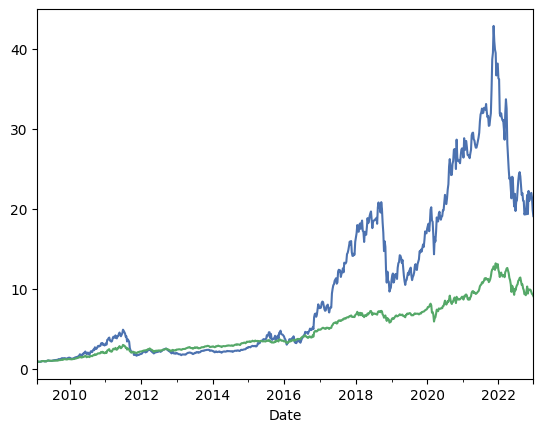

In [96]:
(p_est1_kelly_ret + 1).cumprod().plot()
(p_est1_sharpe_ret + 1).cumprod().plot()

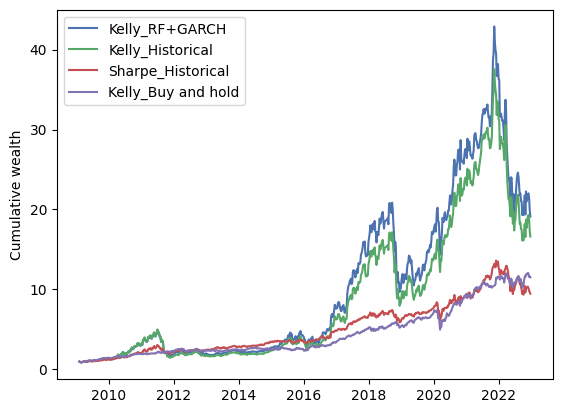

In [101]:
plt.plot((p_est1_kelly_ret + 1).cumprod(), label = "Kelly_RF+GARCH")
plt.plot((p_hist_kelly_ret + 1).cumprod(), label = "Kelly_Historical")
plt.plot((p_hist_sharpe_ret + 1).cumprod(), label = "Sharpe_Historical")
plt.plot((p_bh_kelly_ret + 1).cumprod(), label = "Kelly_Buy and hold")
#plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
#plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.ylabel('Cumulative wealth')
plt.legend()
plt.show()

In [104]:
buy_and_hold_kelly_weights[0][buy_and_hold_kelly_weights[0] > 000.1].dropna()

Weights
AAPL  0.262386
MCD   0.557681
VALE  0.179933

In [ ]:
buy_and_hold_kelly_weights[0][buy_and_hold_kelly_weights[0] > 000.1].dropna()

In [105]:
model_validation.val_size

725

In [107]:
y_train_ret_1 = model_validation.returns_val.iloc[-model_validation.window-model_validation.val_size:-model_validation.val_size]
y_train_ret_2 = model_validation.returns_val.iloc[-model_validation.window-model_validation.val_size:-model_validation.val_size]

In [109]:
y_train_ret_1['AAPL']

Date
2005-08-27     1.049429
2005-09-03    11.012608
2005-09-10    -0.194911
2005-09-17     3.885916
2005-09-24     0.770720
                ...    
2009-01-03    -0.187318
2009-01-10    -9.107983
2009-01-17     7.324198
2009-01-24     2.003207
2009-01-31    10.640152
Name: AAPL, Length: 180, dtype: float64

In [110]:
model = arch_model(
    y_train_ret_1['AAPL'],
    p=1,
    q=1,
    rescale=False
)

model_res = model.fit(disp=0)

Text(0.5, 0, 'Return "Apple"')

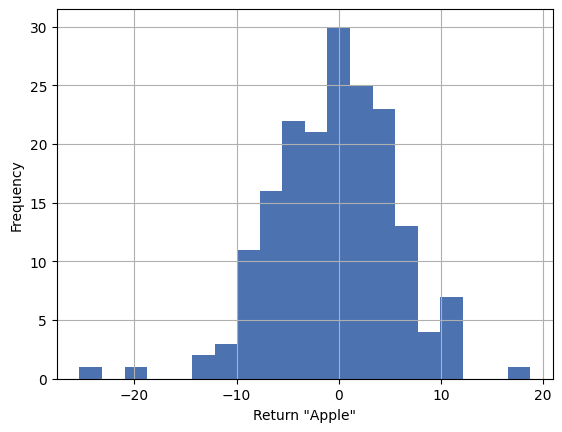

In [121]:
model_res.resid.hist(bins=20)
plt.ylabel('Frequency')
plt.xlabel('Return "Apple"')